# Importing libraries

In [2]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
import pandas_profiling

#handling model statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats.mstats import winsorize

#handling dates
import datetime
import time

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='darkgrid'); sns.set(style="whitegrid", color_codes=True) #plots default seaborn settings
import plotly_express as px

#ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix, auc


# Reading Data

In [3]:
# Importing the dataset (fra i UTF-8 encoding), alternativ with open(path, encoding='utf-16') as 
df = pd.read_csv('data_konkursmodel.csv', delimiter=',')


In [4]:
df.head()

Unnamed: 0  vatnumber            CompanyType  FoundedDate status_vatnumber  \
0           1   10000025  PrivateLimitedCompany   19991013.0           normal   
1           2   10000025  PrivateLimitedCompany   19991013.0           normal   
2           3   10000025  PrivateLimitedCompany   19991013.0           normal   
3           4   10000025  PrivateLimitedCompany   19991013.0           normal   
4           5   10000025  PrivateLimitedCompany   19991013.0           normal   

   AnnouncementDate  IsLatestAnnouncement  HasNegativeEquity    Assets  \
0          20130609                 False              False  138324.0   
1          20140605                 False               True   56399.0   
2          20150617                 False               True  357316.0   
3          20160607                 False               True  389334.0   
4          20170605                 False               True  442435.0   

   Solidity         ...           foundedyear  ageofcompany  log_ageofcompany  \
0     -84.0         ...                1999.0          20.0          2.995732   
1      70.0         ...                1999.0          20.0          2.995732   
2    -223.0         ...                1999.0          20.0          2.995732   
3    -250.0         ...                1999.0          20.0          2.995732   
4    -238.0         ...                1999.0          20.0          2.995732   

   dummy_ageofcompany  dummy_companytype  debt_ratio  \
0                 0.0                  1  -16.189526   
1                 0.0                  1         NaN   
2                 0.0                  1         NaN   
3                 0.0                  1  349.884418   
4                 0.0                  1         NaN   

                          Sector  roi_median  adjusted_roi  \
0  Kultur, fritid, anden service         3.0           6.0   
1  Kultur, fritid, anden service         3.0        -134.0   
2  Kultur, fritid, anden service         3.0         -16.0   
3  Kultur, fritid, anden service         3.0         -48.0   
4  Kultur, fritid, anden service         3.0         -21.0   

  announcementdateyear  
0                 2013  
1                 2014  
2                 2015  
3                 2016  
4                 2017  

[5 rows x 52 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896255 entries, 0 to 896254
Data columns (total 52 columns):
Unnamed: 0                                                 896255 non-null int64
vatnumber                                                  896255 non-null int64
CompanyType                                                896255 non-null object
FoundedDate                                                895961 non-null float64
status_vatnumber                                           896255 non-null object
AnnouncementDate                                           896255 non-null int64
IsLatestAnnouncement                                       896255 non-null bool
HasNegativeEquity                                          896255 non-null bool
Assets                                                     896255 non-null float64
Solidity                                                   894961 non-null float64
CurrentRatio                                               807473 non-nul

In [6]:
#pandas_profiling.ProfileReport(df)

In [7]:
df.sample(5)

Unnamed: 0  vatnumber            CompanyType  FoundedDate  \
568053      568054   32880487  PrivateLimitedCompany   20100419.0   
831832      831833   38048619  PrivateLimitedCompany   20160929.0   
329259      329260   29243425  PrivateLimitedCompany   20051207.0   
862706      862707   68391628   PublicLimitedCompany   19820430.0   
273072      273073   28123655  PrivateLimitedCompany   20041006.0   

                status_vatnumber  AnnouncementDate  IsLatestAnnouncement  \
568053  dissolvedAfterBankruptcy          20130304                 False   
831832                    normal          20171128                  True   
329259                    normal          20180530                  True   
862706                    normal          20160929                 False   
273072                    normal          20160307                 False   

        HasNegativeEquity     Assets  Solidity         ...           \
568053               True   501199.0      15.0         ...            
831832               True   685739.0      -4.0         ...            
329259              False  6777404.0      77.0         ...            
862706              False  9889744.0      54.0         ...            
273072              False   673183.0      98.0         ...            

        foundedyear  ageofcompany  log_ageofcompany  dummy_ageofcompany  \
568053       2010.0           9.0          2.197225                 0.0   
831832       2016.0           3.0          1.098612                 1.0   
329259       2005.0          14.0          2.639057                 0.0   
862706       1982.0          37.0          3.610918                 0.0   
273072       2004.0          15.0          2.708050                 0.0   

        dummy_companytype  debt_ratio                          Sector  \
568053                  1   85.151610         Handel og Transport mv.   
831832                  1  103.671500         Handel og Transport mv.   
329259                  1   23.205060                 Erhvervsservice   
862706                  0   45.754990  Industri, råstoffer, forsyning   
273072                  1    2.169395                 Erhvervsservice   

        roi_median  adjusted_roi announcementdateyear  
568053         4.0           NaN                 2013  
831832         4.0         -15.0                 2017  
329259         6.0           9.0                 2018  
862706         4.0           4.0                 2016  
273072         6.0         -13.0                 2016  

[5 rows x 52 columns]

In [8]:
#Population: Virksomheder Gået konkurs
df['bankrupt'].value_counts()

0    850344
1     45911
Name: bankrupt, dtype: int64

In [9]:
#Virksomheder på status
df['status_vatnumber'].value_counts()

normal                       850344
dissolvedAfterBankruptcy      17071
underBankruptcy               14525
forciblyDissolved              9711
underCompulsoryResolution      4604
Name: status_vatnumber, dtype: int64

In [10]:
#Virksomhedstyper
df['CompanyType'].value_counts()

PrivateLimitedCompany    735261
PublicLimitedCompany     160994
Name: CompanyType, dtype: int64

In [11]:
#Sektor
df['Sector'].value_counts()

Handel og Transport mv.           190137
Uoplyst                           158753
Erhvervsservice                   142107
Ejendomshandel og udlejning       101373
Bygge og Anlæg                     83313
Industri, råstoffer, forsyning     58032
Finansiering og forsikring         56742
Information og kommunikation       55505
Off. adm, undervisn., sundhed      18373
Landbrug, skovbrug og fiskeri      15956
Kultur, fritid, anden service      15951
Name: Sector, dtype: int64

In [12]:
#Announcementdateyear
df['announcementdateyear'].value_counts()

2017    167401
2016    157197
2015    145597
2018    137505
2014    133221
2013    123926
2012     31408
Name: announcementdateyear, dtype: int64

# Data for the model

In [13]:
df_model = df[['bankrupt','Solidity', 'CurrentRatio','adjusted_roi','debt_ratio','dummy_companytype','HasNegativeEquity', 'HasSupplementaryInformationOnOtherMattersExtendedReview', 'log_assets','dummy_ageofcompany']]

In [14]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896255 entries, 0 to 896254
Data columns (total 10 columns):
bankrupt                                                   896255 non-null int64
Solidity                                                   894961 non-null float64
CurrentRatio                                               807473 non-null float64
adjusted_roi                                               787102 non-null float64
debt_ratio                                                 846825 non-null float64
dummy_companytype                                          896255 non-null int64
HasNegativeEquity                                          896255 non-null bool
HasSupplementaryInformationOnOtherMattersExtendedReview    896255 non-null bool
log_assets                                                 896255 non-null float64
dummy_ageofcompany                                         895961 non-null float64
dtypes: bool(2), float64(6), int64(2)
memory usage: 56.4 MB


In [15]:
pandas_profiling.ProfileReport(df_model)

In [16]:
# drop rows with missing values and write to a new dataset
df_model.dropna(inplace=True)
df_model.head()

bankrupt  Solidity  CurrentRatio  adjusted_roi  debt_ratio  \
0         0     -84.0        -618.0           6.0  -16.189526   
3         0    -250.0          29.0         -48.0  349.884418   
6         0      11.0           2.0          -7.0   39.214254   
7         0      13.0           4.0           1.0   36.541259   
8         0       4.0           2.0         -14.0   45.780033   

   dummy_companytype  HasNegativeEquity  \
0                  1              False   
3                  1               True   
6                  1              False   
7                  1              False   
8                  1              False   

   HasSupplementaryInformationOnOtherMattersExtendedReview  log_assets  \
0                                              False         11.837354   
3                                              False         12.872193   
6                                              False         18.593008   
7                                              False         18.591947   
8                                              False         18.576624   

   dummy_ageofcompany  
0                 0.0  
3                 0.0  
6                 0.0  
7                 0.0  
8                 0.0

In [17]:
df_model.info()

print(df_model.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708564 entries, 0 to 896254
Data columns (total 10 columns):
bankrupt                                                   708564 non-null int64
Solidity                                                   708564 non-null float64
CurrentRatio                                               708564 non-null float64
adjusted_roi                                               708564 non-null float64
debt_ratio                                                 708564 non-null float64
dummy_companytype                                          708564 non-null int64
HasNegativeEquity                                          708564 non-null bool
HasSupplementaryInformationOnOtherMattersExtendedReview    708564 non-null bool
log_assets                                                 708564 non-null float64
dummy_ageofcompany                                         708564 non-null float64
dtypes: bool(2), float64(6), int64(2)
memory usage: 50.0 MB
(708564, 

In [18]:
#check of NAs per variable/column
df_model.isna().sum()

bankrupt                                                   0
Solidity                                                   0
CurrentRatio                                               0
adjusted_roi                                               0
debt_ratio                                                 0
dummy_companytype                                          0
HasNegativeEquity                                          0
HasSupplementaryInformationOnOtherMattersExtendedReview    0
log_assets                                                 0
dummy_ageofcompany                                         0
dtype: int64

In [19]:
df_model.dtypes

bankrupt                                                     int64
Solidity                                                   float64
CurrentRatio                                               float64
adjusted_roi                                               float64
debt_ratio                                                 float64
dummy_companytype                                            int64
HasNegativeEquity                                             bool
HasSupplementaryInformationOnOtherMattersExtendedReview       bool
log_assets                                                 float64
dummy_ageofcompany                                         float64
dtype: object

In [20]:
df_model.describe()

bankrupt       Solidity  CurrentRatio   adjusted_roi  \
count  708564.000000  708564.000000  7.085640e+05  708564.000000   
mean        0.049034      14.441695  2.625196e+04      -2.324798   
std         0.215940    1441.544329  4.955179e+06     790.117485   
min         0.000000 -994365.000000 -2.807258e+08 -523234.000000   
25%         0.000000      14.000000  5.900000e+01      -7.000000   
50%         0.000000      43.000000  1.340000e+02       0.000000   
75%         0.000000      80.000000  3.350000e+02      11.000000   
max         1.000000   70600.000000  2.107116e+09  225689.000000   

          debt_ratio  dummy_companytype     log_assets  dummy_ageofcompany  
count  708564.000000      708564.000000  708564.000000       708564.000000  
mean       77.517371           0.811946      14.731561            0.060665  
std      1633.744264           0.390755       1.858121            0.238715  
min    -16201.960000           0.000000      10.819800            0.000000  
25%         8.763495           1.000000      13.417528            0.000000  
50%        35.646405           1.000000      14.674085            0.000000  
75%        69.060725           1.000000      15.914373            0.000000  
max    994465.168163           1.000000      27.904240            1.000000

In [21]:
#Winsorizing financial ratios: trunkerer outliere til 99 pct fraktilen
limit = 0.01 # svarer til 99 pct. fraktilen
winsorized_x = df_model.copy()
winsorized_x['Solidity'] = winsorize(df_model['Solidity'], limits=limit)

winsorized_x_cr = winsorized_x.copy()
winsorized_x_cr['CurrentRatio'] = winsorize(df_model['CurrentRatio'], limits=limit)

winsorized_x_roi = winsorized_x_cr.copy()
winsorized_x_roi['adjusted_roi'] = winsorize(df_model['adjusted_roi'], limits=limit)

winsorized_x_debt_ratio = winsorized_x_roi.copy()
winsorized_x_debt_ratio['debt_ratio'] = winsorize(df_model['debt_ratio'], limits=limit)

winsorized_x_debt_ratio.describe()
#winsorized_x_roi.info()


bankrupt       Solidity   CurrentRatio   adjusted_roi  \
count  708564.000000  708564.000000  708564.000000  708564.000000   
mean        0.049034      32.858515    1378.165000      -1.309628   
std         0.215940      75.757504    5052.175327      35.677591   
min         0.000000    -438.000000     -77.000000    -198.000000   
25%         0.000000      14.000000      59.000000      -7.000000   
50%         0.000000      43.000000     134.000000       0.000000   
75%         0.000000      80.000000     335.000000      11.000000   
max         1.000000     100.000000   38311.000000      85.000000   

          debt_ratio  dummy_companytype     log_assets  dummy_ageofcompany  
count  708564.000000      708564.000000  708564.000000       708564.000000  
mean       50.809623           0.811946      14.731561            0.060665  
std        66.232102           0.390755       1.858121            0.238715  
min        -8.934173           0.000000      10.819800            0.000000  
25%         8.763495           1.000000      13.417528            0.000000  
50%        35.646405           1.000000      14.674085            0.000000  
75%        69.060725           1.000000      15.914373            0.000000  
max       454.853400           1.000000      27.904240            1.000000

In [22]:
df_model_new = winsorized_x_debt_ratio.copy()
df_model_new.head(5)

bankrupt  Solidity  CurrentRatio  adjusted_roi  debt_ratio  \
0         0     -84.0         -77.0           6.0   -8.934173   
3         0    -250.0          29.0         -48.0  349.884418   
6         0      11.0           2.0          -7.0   39.214254   
7         0      13.0           4.0           1.0   36.541259   
8         0       4.0           2.0         -14.0   45.780033   

   dummy_companytype  HasNegativeEquity  \
0                  1              False   
3                  1               True   
6                  1              False   
7                  1              False   
8                  1              False   

   HasSupplementaryInformationOnOtherMattersExtendedReview  log_assets  \
0                                              False         11.837354   
3                                              False         12.872193   
6                                              False         18.593008   
7                                              False         18.591947   
8                                              False         18.576624   

   dummy_ageofcompany  
0                 0.0  
3                 0.0  
6                 0.0  
7                 0.0  
8                 0.0

In [23]:
#handling outliers on wuantiles

#Dropping the outlier rows with Percentiles
#upper_lim_sol = df_model['Solidity'].quantile(.99)
#lower_lim_sol = df_model['Solidity'].quantile(.01)
#df_model_quantiles_removed = df_model[(df_model['Solidity'] < upper_lim_sol) & (df_model['Solidity'] > lower_lim_sol)]

#upper_lim_current = df_model['CurrentRatio'].quantile(.99)
#lower_lim_current = df_model['CurrentRatio'].quantile(.01)
#df_model_quantiles_removed = df_model[(df_model['CurrentRatio'] < upper_lim_current) & (df_model['CurrentRatio'] > lower_lim_current)]


#upper_lim_roi = df_model['adjusted_roi'].quantile(.99)
#lower_lim_roi = df_model['adjusted_roi'].quantile(.01)
#df_model_quantiles_removed = df_model[(df_model['adjusted_roi'] < upper_lim_roi) & (df_model['adjusted_roi'] > lower_lim_roi)]


#upper_lim_dr = df_model['debt_ratio'].quantile(.99)
#lower_lim_dr = df_model['debt_ratio'].quantile(.01)
#df_model_quantiles_removed = df_model[(df_model['debt_ratio'] < upper_lim_dr) & (df_model['debt_ratio'] > lower_lim_dr)]


In [24]:
df_model_new.describe()

bankrupt       Solidity   CurrentRatio   adjusted_roi  \
count  708564.000000  708564.000000  708564.000000  708564.000000   
mean        0.049034      32.858515    1378.165000      -1.309628   
std         0.215940      75.757504    5052.175327      35.677591   
min         0.000000    -438.000000     -77.000000    -198.000000   
25%         0.000000      14.000000      59.000000      -7.000000   
50%         0.000000      43.000000     134.000000       0.000000   
75%         0.000000      80.000000     335.000000      11.000000   
max         1.000000     100.000000   38311.000000      85.000000   

          debt_ratio  dummy_companytype     log_assets  dummy_ageofcompany  
count  708564.000000      708564.000000  708564.000000       708564.000000  
mean       50.809623           0.811946      14.731561            0.060665  
std        66.232102           0.390755       1.858121            0.238715  
min        -8.934173           0.000000      10.819800            0.000000  
25%         8.763495           1.000000      13.417528            0.000000  
50%        35.646405           1.000000      14.674085            0.000000  
75%        69.060725           1.000000      15.914373            0.000000  
max       454.853400           1.000000      27.904240            1.000000

In [25]:
df_model_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708564 entries, 0 to 896254
Data columns (total 10 columns):
bankrupt                                                   708564 non-null int64
Solidity                                                   708564 non-null float64
CurrentRatio                                               708564 non-null float64
adjusted_roi                                               708564 non-null float64
debt_ratio                                                 708564 non-null float64
dummy_companytype                                          708564 non-null int64
HasNegativeEquity                                          708564 non-null bool
HasSupplementaryInformationOnOtherMattersExtendedReview    708564 non-null bool
log_assets                                                 708564 non-null float64
dummy_ageofcompany                                         708564 non-null float64
dtypes: bool(2), float64(6), int64(2)
memory usage: 50.0 MB


In [26]:
df_model_new['bankrupt'].value_counts()

0    673820
1     34744
Name: bankrupt, dtype: int64

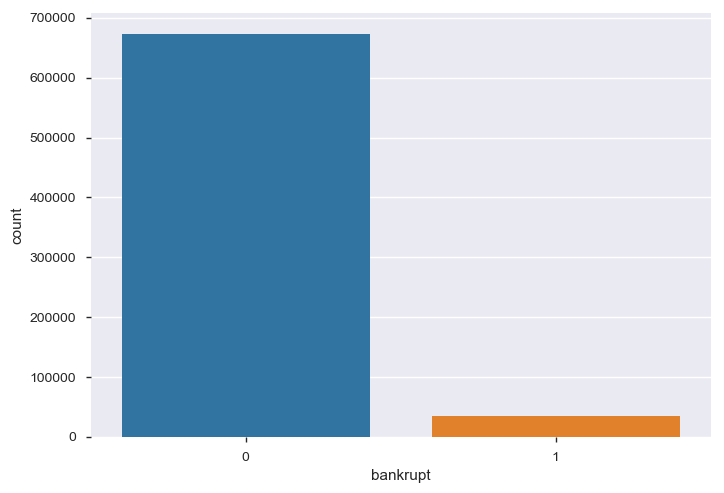

In [27]:
sns.countplot(x='bankrupt', data=df_model_new)
#imbalanced dataset

In [28]:
df_model_new.groupby('bankrupt').mean()

Solidity  CurrentRatio  adjusted_roi  debt_ratio  \
bankrupt                                                      
0         35.625366   1432.538858     -0.157334   48.223172   
1        -20.801376    323.646443    -23.657034  100.970878   

          dummy_companytype  HasNegativeEquity  \
bankrupt                                         
0                  0.808029           0.227142   
1                  0.887923           0.591066   

          HasSupplementaryInformationOnOtherMattersExtendedReview  log_assets  \
bankrupt                                                                        
0                                                  0.005294         14.783689   
1                                                  0.013700         13.720587   

          dummy_ageofcompany  
bankrupt                      
0                   0.061987  
1                   0.035028

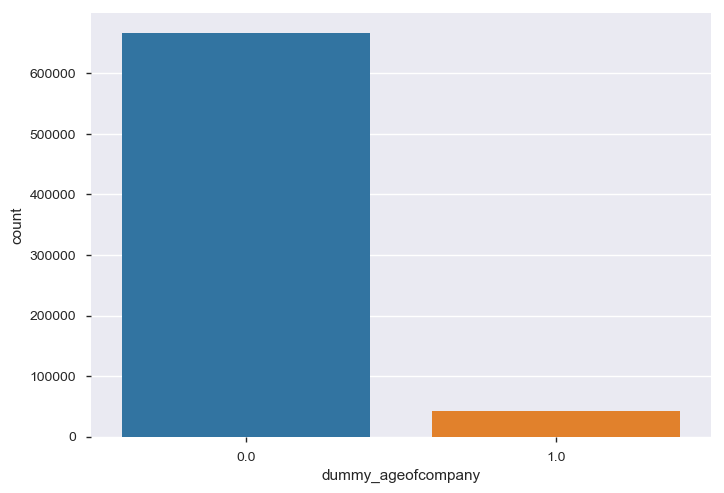

In [29]:
sns.countplot(x='dummy_ageofcompany', data=df_model_new)

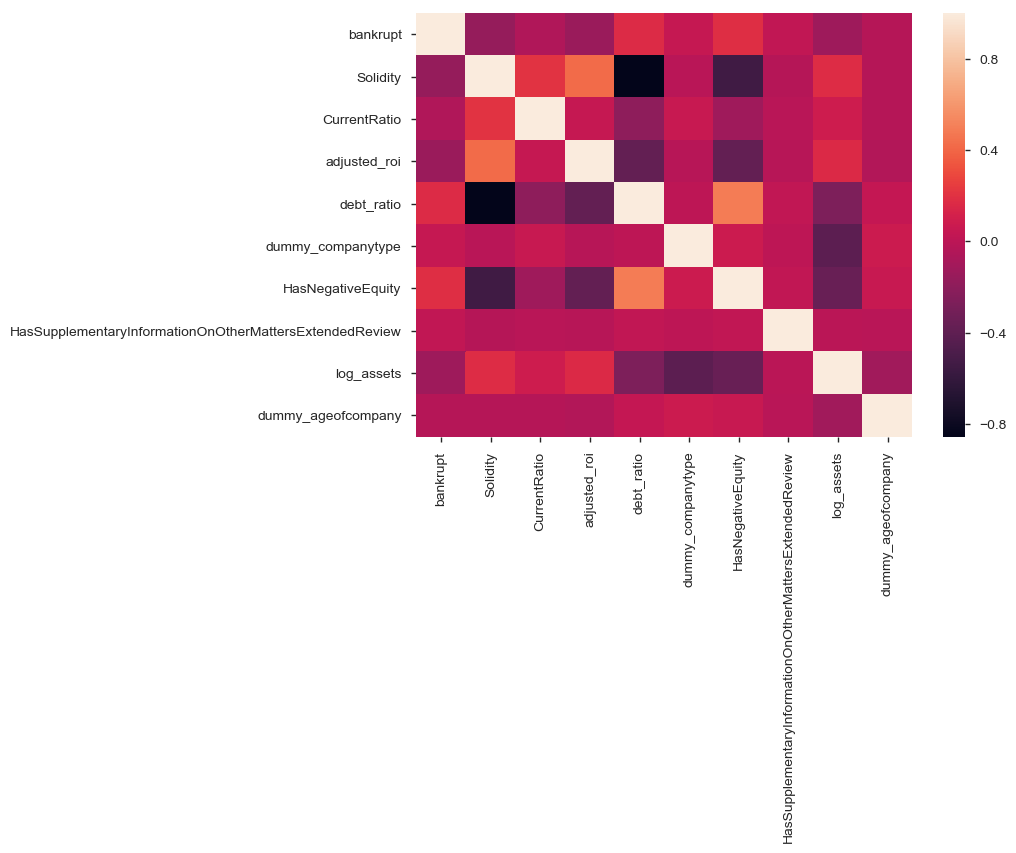

In [30]:
#Checking independence between the independent variables
sns.heatmap(df_model_new.corr())

#-> måske fjerne enten HasnegativeEquity eller Solidity, men ikke 100% nødvendigt 

In [31]:
print(df_model_new.corr())
#fjern Debt_ratio, da høj korrelation (>80) med Solidity

                                                    bankrupt  Solidity  \
bankrupt                                            1.000000 -0.160839   
Solidity                                           -0.160839  1.000000   
CurrentRatio                                       -0.047396  0.208371   
adjusted_roi                                       -0.142233  0.424842   
debt_ratio                                          0.171976 -0.854896   
dummy_companytype                                   0.044151 -0.009336   
HasNegativeEquity                                   0.182724 -0.539347   
HasSupplementaryInformationOnOtherMattersExtend...  0.024101 -0.023745   
log_assets                                         -0.123548  0.176544   
dummy_ageofcompany                                 -0.024387 -0.025621   

                                                    CurrentRatio  \
bankrupt                                               -0.047396   
Solidity                                         

# Modelling

## Fitting model to training data

In [32]:
cols_features=['HasNegativeEquity','Solidity', 'CurrentRatio', 'adjusted_roi', 'dummy_companytype', 'HasSupplementaryInformationOnOtherMattersExtendedReview', 'dummy_ageofcompany', 'log_assets']

x=df_model_new[cols_features] #forklarende variable
y=df_model_new['bankrupt'] #afhængig variabel
x.sample(5)
y.sample(5)

775207    0
273683    0
456791    0
567789    0
470015    0
Name: bankrupt, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [34]:
y.astype(float)
y.head()

0    0
3    0
6    0
7    0
8    0
Name: bankrupt, dtype: int64

In [35]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() #Create a Logistic Regression classifier/model called logreg.

#Fit the model using training data (x_train and y_train).
# finds the coefficients and the intercept value
logreg.fit(x_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
#Printing coefficients in the model
coefficients = logreg.coef_
print(logreg.coef_)
coefficients


[[ 9.26083580e-01 -1.06664831e-03 -1.31128027e-04 -4.05543267e-03
   2.82639999e-02  1.53598507e-01 -7.65331710e-01 -2.19052499e-01]]


array([[ 9.26083580e-01, -1.06664831e-03, -1.31128027e-04,
        -4.05543267e-03,  2.82639999e-02,  1.53598507e-01,
        -7.65331710e-01, -2.19052499e-01]])

In [37]:
#odds-ratios
print(np.exp(logreg.coef_))

[[2.52460239 0.99893392 0.99986888 0.99595278 1.02866722 1.16602264
  0.4651796  0.80327955]]


## Predicting the test set results and calculating the accuracy

In [38]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[134674      0]
 [  7039      0]]


I test settet er der: 134620+14 correct predictions. Og 2423+4 incorrect predictions

Classification report

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97    134674
          1       0.00      0.00      0.00      7039

avg / total       0.90      0.95      0.93    141713



Interpretation: Of the entire test set, 93% of the bankrupt companies are classfied correct

#ROC CURVE

No handles with labels found to put in legend.


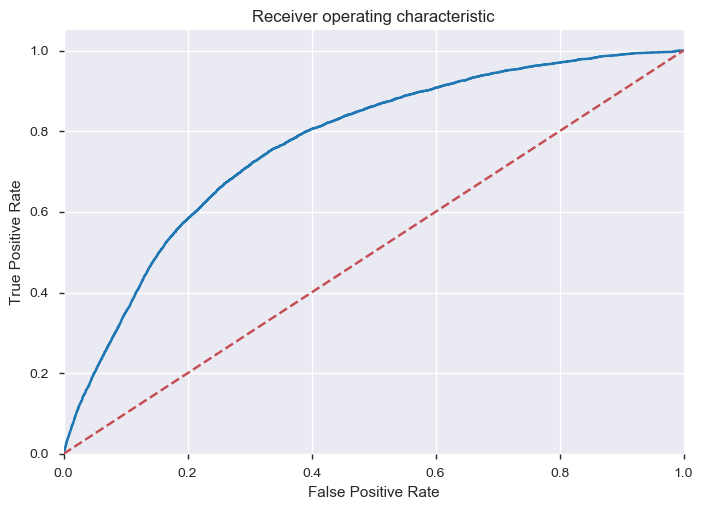

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [42]:
y_pred_proba = logreg.predict_proba(x_test)

In [43]:
y_pred_proba

array([[0.97936498, 0.02063502],
       [0.95003516, 0.04996484],
       [0.98601566, 0.01398434],
       ...,
       [0.9862352 , 0.0137648 ],
       [0.96931038, 0.03068962],
       [0.95463796, 0.04536204]])

In [44]:
y_pred_probabilies_dataframe = pd.DataFrame(y_pred_proba)

In [45]:
y_pred_probabilies_dataframe.head(25)

0         1
0   0.979365  0.020635
1   0.950035  0.049965
2   0.986016  0.013984
3   0.965849  0.034151
4   0.906619  0.093381
5   0.956703  0.043297
6   0.974608  0.025392
7   0.964608  0.035392
8   0.968532  0.031468
9   0.823677  0.176323
10  0.949268  0.050732
11  0.982871  0.017129
12  0.985205  0.014795
13  0.967882  0.032118
14  0.975460  0.024540
15  0.986273  0.013727
16  0.966095  0.033905
17  0.998744  0.001256
18  0.969233  0.030767
19  0.962874  0.037126
20  0.985991  0.014009
21  0.980163  0.019837
22  0.973084  0.026916
23  0.985942  0.014058
24  0.858982  0.141018

In [46]:
y_pred_probabilies_dataframe.describe()

0              1
count  141713.000000  141713.000000
mean        0.950501       0.049499
std         0.051126       0.051126
min         0.541054       0.000027
25%         0.947902       0.021295
50%         0.969071       0.030929
75%         0.978705       0.052098
max         0.999973       0.458946

In [47]:
y_pred_probabilies_dataframe.mean()

0    0.950501
1    0.049499
dtype: float64

In [48]:
# show the inputs and predicted probabilities
for i in range(len(y_pred_proba)):
    print("X=%s, Predicted=%s" % (y_pred[i],y_pred_proba[i]))

X=0, Predicted=[0.97936498 0.02063502]
X=0, Predicted=[0.95003516 0.04996484]
X=0, Predicted=[0.98601566 0.01398434]
X=0, Predicted=[0.9658495 0.0341505]
X=0, Predicted=[0.90661887 0.09338113]
X=0, Predicted=[0.95670332 0.04329668]
X=0, Predicted=[0.974608 0.025392]
X=0, Predicted=[0.96460781 0.03539219]
X=0, Predicted=[0.96853178 0.03146822]
X=0, Predicted=[0.82367677 0.17632323]
X=0, Predicted=[0.94926774 0.05073226]
X=0, Predicted=[0.98287109 0.01712891]
X=0, Predicted=[0.98520467 0.01479533]
X=0, Predicted=[0.96788231 0.03211769]
X=0, Predicted=[0.97546007 0.02453993]
X=0, Predicted=[0.98627311 0.01372689]
X=0, Predicted=[0.96609509 0.03390491]
X=0, Predicted=[0.99874383 0.00125617]
X=0, Predicted=[0.96923273 0.03076727]
X=0, Predicted=[0.9628739 0.0371261]
X=0, Predicted=[0.98599122 0.01400878]
X=0, Predicted=[0.98016316 0.01983684]
X=0, Predicted=[0.97308397 0.02691603]
X=0, Predicted=[0.98594166 0.01405834]
X=0, Predicted=[0.85898237 0.14101763]
X=0, Predicted=[0.87864939 0.1213

X=0, Predicted=[0.89006208 0.10993792]
X=0, Predicted=[0.91200034 0.08799966]
X=0, Predicted=[9.99818399e-01 1.81600779e-04]
X=0, Predicted=[0.86653884 0.13346116]
X=0, Predicted=[0.96190551 0.03809449]
X=0, Predicted=[0.92234991 0.07765009]
X=0, Predicted=[0.98356603 0.01643397]
X=0, Predicted=[0.96456557 0.03543443]
X=0, Predicted=[0.97528795 0.02471205]
X=0, Predicted=[0.96651795 0.03348205]
X=0, Predicted=[0.98984211 0.01015789]
X=0, Predicted=[0.95382336 0.04617664]
X=0, Predicted=[0.98369158 0.01630842]
X=0, Predicted=[0.98468966 0.01531034]
X=0, Predicted=[0.96751001 0.03248999]
X=0, Predicted=[0.97260535 0.02739465]
X=0, Predicted=[0.97410251 0.02589749]
X=0, Predicted=[0.98502675 0.01497325]
X=0, Predicted=[0.9620448 0.0379552]
X=0, Predicted=[0.96724767 0.03275233]
X=0, Predicted=[0.94928021 0.05071979]
X=0, Predicted=[0.97314873 0.02685127]
X=0, Predicted=[0.97660473 0.02339527]
X=0, Predicted=[0.98472324 0.01527676]
X=0, Predicted=[0.98867758 0.01132242]
X=0, Predicted=[0.9

X=0, Predicted=[0.97725645 0.02274355]
X=0, Predicted=[0.96766823 0.03233177]
X=0, Predicted=[0.97213222 0.02786778]
X=0, Predicted=[0.97322556 0.02677444]
X=0, Predicted=[0.96375547 0.03624453]
X=0, Predicted=[0.97164968 0.02835032]
X=0, Predicted=[0.8394127 0.1605873]
X=0, Predicted=[0.97906696 0.02093304]
X=0, Predicted=[0.98065906 0.01934094]
X=0, Predicted=[0.9091213 0.0908787]
X=0, Predicted=[0.98209137 0.01790863]
X=0, Predicted=[0.99364278 0.00635722]
X=0, Predicted=[0.97692469 0.02307531]
X=0, Predicted=[0.89085913 0.10914087]
X=0, Predicted=[0.98324929 0.01675071]
X=0, Predicted=[0.83775726 0.16224274]
X=0, Predicted=[0.98741668 0.01258332]
X=0, Predicted=[0.96559541 0.03440459]
X=0, Predicted=[0.97291057 0.02708943]
X=0, Predicted=[0.97819709 0.02180291]
X=0, Predicted=[0.90134168 0.09865832]
X=0, Predicted=[0.98797865 0.01202135]
X=0, Predicted=[0.8884589 0.1115411]
X=0, Predicted=[0.98533848 0.01466152]
X=0, Predicted=[0.97601019 0.02398981]
X=0, Predicted=[0.92901877 0.07

X=0, Predicted=[0.83839054 0.16160946]
X=0, Predicted=[0.93250068 0.06749932]
X=0, Predicted=[0.97958138 0.02041862]
X=0, Predicted=[0.97556669 0.02443331]
X=0, Predicted=[0.97076241 0.02923759]
X=0, Predicted=[0.978815 0.021185]
X=0, Predicted=[0.91035155 0.08964845]
X=0, Predicted=[0.9699942 0.0300058]
X=0, Predicted=[0.95023667 0.04976333]
X=0, Predicted=[0.96542127 0.03457873]
X=0, Predicted=[0.96816521 0.03183479]
X=0, Predicted=[0.95599666 0.04400334]
X=0, Predicted=[0.97843015 0.02156985]
X=0, Predicted=[0.98869042 0.01130958]
X=0, Predicted=[0.97388406 0.02611594]
X=0, Predicted=[0.91425053 0.08574947]
X=0, Predicted=[0.94730607 0.05269393]
X=0, Predicted=[0.97304225 0.02695775]
X=0, Predicted=[0.98470763 0.01529237]
X=0, Predicted=[0.97501168 0.02498832]
X=0, Predicted=[0.97675768 0.02324232]
X=0, Predicted=[0.96819304 0.03180696]
X=0, Predicted=[0.98211928 0.01788072]
X=0, Predicted=[0.94476392 0.05523608]
X=0, Predicted=[0.95032271 0.04967729]
X=0, Predicted=[0.97461191 0.02

X=0, Predicted=[0.97908669 0.02091331]
X=0, Predicted=[0.96139973 0.03860027]
X=0, Predicted=[0.96279332 0.03720668]
X=0, Predicted=[0.88819637 0.11180363]
X=0, Predicted=[0.94927931 0.05072069]
X=0, Predicted=[0.96891904 0.03108096]
X=0, Predicted=[0.97329017 0.02670983]
X=0, Predicted=[0.96504446 0.03495554]
X=0, Predicted=[0.96652653 0.03347347]
X=0, Predicted=[0.95710065 0.04289935]
X=0, Predicted=[0.84598682 0.15401318]
X=0, Predicted=[0.97156154 0.02843846]
X=0, Predicted=[0.89934158 0.10065842]
X=0, Predicted=[0.77665591 0.22334409]
X=0, Predicted=[0.97490765 0.02509235]
X=0, Predicted=[0.92631038 0.07368962]
X=0, Predicted=[0.97411781 0.02588219]
X=0, Predicted=[0.98988895 0.01011105]
X=0, Predicted=[0.96118735 0.03881265]
X=0, Predicted=[0.88001626 0.11998374]
X=0, Predicted=[0.96829088 0.03170912]
X=0, Predicted=[0.98830082 0.01169918]
X=0, Predicted=[0.95719075 0.04280925]
X=0, Predicted=[0.93757687 0.06242313]
X=0, Predicted=[0.93977349 0.06022651]
X=0, Predicted=[0.9490627

X=0, Predicted=[0.96009954 0.03990046]
X=0, Predicted=[0.98513978 0.01486022]
X=0, Predicted=[0.88089078 0.11910922]
X=0, Predicted=[0.96396616 0.03603384]
X=0, Predicted=[0.93555216 0.06444784]
X=0, Predicted=[0.98051335 0.01948665]
X=0, Predicted=[0.96810191 0.03189809]
X=0, Predicted=[0.97020974 0.02979026]
X=0, Predicted=[0.92268522 0.07731478]
X=0, Predicted=[0.98917804 0.01082196]
X=0, Predicted=[0.92612754 0.07387246]
X=0, Predicted=[0.97418971 0.02581029]
X=0, Predicted=[0.99040981 0.00959019]
X=0, Predicted=[0.97225841 0.02774159]
X=0, Predicted=[0.97012703 0.02987297]
X=0, Predicted=[0.80515487 0.19484513]
X=0, Predicted=[0.98856116 0.01143884]
X=0, Predicted=[0.96274384 0.03725616]
X=0, Predicted=[0.9822956 0.0177044]
X=0, Predicted=[0.95346649 0.04653351]
X=0, Predicted=[0.97016962 0.02983038]
X=0, Predicted=[0.96812337 0.03187663]
X=0, Predicted=[0.89072874 0.10927126]
X=0, Predicted=[0.98041456 0.01958544]
X=0, Predicted=[0.90838489 0.09161511]
X=0, Predicted=[0.97557636 

X=0, Predicted=[0.99554029 0.00445971]
X=0, Predicted=[0.66264685 0.33735315]
X=0, Predicted=[0.96683886 0.03316114]
X=0, Predicted=[0.96498099 0.03501901]
X=0, Predicted=[0.98388593 0.01611407]
X=0, Predicted=[0.98056138 0.01943862]
X=0, Predicted=[0.97982398 0.02017602]
X=0, Predicted=[0.96500015 0.03499985]
X=0, Predicted=[0.97683984 0.02316016]
X=0, Predicted=[0.89127709 0.10872291]
X=0, Predicted=[0.9661727 0.0338273]
X=0, Predicted=[0.9837386 0.0162614]
X=0, Predicted=[0.96775938 0.03224062]
X=0, Predicted=[0.99181651 0.00818349]
X=0, Predicted=[0.97199058 0.02800942]
X=0, Predicted=[0.98438641 0.01561359]
X=0, Predicted=[0.95472498 0.04527502]
X=0, Predicted=[0.9725215 0.0274785]
X=0, Predicted=[0.8789702 0.1210298]
X=0, Predicted=[0.86418002 0.13581998]
X=0, Predicted=[0.96724071 0.03275929]
X=0, Predicted=[0.97991074 0.02008926]
X=0, Predicted=[0.96565904 0.03434096]
X=0, Predicted=[0.97352398 0.02647602]
X=0, Predicted=[0.9796686 0.0203314]
X=0, Predicted=[0.98236892 0.017631

X=0, Predicted=[0.96367263 0.03632737]
X=0, Predicted=[0.9814589 0.0185411]
X=0, Predicted=[0.98880557 0.01119443]
X=0, Predicted=[0.95297473 0.04702527]
X=0, Predicted=[0.9842631 0.0157369]
X=0, Predicted=[0.97058028 0.02941972]
X=0, Predicted=[0.97493655 0.02506345]
X=0, Predicted=[0.98078353 0.01921647]
X=0, Predicted=[0.94999252 0.05000748]
X=0, Predicted=[0.98094165 0.01905835]
X=0, Predicted=[0.96431394 0.03568606]
X=0, Predicted=[0.94332955 0.05667045]
X=0, Predicted=[0.98705566 0.01294434]
X=0, Predicted=[0.9811189 0.0188811]
X=0, Predicted=[0.96898842 0.03101158]
X=0, Predicted=[0.97274942 0.02725058]
X=0, Predicted=[0.95694294 0.04305706]
X=0, Predicted=[0.9680898 0.0319102]
X=0, Predicted=[0.91795335 0.08204665]
X=0, Predicted=[0.91034743 0.08965257]
X=0, Predicted=[0.968625 0.031375]
X=0, Predicted=[0.97993877 0.02006123]
X=0, Predicted=[0.97790587 0.02209413]
X=0, Predicted=[0.98554629 0.01445371]
X=0, Predicted=[0.97070002 0.02929998]
X=0, Predicted=[0.97809109 0.02190891

X=0, Predicted=[0.9650196 0.0349804]
X=0, Predicted=[0.96274444 0.03725556]
X=0, Predicted=[0.89738279 0.10261721]
X=0, Predicted=[0.97346487 0.02653513]
X=0, Predicted=[0.9754305 0.0245695]
X=0, Predicted=[0.96025331 0.03974669]
X=0, Predicted=[0.98101287 0.01898713]
X=0, Predicted=[0.98648353 0.01351647]
X=0, Predicted=[0.97891924 0.02108076]
X=0, Predicted=[0.98259978 0.01740022]
X=0, Predicted=[0.97243273 0.02756727]
X=0, Predicted=[0.95784204 0.04215796]
X=0, Predicted=[0.96409755 0.03590245]
X=0, Predicted=[0.96934368 0.03065632]
X=0, Predicted=[0.97982313 0.02017687]
X=0, Predicted=[0.91142994 0.08857006]
X=0, Predicted=[0.97527121 0.02472879]
X=0, Predicted=[0.98193575 0.01806425]
X=0, Predicted=[0.97976916 0.02023084]
X=0, Predicted=[0.99013889 0.00986111]
X=0, Predicted=[0.95996871 0.04003129]
X=0, Predicted=[0.95881963 0.04118037]
X=0, Predicted=[0.95603115 0.04396885]
X=0, Predicted=[0.97686265 0.02313735]
X=0, Predicted=[0.91909535 0.08090465]
X=0, Predicted=[0.9843035 0.0

X=0, Predicted=[0.97061186 0.02938814]
X=0, Predicted=[0.92385164 0.07614836]
X=0, Predicted=[0.98518549 0.01481451]
X=0, Predicted=[0.97238002 0.02761998]
X=0, Predicted=[0.98516172 0.01483828]
X=0, Predicted=[0.9681614 0.0318386]
X=0, Predicted=[0.97756077 0.02243923]
X=0, Predicted=[0.97903517 0.02096483]
X=0, Predicted=[9.99923396e-01 7.66037347e-05]
X=0, Predicted=[0.99180133 0.00819867]
X=0, Predicted=[0.98714985 0.01285015]
X=0, Predicted=[0.97181761 0.02818239]
X=0, Predicted=[0.84820103 0.15179897]
X=0, Predicted=[0.88199202 0.11800798]
X=0, Predicted=[0.99310317 0.00689683]
X=0, Predicted=[0.97573988 0.02426012]
X=0, Predicted=[0.98850806 0.01149194]
X=0, Predicted=[0.88755305 0.11244695]
X=0, Predicted=[0.97046552 0.02953448]
X=0, Predicted=[0.97923185 0.02076815]
X=0, Predicted=[0.97989022 0.02010978]
X=0, Predicted=[0.90845649 0.09154351]
X=0, Predicted=[0.97521483 0.02478517]
X=0, Predicted=[0.9719967 0.0280033]
X=0, Predicted=[0.97857504 0.02142496]
X=0, Predicted=[0.967

X=0, Predicted=[0.97733404 0.02266596]
X=0, Predicted=[0.98012598 0.01987402]
X=0, Predicted=[0.98015007 0.01984993]
X=0, Predicted=[0.96522566 0.03477434]
X=0, Predicted=[0.96771756 0.03228244]
X=0, Predicted=[0.92654719 0.07345281]
X=0, Predicted=[0.96199809 0.03800191]
X=0, Predicted=[0.89571957 0.10428043]
X=0, Predicted=[0.97888187 0.02111813]
X=0, Predicted=[0.98259873 0.01740127]
X=0, Predicted=[0.91501192 0.08498808]
X=0, Predicted=[0.98612233 0.01387767]
X=0, Predicted=[0.98380574 0.01619426]
X=0, Predicted=[0.9684541 0.0315459]
X=0, Predicted=[0.94586478 0.05413522]
X=0, Predicted=[0.99392636 0.00607364]
X=0, Predicted=[0.97023648 0.02976352]
X=0, Predicted=[0.95649261 0.04350739]
X=0, Predicted=[0.96014943 0.03985057]
X=0, Predicted=[0.96368254 0.03631746]
X=0, Predicted=[0.97461087 0.02538913]
X=0, Predicted=[0.99520028 0.00479972]
X=0, Predicted=[0.98865638 0.01134362]
X=0, Predicted=[0.97811673 0.02188327]
X=0, Predicted=[0.98179403 0.01820597]
X=0, Predicted=[0.97870202 

X=0, Predicted=[0.96699178 0.03300822]
X=0, Predicted=[0.97187221 0.02812779]
X=0, Predicted=[0.95214601 0.04785399]
X=0, Predicted=[0.97268875 0.02731125]
X=0, Predicted=[0.97177372 0.02822628]
X=0, Predicted=[0.96942906 0.03057094]
X=0, Predicted=[0.96722495 0.03277505]
X=0, Predicted=[0.97822029 0.02177971]
X=0, Predicted=[0.96536534 0.03463466]
X=0, Predicted=[0.97041269 0.02958731]
X=0, Predicted=[0.99524874 0.00475126]
X=0, Predicted=[0.94274469 0.05725531]
X=0, Predicted=[0.97708922 0.02291078]
X=0, Predicted=[0.96402824 0.03597176]
X=0, Predicted=[0.96491002 0.03508998]
X=0, Predicted=[0.95963846 0.04036154]
X=0, Predicted=[0.95782282 0.04217718]
X=0, Predicted=[0.97102994 0.02897006]
X=0, Predicted=[0.94152691 0.05847309]
X=0, Predicted=[0.95984064 0.04015936]
X=0, Predicted=[0.97890747 0.02109253]
X=0, Predicted=[0.97947348 0.02052652]
X=0, Predicted=[0.96229592 0.03770408]
X=0, Predicted=[9.99690928e-01 3.09072349e-04]
X=0, Predicted=[0.98140216 0.01859784]
X=0, Predicted=[0

X=0, Predicted=[0.98468887 0.01531113]
X=0, Predicted=[0.90049397 0.09950603]
X=0, Predicted=[0.99145132 0.00854868]
X=0, Predicted=[0.97040279 0.02959721]
X=0, Predicted=[0.92780685 0.07219315]
X=0, Predicted=[0.98787311 0.01212689]
X=0, Predicted=[0.98710903 0.01289097]
X=0, Predicted=[0.96993735 0.03006265]
X=0, Predicted=[0.95588348 0.04411652]
X=0, Predicted=[0.97180446 0.02819554]
X=0, Predicted=[0.97903421 0.02096579]
X=0, Predicted=[0.97907814 0.02092186]
X=0, Predicted=[0.98312845 0.01687155]
X=0, Predicted=[0.98691543 0.01308457]
X=0, Predicted=[0.9551101 0.0448899]
X=0, Predicted=[0.96043252 0.03956748]
X=0, Predicted=[0.98429726 0.01570274]
X=0, Predicted=[0.97036361 0.02963639]
X=0, Predicted=[0.96525185 0.03474815]
X=0, Predicted=[0.96287349 0.03712651]
X=0, Predicted=[0.97196619 0.02803381]
X=0, Predicted=[0.97793696 0.02206304]
X=0, Predicted=[0.97742085 0.02257915]
X=0, Predicted=[0.97332241 0.02667759]
X=0, Predicted=[0.97451839 0.02548161]
X=0, Predicted=[0.97606773 

X=0, Predicted=[0.987931 0.012069]
X=0, Predicted=[0.98263835 0.01736165]
X=0, Predicted=[0.88966522 0.11033478]
X=0, Predicted=[0.90969796 0.09030204]
X=0, Predicted=[0.84805658 0.15194342]
X=0, Predicted=[0.9799652 0.0200348]
X=0, Predicted=[0.88125355 0.11874645]
X=0, Predicted=[0.94974411 0.05025589]
X=0, Predicted=[0.96502421 0.03497579]
X=0, Predicted=[0.91603812 0.08396188]
X=0, Predicted=[0.97348226 0.02651774]
X=0, Predicted=[0.97103147 0.02896853]
X=0, Predicted=[0.85083796 0.14916204]
X=0, Predicted=[0.95453406 0.04546594]
X=0, Predicted=[0.97538273 0.02461727]
X=0, Predicted=[0.99862608 0.00137392]
X=0, Predicted=[0.97433256 0.02566744]
X=0, Predicted=[0.87377051 0.12622949]
X=0, Predicted=[0.96702378 0.03297622]
X=0, Predicted=[0.89158244 0.10841756]
X=0, Predicted=[0.98780019 0.01219981]
X=0, Predicted=[0.97290075 0.02709925]
X=0, Predicted=[0.97032168 0.02967832]
X=0, Predicted=[0.96158573 0.03841427]
X=0, Predicted=[0.99738022 0.00261978]
X=0, Predicted=[0.94843489 0.05

X=0, Predicted=[0.97061885 0.02938115]
X=0, Predicted=[0.98394159 0.01605841]
X=0, Predicted=[0.84593933 0.15406067]
X=0, Predicted=[0.83725683 0.16274317]
X=0, Predicted=[0.97972029 0.02027971]
X=0, Predicted=[0.97602301 0.02397699]
X=0, Predicted=[0.96942941 0.03057059]
X=0, Predicted=[0.73697352 0.26302648]
X=0, Predicted=[0.9819565 0.0180435]
X=0, Predicted=[0.98459582 0.01540418]
X=0, Predicted=[0.98680715 0.01319285]
X=0, Predicted=[0.9732993 0.0267007]
X=0, Predicted=[0.9768642 0.0231358]
X=0, Predicted=[0.97992936 0.02007064]
X=0, Predicted=[0.97089404 0.02910596]
X=0, Predicted=[0.87255449 0.12744551]
X=0, Predicted=[0.96599353 0.03400647]
X=0, Predicted=[0.88471284 0.11528716]
X=0, Predicted=[0.90097584 0.09902416]
X=0, Predicted=[0.96535053 0.03464947]
X=0, Predicted=[0.91932653 0.08067347]
X=0, Predicted=[0.97956483 0.02043517]
X=0, Predicted=[0.92730698 0.07269302]
X=0, Predicted=[0.99744295 0.00255705]
X=0, Predicted=[0.87194172 0.12805828]
X=0, Predicted=[0.98010658 0.01

X=0, Predicted=[0.96885702 0.03114298]
X=0, Predicted=[0.96032713 0.03967287]
X=0, Predicted=[0.91999748 0.08000252]
X=0, Predicted=[0.98081753 0.01918247]
X=0, Predicted=[0.97189517 0.02810483]
X=0, Predicted=[0.96159234 0.03840766]
X=0, Predicted=[0.98020686 0.01979314]
X=0, Predicted=[0.94955 0.05045]
X=0, Predicted=[0.94505744 0.05494256]
X=0, Predicted=[0.88313949 0.11686051]
X=0, Predicted=[0.97601712 0.02398288]
X=0, Predicted=[0.89567686 0.10432314]
X=0, Predicted=[0.9780434 0.0219566]
X=0, Predicted=[0.97800658 0.02199342]
X=0, Predicted=[0.97142578 0.02857422]
X=0, Predicted=[0.96770966 0.03229034]
X=0, Predicted=[0.97559315 0.02440685]
X=0, Predicted=[0.85138274 0.14861726]
X=0, Predicted=[0.94579686 0.05420314]
X=0, Predicted=[0.97635261 0.02364739]
X=0, Predicted=[0.9927437 0.0072563]
X=0, Predicted=[0.9389803 0.0610197]
X=0, Predicted=[0.97394693 0.02605307]
X=0, Predicted=[0.98229648 0.01770352]
X=0, Predicted=[0.98784627 0.01215373]
X=0, Predicted=[0.96174752 0.03825248

X=0, Predicted=[0.93747172 0.06252828]
X=0, Predicted=[0.97703835 0.02296165]
X=0, Predicted=[0.98931034 0.01068966]
X=0, Predicted=[0.96447743 0.03552257]
X=0, Predicted=[0.97639758 0.02360242]
X=0, Predicted=[0.82906709 0.17093291]
X=0, Predicted=[0.96230766 0.03769234]
X=0, Predicted=[0.96182094 0.03817906]
X=0, Predicted=[0.96949888 0.03050112]
X=0, Predicted=[9.99904862e-01 9.51379367e-05]
X=0, Predicted=[0.84147716 0.15852284]
X=0, Predicted=[0.98634446 0.01365554]
X=0, Predicted=[0.96727802 0.03272198]
X=0, Predicted=[0.94318508 0.05681492]
X=0, Predicted=[0.83173505 0.16826495]
X=0, Predicted=[0.98276773 0.01723227]
X=0, Predicted=[0.89712531 0.10287469]
X=0, Predicted=[0.99768139 0.00231861]
X=0, Predicted=[0.97091648 0.02908352]
X=0, Predicted=[0.97368246 0.02631754]
X=0, Predicted=[0.97091161 0.02908839]
X=0, Predicted=[0.97909517 0.02090483]
X=0, Predicted=[0.96678365 0.03321635]
X=0, Predicted=[0.99718622 0.00281378]
X=0, Predicted=[0.97889572 0.02110428]
X=0, Predicted=[0

X=0, Predicted=[0.98324058 0.01675942]
X=0, Predicted=[0.94252753 0.05747247]
X=0, Predicted=[0.95951456 0.04048544]
X=0, Predicted=[0.88995722 0.11004278]
X=0, Predicted=[0.98357461 0.01642539]
X=0, Predicted=[0.96124889 0.03875111]
X=0, Predicted=[0.95782319 0.04217681]
X=0, Predicted=[0.9736239 0.0263761]
X=0, Predicted=[0.98951408 0.01048592]
X=0, Predicted=[0.97644675 0.02355325]
X=0, Predicted=[0.97987239 0.02012761]
X=0, Predicted=[0.9148041 0.0851959]
X=0, Predicted=[0.980423 0.019577]
X=0, Predicted=[0.86355513 0.13644487]
X=0, Predicted=[0.98308502 0.01691498]
X=0, Predicted=[0.97908829 0.02091171]
X=0, Predicted=[0.91130357 0.08869643]
X=0, Predicted=[0.85183687 0.14816313]
X=0, Predicted=[0.89763594 0.10236406]
X=0, Predicted=[0.8654597 0.1345403]
X=0, Predicted=[0.98197027 0.01802973]
X=0, Predicted=[0.95769229 0.04230771]
X=0, Predicted=[0.99787417 0.00212583]
X=0, Predicted=[0.98122307 0.01877693]
X=0, Predicted=[0.96757887 0.03242113]
X=0, Predicted=[0.91545668 0.084543

X=0, Predicted=[0.98309545 0.01690455]
X=0, Predicted=[0.97231115 0.02768885]
X=0, Predicted=[0.68366666 0.31633334]
X=0, Predicted=[0.95354776 0.04645224]
X=0, Predicted=[0.96363529 0.03636471]
X=0, Predicted=[0.96254018 0.03745982]
X=0, Predicted=[0.96519929 0.03480071]
X=0, Predicted=[0.90370703 0.09629297]
X=0, Predicted=[0.96902981 0.03097019]
X=0, Predicted=[0.99126858 0.00873142]
X=0, Predicted=[0.97798203 0.02201797]
X=0, Predicted=[0.88468816 0.11531184]
X=0, Predicted=[0.99571656 0.00428344]
X=0, Predicted=[0.99772643 0.00227357]
X=0, Predicted=[0.98221363 0.01778637]
X=0, Predicted=[0.95127688 0.04872312]
X=0, Predicted=[0.97787393 0.02212607]
X=0, Predicted=[0.98999263 0.01000737]
X=0, Predicted=[0.96543989 0.03456011]
X=0, Predicted=[0.97817178 0.02182822]
X=0, Predicted=[0.96386891 0.03613109]
X=0, Predicted=[0.93601501 0.06398499]
X=0, Predicted=[0.9885889 0.0114111]
X=0, Predicted=[0.88029072 0.11970928]
X=0, Predicted=[0.95921354 0.04078646]
X=0, Predicted=[0.96376791 

X=0, Predicted=[0.97438623 0.02561377]
X=0, Predicted=[0.97097287 0.02902713]
X=0, Predicted=[0.95269224 0.04730776]
X=0, Predicted=[0.98183289 0.01816711]
X=0, Predicted=[0.95439613 0.04560387]
X=0, Predicted=[0.98621548 0.01378452]
X=0, Predicted=[0.71602625 0.28397375]
X=0, Predicted=[0.97757912 0.02242088]
X=0, Predicted=[0.96222027 0.03777973]
X=0, Predicted=[0.99326636 0.00673364]
X=0, Predicted=[0.92807339 0.07192661]
X=0, Predicted=[0.91099601 0.08900399]
X=0, Predicted=[0.9767877 0.0232123]
X=0, Predicted=[0.83710352 0.16289648]
X=0, Predicted=[0.98548212 0.01451788]
X=0, Predicted=[0.97528316 0.02471684]
X=0, Predicted=[0.96164813 0.03835187]
X=0, Predicted=[0.96808162 0.03191838]
X=0, Predicted=[0.97110797 0.02889203]
X=0, Predicted=[0.88543065 0.11456935]
X=0, Predicted=[0.91898694 0.08101306]
X=0, Predicted=[0.96565797 0.03434203]
X=0, Predicted=[0.98007073 0.01992927]
X=0, Predicted=[0.98425819 0.01574181]
X=0, Predicted=[0.98618064 0.01381936]
X=0, Predicted=[0.88463954 

X=0, Predicted=[0.9128161 0.0871839]
X=0, Predicted=[0.98248653 0.01751347]
X=0, Predicted=[0.98328337 0.01671663]
X=0, Predicted=[9.99534235e-01 4.65764957e-04]
X=0, Predicted=[0.96646118 0.03353882]
X=0, Predicted=[0.99263085 0.00736915]
X=0, Predicted=[0.97602873 0.02397127]
X=0, Predicted=[0.97154907 0.02845093]
X=0, Predicted=[0.9771064 0.0228936]
X=0, Predicted=[0.89017748 0.10982252]
X=0, Predicted=[0.98216899 0.01783101]
X=0, Predicted=[0.96912638 0.03087362]
X=0, Predicted=[0.97507241 0.02492759]
X=0, Predicted=[0.84206059 0.15793941]
X=0, Predicted=[0.9907416 0.0092584]
X=0, Predicted=[0.99467869 0.00532131]
X=0, Predicted=[0.97538729 0.02461271]
X=0, Predicted=[0.89809206 0.10190794]
X=0, Predicted=[0.86175582 0.13824418]
X=0, Predicted=[0.95757235 0.04242765]
X=0, Predicted=[0.96152439 0.03847561]
X=0, Predicted=[0.88623935 0.11376065]
X=0, Predicted=[0.96647284 0.03352716]
X=0, Predicted=[0.96182626 0.03817374]
X=0, Predicted=[0.98062758 0.01937242]
X=0, Predicted=[0.97239

X=0, Predicted=[0.9883322 0.0116678]
X=0, Predicted=[0.97391856 0.02608144]
X=0, Predicted=[0.98069284 0.01930716]
X=0, Predicted=[0.95253795 0.04746205]
X=0, Predicted=[0.98443277 0.01556723]
X=0, Predicted=[0.96905843 0.03094157]
X=0, Predicted=[0.99142767 0.00857233]
X=0, Predicted=[0.9155903 0.0844097]
X=0, Predicted=[0.96948956 0.03051044]
X=0, Predicted=[0.97451171 0.02548829]
X=0, Predicted=[0.95969771 0.04030229]
X=0, Predicted=[0.96875932 0.03124068]
X=0, Predicted=[0.96827846 0.03172154]
X=0, Predicted=[0.63558555 0.36441445]
X=0, Predicted=[0.96303289 0.03696711]
X=0, Predicted=[0.97597953 0.02402047]
X=0, Predicted=[0.91446383 0.08553617]
X=0, Predicted=[0.97184135 0.02815865]
X=0, Predicted=[0.98883917 0.01116083]
X=0, Predicted=[0.980472 0.019528]
X=0, Predicted=[0.97146781 0.02853219]
X=0, Predicted=[0.97467147 0.02532853]
X=0, Predicted=[0.98191585 0.01808415]
X=0, Predicted=[0.97206849 0.02793151]
X=0, Predicted=[0.87142077 0.12857923]
X=0, Predicted=[0.96776624 0.0322

X=0, Predicted=[0.99560367 0.00439633]
X=0, Predicted=[0.98950038 0.01049962]
X=0, Predicted=[0.9539307 0.0460693]
X=0, Predicted=[0.95961829 0.04038171]
X=0, Predicted=[0.97506712 0.02493288]
X=0, Predicted=[0.91417326 0.08582674]
X=0, Predicted=[0.98126219 0.01873781]
X=0, Predicted=[0.98792552 0.01207448]
X=0, Predicted=[0.96161226 0.03838774]
X=0, Predicted=[0.97847703 0.02152297]
X=0, Predicted=[0.96966936 0.03033064]
X=0, Predicted=[0.96308567 0.03691433]
X=0, Predicted=[0.97235906 0.02764094]
X=0, Predicted=[0.98383655 0.01616345]
X=0, Predicted=[0.89527913 0.10472087]
X=0, Predicted=[0.97232197 0.02767803]
X=0, Predicted=[0.96660443 0.03339557]
X=0, Predicted=[0.9813187 0.0186813]
X=0, Predicted=[0.97637389 0.02362611]
X=0, Predicted=[0.90758803 0.09241197]
X=0, Predicted=[0.96320241 0.03679759]
X=0, Predicted=[0.90994832 0.09005168]
X=0, Predicted=[0.9835204 0.0164796]
X=0, Predicted=[0.97220637 0.02779363]
X=0, Predicted=[0.96267363 0.03732637]
X=0, Predicted=[0.96900654 0.03

X=0, Predicted=[0.97571556 0.02428444]
X=0, Predicted=[0.84230153 0.15769847]
X=0, Predicted=[0.99664955 0.00335045]
X=0, Predicted=[0.94071384 0.05928616]
X=0, Predicted=[0.98956087 0.01043913]
X=0, Predicted=[0.95898681 0.04101319]
X=0, Predicted=[0.98614209 0.01385791]
X=0, Predicted=[0.97531497 0.02468503]
X=0, Predicted=[0.98390847 0.01609153]
X=0, Predicted=[0.97256147 0.02743853]
X=0, Predicted=[0.86445069 0.13554931]
X=0, Predicted=[0.94662505 0.05337495]
X=0, Predicted=[0.96983979 0.03016021]
X=0, Predicted=[0.9689956 0.0310044]
X=0, Predicted=[0.96980872 0.03019128]
X=0, Predicted=[0.97400472 0.02599528]
X=0, Predicted=[0.97169958 0.02830042]
X=0, Predicted=[0.96773154 0.03226846]
X=0, Predicted=[0.98130952 0.01869048]
X=0, Predicted=[0.97101355 0.02898645]
X=0, Predicted=[0.97001637 0.02998363]
X=0, Predicted=[0.87001237 0.12998763]
X=0, Predicted=[0.93247702 0.06752298]
X=0, Predicted=[0.98840166 0.01159834]
X=0, Predicted=[0.98214784 0.01785216]
X=0, Predicted=[0.97073958 

X=0, Predicted=[0.97525637 0.02474363]
X=0, Predicted=[0.97422548 0.02577452]
X=0, Predicted=[0.96970199 0.03029801]
X=0, Predicted=[0.97343038 0.02656962]
X=0, Predicted=[0.89124633 0.10875367]
X=0, Predicted=[0.97001169 0.02998831]
X=0, Predicted=[0.97472147 0.02527853]
X=0, Predicted=[0.98094292 0.01905708]
X=0, Predicted=[0.97299993 0.02700007]
X=0, Predicted=[0.97757195 0.02242805]
X=0, Predicted=[0.97283272 0.02716728]
X=0, Predicted=[0.77417977 0.22582023]
X=0, Predicted=[0.83780679 0.16219321]
X=0, Predicted=[0.95629806 0.04370194]
X=0, Predicted=[0.92838712 0.07161288]
X=0, Predicted=[0.93570641 0.06429359]
X=0, Predicted=[0.89759313 0.10240687]
X=0, Predicted=[0.9811342 0.0188658]
X=0, Predicted=[0.89495879 0.10504121]
X=0, Predicted=[0.97708498 0.02291502]
X=0, Predicted=[0.97908761 0.02091239]
X=0, Predicted=[0.97822048 0.02177952]
X=0, Predicted=[0.98464309 0.01535691]
X=0, Predicted=[0.95995498 0.04004502]
X=0, Predicted=[0.99246849 0.00753151]
X=0, Predicted=[0.96940666 

X=0, Predicted=[0.97682864 0.02317136]
X=0, Predicted=[0.96241561 0.03758439]
X=0, Predicted=[0.95050189 0.04949811]
X=0, Predicted=[0.94380705 0.05619295]
X=0, Predicted=[0.95370925 0.04629075]
X=0, Predicted=[0.95216454 0.04783546]
X=0, Predicted=[0.9488022 0.0511978]
X=0, Predicted=[0.96929006 0.03070994]
X=0, Predicted=[0.9526564 0.0473436]
X=0, Predicted=[0.98750057 0.01249943]
X=0, Predicted=[0.96056279 0.03943721]
X=0, Predicted=[0.97388244 0.02611756]
X=0, Predicted=[0.97162526 0.02837474]
X=0, Predicted=[0.96854182 0.03145818]
X=0, Predicted=[0.98418679 0.01581321]
X=0, Predicted=[0.9762999 0.0237001]
X=0, Predicted=[0.98571585 0.01428415]
X=0, Predicted=[0.98490646 0.01509354]
X=0, Predicted=[9.99655830e-01 3.44170077e-04]
X=0, Predicted=[0.98413339 0.01586661]
X=0, Predicted=[0.8421502 0.1578498]
X=0, Predicted=[0.97365688 0.02634312]
X=0, Predicted=[0.9704087 0.0295913]
X=0, Predicted=[0.97203222 0.02796778]
X=0, Predicted=[0.98762999 0.01237001]
X=0, Predicted=[0.98402293 

X=0, Predicted=[0.97517007 0.02482993]
X=0, Predicted=[0.80636886 0.19363114]
X=0, Predicted=[0.97693357 0.02306643]
X=0, Predicted=[0.97741497 0.02258503]
X=0, Predicted=[0.96082472 0.03917528]
X=0, Predicted=[0.98695808 0.01304192]
X=0, Predicted=[0.99453804 0.00546196]
X=0, Predicted=[0.75500334 0.24499666]
X=0, Predicted=[0.91258939 0.08741061]
X=0, Predicted=[0.97041531 0.02958469]
X=0, Predicted=[0.78017604 0.21982396]
X=0, Predicted=[0.98084376 0.01915624]
X=0, Predicted=[0.95505305 0.04494695]
X=0, Predicted=[0.98644884 0.01355116]
X=0, Predicted=[0.77911537 0.22088463]
X=0, Predicted=[0.91348269 0.08651731]
X=0, Predicted=[0.90234315 0.09765685]
X=0, Predicted=[0.96832122 0.03167878]
X=0, Predicted=[0.78391487 0.21608513]
X=0, Predicted=[0.98087549 0.01912451]
X=0, Predicted=[0.99668696 0.00331304]
X=0, Predicted=[0.96702763 0.03297237]
X=0, Predicted=[0.72228689 0.27771311]
X=0, Predicted=[0.93695766 0.06304234]
X=0, Predicted=[0.99087176 0.00912824]
X=0, Predicted=[0.9615236

X=0, Predicted=[0.96187693 0.03812307]
X=0, Predicted=[0.95723666 0.04276334]
X=0, Predicted=[0.97474871 0.02525129]
X=0, Predicted=[0.98789441 0.01210559]
X=0, Predicted=[0.97707721 0.02292279]
X=0, Predicted=[0.97609059 0.02390941]
X=0, Predicted=[0.96769002 0.03230998]
X=0, Predicted=[0.98322342 0.01677658]
X=0, Predicted=[0.9804628 0.0195372]
X=0, Predicted=[0.97689515 0.02310485]
X=0, Predicted=[0.98591089 0.01408911]
X=0, Predicted=[9.99916862e-01 8.31383683e-05]
X=0, Predicted=[0.98378116 0.01621884]
X=0, Predicted=[0.97785689 0.02214311]
X=0, Predicted=[0.97770253 0.02229747]
X=0, Predicted=[0.95426021 0.04573979]
X=0, Predicted=[0.97223337 0.02776663]
X=0, Predicted=[0.96293776 0.03706224]
X=0, Predicted=[0.96410223 0.03589777]
X=0, Predicted=[0.92324145 0.07675855]
X=0, Predicted=[0.9328998 0.0671002]
X=0, Predicted=[0.93014332 0.06985668]
X=0, Predicted=[0.96863069 0.03136931]
X=0, Predicted=[0.97853326 0.02146674]
X=0, Predicted=[0.97251225 0.02748775]
X=0, Predicted=[0.979

X=0, Predicted=[0.98337873 0.01662127]
X=0, Predicted=[0.93080827 0.06919173]
X=0, Predicted=[0.98478461 0.01521539]
X=0, Predicted=[0.88187247 0.11812753]
X=0, Predicted=[0.96859974 0.03140026]
X=0, Predicted=[0.92832145 0.07167855]
X=0, Predicted=[0.97740336 0.02259664]
X=0, Predicted=[0.98032697 0.01967303]
X=0, Predicted=[0.97881261 0.02118739]
X=0, Predicted=[0.95926216 0.04073784]
X=0, Predicted=[0.98447453 0.01552547]
X=0, Predicted=[0.97433971 0.02566029]
X=0, Predicted=[0.99148201 0.00851799]
X=0, Predicted=[0.97424796 0.02575204]
X=0, Predicted=[0.96343218 0.03656782]
X=0, Predicted=[0.96728447 0.03271553]
X=0, Predicted=[0.83122756 0.16877244]
X=0, Predicted=[0.97929409 0.02070591]
X=0, Predicted=[0.85656161 0.14343839]
X=0, Predicted=[0.96995665 0.03004335]
X=0, Predicted=[0.9125474 0.0874526]
X=0, Predicted=[0.9746195 0.0253805]
X=0, Predicted=[0.8750436 0.1249564]
X=0, Predicted=[0.95339978 0.04660022]
X=0, Predicted=[0.95543882 0.04456118]
X=0, Predicted=[0.97420433 0.02

X=0, Predicted=[0.96553201 0.03446799]
X=0, Predicted=[0.98150432 0.01849568]
X=0, Predicted=[0.97139275 0.02860725]
X=0, Predicted=[0.93160911 0.06839089]
X=0, Predicted=[0.9813328 0.0186672]
X=0, Predicted=[0.96736411 0.03263589]
X=0, Predicted=[0.96965865 0.03034135]
X=0, Predicted=[0.98568328 0.01431672]
X=0, Predicted=[0.89266255 0.10733745]
X=0, Predicted=[0.9739415 0.0260585]
X=0, Predicted=[0.98577807 0.01422193]
X=0, Predicted=[0.98543564 0.01456436]
X=0, Predicted=[0.97906345 0.02093655]
X=0, Predicted=[0.96674456 0.03325544]
X=0, Predicted=[0.93514087 0.06485913]
X=0, Predicted=[0.99358222 0.00641778]
X=0, Predicted=[0.96871177 0.03128823]
X=0, Predicted=[0.93839718 0.06160282]
X=0, Predicted=[0.98330779 0.01669221]
X=0, Predicted=[0.97069489 0.02930511]
X=0, Predicted=[0.98305907 0.01694093]
X=0, Predicted=[0.96672063 0.03327937]
X=0, Predicted=[0.99228276 0.00771724]
X=0, Predicted=[0.78557259 0.21442741]
X=0, Predicted=[9.99827010e-01 1.72990236e-04]
X=0, Predicted=[0.979

X=0, Predicted=[0.98179413 0.01820587]
X=0, Predicted=[0.99823589 0.00176411]
X=0, Predicted=[0.78690463 0.21309537]
X=0, Predicted=[0.82047126 0.17952874]
X=0, Predicted=[0.96006652 0.03993348]
X=0, Predicted=[9.99805846e-01 1.94154386e-04]
X=0, Predicted=[0.96960967 0.03039033]
X=0, Predicted=[0.95215226 0.04784774]
X=0, Predicted=[0.84379484 0.15620516]
X=0, Predicted=[9.99533637e-01 4.66363171e-04]
X=0, Predicted=[0.9585755 0.0414245]
X=0, Predicted=[0.95896114 0.04103886]
X=0, Predicted=[0.97840521 0.02159479]
X=0, Predicted=[0.99474614 0.00525386]
X=0, Predicted=[0.97350523 0.02649477]
X=0, Predicted=[0.84305421 0.15694579]
X=0, Predicted=[0.92682332 0.07317668]
X=0, Predicted=[0.97431031 0.02568969]
X=0, Predicted=[0.96043808 0.03956192]
X=0, Predicted=[9.99836365e-01 1.63635270e-04]
X=0, Predicted=[0.98419985 0.01580015]
X=0, Predicted=[0.98439527 0.01560473]
X=0, Predicted=[0.97616066 0.02383934]
X=0, Predicted=[0.98199803 0.01800197]
X=0, Predicted=[0.92623134 0.07376866]
X=0

X=0, Predicted=[0.97966861 0.02033139]
X=0, Predicted=[0.96039532 0.03960468]
X=0, Predicted=[0.98439221 0.01560779]
X=0, Predicted=[0.97245804 0.02754196]
X=0, Predicted=[0.97000597 0.02999403]
X=0, Predicted=[0.99064936 0.00935064]
X=0, Predicted=[0.96815309 0.03184691]
X=0, Predicted=[0.98288609 0.01711391]
X=0, Predicted=[0.97373579 0.02626421]
X=0, Predicted=[0.96776133 0.03223867]
X=0, Predicted=[0.93386593 0.06613407]
X=0, Predicted=[0.95467381 0.04532619]
X=0, Predicted=[0.96818232 0.03181768]
X=0, Predicted=[0.88856322 0.11143678]
X=0, Predicted=[0.95617276 0.04382724]
X=0, Predicted=[0.97614752 0.02385248]
X=0, Predicted=[0.92810118 0.07189882]
X=0, Predicted=[0.98217942 0.01782058]
X=0, Predicted=[0.98767778 0.01232222]
X=0, Predicted=[0.9593931 0.0406069]
X=0, Predicted=[0.98601913 0.01398087]
X=0, Predicted=[0.95462803 0.04537197]
X=0, Predicted=[0.86172261 0.13827739]
X=0, Predicted=[0.98452199 0.01547801]
X=0, Predicted=[0.94781837 0.05218163]
X=0, Predicted=[0.93024895 

X=0, Predicted=[0.82270089 0.17729911]
X=0, Predicted=[0.97030306 0.02969694]
X=0, Predicted=[0.96865104 0.03134896]
X=0, Predicted=[0.97884326 0.02115674]
X=0, Predicted=[0.87269609 0.12730391]
X=0, Predicted=[0.92324646 0.07675354]
X=0, Predicted=[0.96587544 0.03412456]
X=0, Predicted=[0.99192595 0.00807405]
X=0, Predicted=[0.9791669 0.0208331]
X=0, Predicted=[0.96708232 0.03291768]
X=0, Predicted=[0.97710768 0.02289232]
X=0, Predicted=[0.95675985 0.04324015]
X=0, Predicted=[0.97231065 0.02768935]
X=0, Predicted=[0.95223662 0.04776338]
X=0, Predicted=[0.96251617 0.03748383]
X=0, Predicted=[0.97881509 0.02118491]
X=0, Predicted=[0.9754908 0.0245092]
X=0, Predicted=[0.97376095 0.02623905]
X=0, Predicted=[0.97973207 0.02026793]
X=0, Predicted=[0.98610069 0.01389931]
X=0, Predicted=[0.97957298 0.02042702]
X=0, Predicted=[0.97942538 0.02057462]
X=0, Predicted=[0.9455905 0.0544095]
X=0, Predicted=[0.94836734 0.05163266]
X=0, Predicted=[0.98568877 0.01431123]
X=0, Predicted=[0.97423034 0.02

X=0, Predicted=[0.96137997 0.03862003]
X=0, Predicted=[0.97035676 0.02964324]
X=0, Predicted=[0.87383962 0.12616038]
X=0, Predicted=[0.96830594 0.03169406]
X=0, Predicted=[0.92224267 0.07775733]
X=0, Predicted=[0.89663884 0.10336116]
X=0, Predicted=[0.98157072 0.01842928]
X=0, Predicted=[0.98531922 0.01468078]
X=0, Predicted=[0.9695736 0.0304264]
X=0, Predicted=[9.99784967e-01 2.15033388e-04]
X=0, Predicted=[0.97229849 0.02770151]
X=0, Predicted=[0.99461481 0.00538519]
X=0, Predicted=[0.96730362 0.03269638]
X=0, Predicted=[0.97018919 0.02981081]
X=0, Predicted=[0.98273341 0.01726659]
X=0, Predicted=[0.97434261 0.02565739]
X=0, Predicted=[0.9642747 0.0357253]
X=0, Predicted=[0.97491009 0.02508991]
X=0, Predicted=[0.96342048 0.03657952]
X=0, Predicted=[0.95298809 0.04701191]
X=0, Predicted=[0.98695776 0.01304224]
X=0, Predicted=[0.95197754 0.04802246]
X=0, Predicted=[0.95926962 0.04073038]
X=0, Predicted=[0.96708702 0.03291298]
X=0, Predicted=[0.95819988 0.04180012]
X=0, Predicted=[0.879

X=0, Predicted=[0.96765295 0.03234705]
X=0, Predicted=[0.98113852 0.01886148]
X=0, Predicted=[0.97243626 0.02756374]
X=0, Predicted=[0.97210801 0.02789199]
X=0, Predicted=[0.97045747 0.02954253]
X=0, Predicted=[0.97988373 0.02011627]
X=0, Predicted=[0.98053801 0.01946199]
X=0, Predicted=[0.8714287 0.1285713]
X=0, Predicted=[0.9167291 0.0832709]
X=0, Predicted=[0.94440065 0.05559935]
X=0, Predicted=[0.97452826 0.02547174]
X=0, Predicted=[0.97827949 0.02172051]
X=0, Predicted=[0.87344967 0.12655033]
X=0, Predicted=[0.95988342 0.04011658]
X=0, Predicted=[0.98159436 0.01840564]
X=0, Predicted=[0.97768805 0.02231195]
X=0, Predicted=[0.97940423 0.02059577]
X=0, Predicted=[0.94590547 0.05409453]
X=0, Predicted=[0.96798838 0.03201162]
X=0, Predicted=[0.98282051 0.01717949]
X=0, Predicted=[0.97142069 0.02857931]
X=0, Predicted=[0.98274079 0.01725921]
X=0, Predicted=[0.87263397 0.12736603]
X=0, Predicted=[0.95532169 0.04467831]
X=0, Predicted=[0.97942854 0.02057146]
X=0, Predicted=[0.98014726 0.

X=0, Predicted=[0.91689869 0.08310131]
X=0, Predicted=[0.95537484 0.04462516]
X=0, Predicted=[0.97232063 0.02767937]
X=0, Predicted=[0.97438614 0.02561386]
X=0, Predicted=[0.97999015 0.02000985]
X=0, Predicted=[0.90691657 0.09308343]
X=0, Predicted=[0.96926312 0.03073688]
X=0, Predicted=[0.97941993 0.02058007]
X=0, Predicted=[0.96310821 0.03689179]
X=0, Predicted=[0.97086348 0.02913652]
X=0, Predicted=[0.95693724 0.04306276]
X=0, Predicted=[0.95693828 0.04306172]
X=0, Predicted=[0.96481872 0.03518128]
X=0, Predicted=[0.94403667 0.05596333]
X=0, Predicted=[0.80838351 0.19161649]
X=0, Predicted=[0.97438137 0.02561863]
X=0, Predicted=[0.84397358 0.15602642]
X=0, Predicted=[9.99918143e-01 8.18566600e-05]
X=0, Predicted=[0.95350322 0.04649678]
X=0, Predicted=[0.84725194 0.15274806]
X=0, Predicted=[0.96248086 0.03751914]
X=0, Predicted=[0.96536988 0.03463012]
X=0, Predicted=[0.84906358 0.15093642]
X=0, Predicted=[0.96341496 0.03658504]
X=0, Predicted=[0.9731954 0.0268046]
X=0, Predicted=[0.9

X=0, Predicted=[0.98751504 0.01248496]
X=0, Predicted=[0.96880423 0.03119577]
X=0, Predicted=[0.95867859 0.04132141]
X=0, Predicted=[0.97961785 0.02038215]
X=0, Predicted=[0.82946663 0.17053337]
X=0, Predicted=[0.94822376 0.05177624]
X=0, Predicted=[0.97701835 0.02298165]
X=0, Predicted=[0.90006557 0.09993443]
X=0, Predicted=[0.97007238 0.02992762]
X=0, Predicted=[0.97352247 0.02647753]
X=0, Predicted=[0.92305678 0.07694322]
X=0, Predicted=[0.97991098 0.02008902]
X=0, Predicted=[0.94929252 0.05070748]
X=0, Predicted=[0.94870491 0.05129509]
X=0, Predicted=[0.95213952 0.04786048]
X=0, Predicted=[0.87640729 0.12359271]
X=0, Predicted=[0.9772543 0.0227457]
X=0, Predicted=[0.97963429 0.02036571]
X=0, Predicted=[0.9743101 0.0256899]
X=0, Predicted=[9.9979248e-01 2.0751997e-04]
X=0, Predicted=[0.9209155 0.0790845]
X=0, Predicted=[0.9740075 0.0259925]
X=0, Predicted=[0.96980836 0.03019164]
X=0, Predicted=[0.98010277 0.01989723]
X=0, Predicted=[0.97892346 0.02107654]
X=0, Predicted=[0.88360747 

X=0, Predicted=[0.953213 0.046787]
X=0, Predicted=[0.98922176 0.01077824]
X=0, Predicted=[0.97519604 0.02480396]
X=0, Predicted=[0.9789987 0.0210013]
X=0, Predicted=[0.91422488 0.08577512]
X=0, Predicted=[0.92032716 0.07967284]
X=0, Predicted=[0.9648637 0.0351363]
X=0, Predicted=[0.86271057 0.13728943]
X=0, Predicted=[0.96845277 0.03154723]
X=0, Predicted=[0.97862328 0.02137672]
X=0, Predicted=[0.97804718 0.02195282]
X=0, Predicted=[0.96919877 0.03080123]
X=0, Predicted=[0.97084204 0.02915796]
X=0, Predicted=[0.91806812 0.08193188]
X=0, Predicted=[0.97762212 0.02237788]
X=0, Predicted=[0.97272211 0.02727789]
X=0, Predicted=[0.97214583 0.02785417]
X=0, Predicted=[0.90526139 0.09473861]
X=0, Predicted=[0.95530189 0.04469811]
X=0, Predicted=[0.98427815 0.01572185]
X=0, Predicted=[0.979035 0.020965]
X=0, Predicted=[0.99560136 0.00439864]
X=0, Predicted=[0.96856372 0.03143628]
X=0, Predicted=[0.97189582 0.02810418]
X=0, Predicted=[0.97084854 0.02915146]
X=0, Predicted=[0.97563791 0.02436209

X=0, Predicted=[0.90236907 0.09763093]
X=0, Predicted=[0.98070217 0.01929783]
X=0, Predicted=[0.87200658 0.12799342]
X=0, Predicted=[0.98118539 0.01881461]
X=0, Predicted=[0.9779131 0.0220869]
X=0, Predicted=[0.98902437 0.01097563]
X=0, Predicted=[0.97818854 0.02181146]
X=0, Predicted=[0.88588267 0.11411733]
X=0, Predicted=[0.98496185 0.01503815]
X=0, Predicted=[0.97921154 0.02078846]
X=0, Predicted=[0.96076621 0.03923379]
X=0, Predicted=[0.98693732 0.01306268]
X=0, Predicted=[0.9837494 0.0162506]
X=0, Predicted=[0.97492894 0.02507106]
X=0, Predicted=[0.97542797 0.02457203]
X=0, Predicted=[0.97769315 0.02230685]
X=0, Predicted=[0.97010237 0.02989763]
X=0, Predicted=[0.97804582 0.02195418]
X=0, Predicted=[0.97259534 0.02740466]
X=0, Predicted=[0.92988273 0.07011727]
X=0, Predicted=[0.84300057 0.15699943]
X=0, Predicted=[0.96638122 0.03361878]
X=0, Predicted=[0.98059808 0.01940192]
X=0, Predicted=[0.97914503 0.02085497]
X=0, Predicted=[0.98482522 0.01517478]
X=0, Predicted=[0.97460125 0.

X=0, Predicted=[0.97692188 0.02307812]
X=0, Predicted=[0.96354888 0.03645112]
X=0, Predicted=[0.95861907 0.04138093]
X=0, Predicted=[0.97930682 0.02069318]
X=0, Predicted=[0.8723501 0.1276499]
X=0, Predicted=[0.96804005 0.03195995]
X=0, Predicted=[0.88395249 0.11604751]
X=0, Predicted=[0.95810821 0.04189179]
X=0, Predicted=[9.99909915e-01 9.00854311e-05]
X=0, Predicted=[0.9646568 0.0353432]
X=0, Predicted=[0.99549306 0.00450694]
X=0, Predicted=[0.96564004 0.03435996]
X=0, Predicted=[0.97656011 0.02343989]
X=0, Predicted=[0.96239771 0.03760229]
X=0, Predicted=[0.97175609 0.02824391]
X=0, Predicted=[0.97305796 0.02694204]
X=0, Predicted=[0.97668448 0.02331552]
X=0, Predicted=[0.97007156 0.02992844]
X=0, Predicted=[0.91127435 0.08872565]
X=0, Predicted=[0.9874366 0.0125634]
X=0, Predicted=[0.96893055 0.03106945]
X=0, Predicted=[0.97609398 0.02390602]
X=0, Predicted=[0.96152093 0.03847907]
X=0, Predicted=[0.97723634 0.02276366]
X=0, Predicted=[0.98578686 0.01421314]
X=0, Predicted=[0.90640

X=0, Predicted=[0.89516776 0.10483224]
X=0, Predicted=[0.96440889 0.03559111]
X=0, Predicted=[0.96248108 0.03751892]
X=0, Predicted=[0.92164641 0.07835359]
X=0, Predicted=[0.98883903 0.01116097]
X=0, Predicted=[0.97136944 0.02863056]
X=0, Predicted=[0.99615054 0.00384946]
X=0, Predicted=[0.96521341 0.03478659]
X=0, Predicted=[0.978025 0.021975]
X=0, Predicted=[0.89475924 0.10524076]
X=0, Predicted=[0.92514334 0.07485666]
X=0, Predicted=[0.82782805 0.17217195]
X=0, Predicted=[0.99070268 0.00929732]
X=0, Predicted=[0.96087187 0.03912813]
X=0, Predicted=[0.97236018 0.02763982]
X=0, Predicted=[0.91135006 0.08864994]
X=0, Predicted=[0.9545383 0.0454617]
X=0, Predicted=[0.87578529 0.12421471]
X=0, Predicted=[0.95817102 0.04182898]
X=0, Predicted=[0.97613771 0.02386229]
X=0, Predicted=[0.96339487 0.03660513]
X=0, Predicted=[0.92840831 0.07159169]
X=0, Predicted=[0.98116447 0.01883553]
X=0, Predicted=[0.96347867 0.03652133]
X=0, Predicted=[0.97084257 0.02915743]
X=0, Predicted=[0.95436177 0.04

X=0, Predicted=[0.86055733 0.13944267]
X=0, Predicted=[0.95388637 0.04611363]
X=0, Predicted=[0.98409997 0.01590003]
X=0, Predicted=[0.94600843 0.05399157]
X=0, Predicted=[9.99836949e-01 1.63051001e-04]
X=0, Predicted=[0.96936054 0.03063946]
X=0, Predicted=[0.99753095 0.00246905]
X=0, Predicted=[0.81785931 0.18214069]
X=0, Predicted=[0.97527696 0.02472304]
X=0, Predicted=[0.97758919 0.02241081]
X=0, Predicted=[0.98679973 0.01320027]
X=0, Predicted=[0.97524772 0.02475228]
X=0, Predicted=[0.97237339 0.02762661]
X=0, Predicted=[0.96794178 0.03205822]
X=0, Predicted=[9.99766127e-01 2.33873450e-04]
X=0, Predicted=[0.861122 0.138878]
X=0, Predicted=[0.97343961 0.02656039]
X=0, Predicted=[0.90111449 0.09888551]
X=0, Predicted=[9.99849599e-01 1.50400883e-04]
X=0, Predicted=[0.98894852 0.01105148]
X=0, Predicted=[0.98135373 0.01864627]
X=0, Predicted=[0.97099657 0.02900343]
X=0, Predicted=[0.81828196 0.18171804]
X=0, Predicted=[0.96787504 0.03212496]
X=0, Predicted=[0.94953164 0.05046836]
X=0, 

X=0, Predicted=[0.94945099 0.05054901]
X=0, Predicted=[0.98071655 0.01928345]
X=0, Predicted=[0.93015854 0.06984146]
X=0, Predicted=[0.98931625 0.01068375]
X=0, Predicted=[0.96968256 0.03031744]
X=0, Predicted=[0.97776117 0.02223883]
X=0, Predicted=[0.92919376 0.07080624]
X=0, Predicted=[0.96714396 0.03285604]
X=0, Predicted=[0.97648754 0.02351246]
X=0, Predicted=[0.97904261 0.02095739]
X=0, Predicted=[0.9842475 0.0157525]
X=0, Predicted=[0.98586431 0.01413569]
X=0, Predicted=[0.69562455 0.30437545]
X=0, Predicted=[0.98010305 0.01989695]
X=0, Predicted=[0.96545623 0.03454377]
X=0, Predicted=[0.95799999 0.04200001]
X=0, Predicted=[0.96892852 0.03107148]
X=0, Predicted=[0.9800598 0.0199402]
X=0, Predicted=[0.99062408 0.00937592]
X=0, Predicted=[0.90477115 0.09522885]
X=0, Predicted=[0.95853135 0.04146865]
X=0, Predicted=[0.96589715 0.03410285]
X=0, Predicted=[0.97805683 0.02194317]
X=0, Predicted=[0.98479408 0.01520592]
X=0, Predicted=[0.83203945 0.16796055]
X=0, Predicted=[0.96164396 0.

X=0, Predicted=[0.97061569 0.02938431]
X=0, Predicted=[0.92746068 0.07253932]
X=0, Predicted=[0.94203447 0.05796553]
X=0, Predicted=[0.92831082 0.07168918]
X=0, Predicted=[0.97638975 0.02361025]
X=0, Predicted=[0.98244221 0.01755779]
X=0, Predicted=[0.96368932 0.03631068]
X=0, Predicted=[0.98045662 0.01954338]
X=0, Predicted=[0.96994341 0.03005659]
X=0, Predicted=[0.96398675 0.03601325]
X=0, Predicted=[0.97218589 0.02781411]
X=0, Predicted=[0.94253004 0.05746996]
X=0, Predicted=[0.96106836 0.03893164]
X=0, Predicted=[0.97256717 0.02743283]
X=0, Predicted=[0.9897432 0.0102568]
X=0, Predicted=[0.97306208 0.02693792]
X=0, Predicted=[0.97581163 0.02418837]
X=0, Predicted=[0.99651142 0.00348858]
X=0, Predicted=[0.97257116 0.02742884]
X=0, Predicted=[0.98195405 0.01804595]
X=0, Predicted=[0.96958648 0.03041352]
X=0, Predicted=[0.90224149 0.09775851]
X=0, Predicted=[0.86453427 0.13546573]
X=0, Predicted=[0.97115504 0.02884496]
X=0, Predicted=[0.89726718 0.10273282]
X=0, Predicted=[0.91848349 

X=0, Predicted=[0.87900241 0.12099759]
X=0, Predicted=[0.98716612 0.01283388]
X=0, Predicted=[0.97043637 0.02956363]
X=0, Predicted=[0.95859615 0.04140385]
X=0, Predicted=[0.9687497 0.0312503]
X=0, Predicted=[0.96315467 0.03684533]
X=0, Predicted=[0.92280998 0.07719002]
X=0, Predicted=[0.95296292 0.04703708]
X=0, Predicted=[0.96294789 0.03705211]
X=0, Predicted=[0.99383736 0.00616264]
X=0, Predicted=[0.9815615 0.0184385]
X=0, Predicted=[0.87195607 0.12804393]
X=0, Predicted=[0.98164495 0.01835505]
X=0, Predicted=[9.99803302e-01 1.96698192e-04]
X=0, Predicted=[0.97535016 0.02464984]
X=0, Predicted=[0.97020905 0.02979095]
X=0, Predicted=[0.98227142 0.01772858]
X=0, Predicted=[0.83785672 0.16214328]
X=0, Predicted=[0.80165496 0.19834504]
X=0, Predicted=[0.97426239 0.02573761]
X=0, Predicted=[0.96760964 0.03239036]
X=0, Predicted=[0.97632369 0.02367631]
X=0, Predicted=[0.98866638 0.01133362]
X=0, Predicted=[0.97269469 0.02730531]
X=0, Predicted=[0.98323261 0.01676739]
X=0, Predicted=[0.997

X=0, Predicted=[0.97531643 0.02468357]
X=0, Predicted=[0.95263967 0.04736033]
X=0, Predicted=[0.87517429 0.12482571]
X=0, Predicted=[0.97321906 0.02678094]
X=0, Predicted=[0.92090776 0.07909224]
X=0, Predicted=[0.96063825 0.03936175]
X=0, Predicted=[0.97348027 0.02651973]
X=0, Predicted=[0.96222645 0.03777355]
X=0, Predicted=[0.89044258 0.10955742]
X=0, Predicted=[0.83160122 0.16839878]
X=0, Predicted=[0.97714333 0.02285667]
X=0, Predicted=[0.96049291 0.03950709]
X=0, Predicted=[0.94799897 0.05200103]
X=0, Predicted=[0.95360388 0.04639612]
X=0, Predicted=[0.89913018 0.10086982]
X=0, Predicted=[0.88285709 0.11714291]
X=0, Predicted=[0.97924839 0.02075161]
X=0, Predicted=[0.96417832 0.03582168]
X=0, Predicted=[0.97887779 0.02112221]
X=0, Predicted=[0.98045328 0.01954672]
X=0, Predicted=[0.85469761 0.14530239]
X=0, Predicted=[0.96809933 0.03190067]
X=0, Predicted=[0.96806275 0.03193725]
X=0, Predicted=[0.97425233 0.02574767]
X=0, Predicted=[0.96027831 0.03972169]
X=0, Predicted=[0.9123572

X=0, Predicted=[0.98674197 0.01325803]
X=0, Predicted=[0.97740889 0.02259111]
X=0, Predicted=[0.97904539 0.02095461]
X=0, Predicted=[0.96730764 0.03269236]
X=0, Predicted=[0.98892608 0.01107392]
X=0, Predicted=[0.95552403 0.04447597]
X=0, Predicted=[0.88522559 0.11477441]
X=0, Predicted=[0.95307717 0.04692283]
X=0, Predicted=[0.93611347 0.06388653]
X=0, Predicted=[0.96942058 0.03057942]
X=0, Predicted=[0.96163739 0.03836261]
X=0, Predicted=[0.93286409 0.06713591]
X=0, Predicted=[0.96374064 0.03625936]
X=0, Predicted=[9.99872721e-01 1.27278825e-04]
X=0, Predicted=[0.95338428 0.04661572]
X=0, Predicted=[0.98597353 0.01402647]
X=0, Predicted=[0.9192592 0.0807408]
X=0, Predicted=[0.97229208 0.02770792]
X=0, Predicted=[0.88238813 0.11761187]
X=0, Predicted=[0.98923953 0.01076047]
X=0, Predicted=[0.96278874 0.03721126]
X=0, Predicted=[0.8664081 0.1335919]
X=0, Predicted=[0.97089167 0.02910833]
X=0, Predicted=[0.97151625 0.02848375]
X=0, Predicted=[0.96751825 0.03248175]
X=0, Predicted=[0.987

X=0, Predicted=[0.95813581 0.04186419]
X=0, Predicted=[0.97109866 0.02890134]
X=0, Predicted=[0.96810171 0.03189829]
X=0, Predicted=[0.96262482 0.03737518]
X=0, Predicted=[0.96696183 0.03303817]
X=0, Predicted=[0.97270974 0.02729026]
X=0, Predicted=[0.94884675 0.05115325]
X=0, Predicted=[0.96532979 0.03467021]
X=0, Predicted=[0.97370195 0.02629805]
X=0, Predicted=[0.95265943 0.04734057]
X=0, Predicted=[0.97083315 0.02916685]
X=0, Predicted=[0.87647779 0.12352221]
X=0, Predicted=[0.88108903 0.11891097]
X=0, Predicted=[0.88311997 0.11688003]
X=0, Predicted=[0.97439962 0.02560038]
X=0, Predicted=[0.98048809 0.01951191]
X=0, Predicted=[0.96569657 0.03430343]
X=0, Predicted=[0.97947483 0.02052517]
X=0, Predicted=[0.98074428 0.01925572]
X=0, Predicted=[0.97493234 0.02506766]
X=0, Predicted=[0.87150906 0.12849094]
X=0, Predicted=[0.97761601 0.02238399]
X=0, Predicted=[0.98207565 0.01792435]
X=0, Predicted=[0.95894733 0.04105267]
X=0, Predicted=[0.96577565 0.03422435]
X=0, Predicted=[0.9840794

X=0, Predicted=[0.92035985 0.07964015]
X=0, Predicted=[0.98533015 0.01466985]
X=0, Predicted=[0.98556472 0.01443528]
X=0, Predicted=[0.97911344 0.02088656]
X=0, Predicted=[0.96819744 0.03180256]
X=0, Predicted=[0.97365666 0.02634334]
X=0, Predicted=[0.97311493 0.02688507]
X=0, Predicted=[0.70451093 0.29548907]
X=0, Predicted=[0.97739159 0.02260841]
X=0, Predicted=[0.98050581 0.01949419]
X=0, Predicted=[0.98355559 0.01644441]
X=0, Predicted=[0.96041348 0.03958652]
X=0, Predicted=[0.84819806 0.15180194]
X=0, Predicted=[0.95458813 0.04541187]
X=0, Predicted=[0.88842167 0.11157833]
X=0, Predicted=[0.98560189 0.01439811]
X=0, Predicted=[0.96872296 0.03127704]
X=0, Predicted=[0.94985537 0.05014463]
X=0, Predicted=[0.96153184 0.03846816]
X=0, Predicted=[0.86804138 0.13195862]
X=0, Predicted=[0.96221383 0.03778617]
X=0, Predicted=[0.97167268 0.02832732]
X=0, Predicted=[0.94253017 0.05746983]
X=0, Predicted=[0.96197014 0.03802986]
X=0, Predicted=[0.95338425 0.04661575]
X=0, Predicted=[0.9607418

X=0, Predicted=[0.98118157 0.01881843]
X=0, Predicted=[0.96571817 0.03428183]
X=0, Predicted=[0.96610362 0.03389638]
X=0, Predicted=[0.97766583 0.02233417]
X=0, Predicted=[0.97799613 0.02200387]
X=0, Predicted=[0.91395437 0.08604563]
X=0, Predicted=[9.99564868e-01 4.35132169e-04]
X=0, Predicted=[0.9783764 0.0216236]
X=0, Predicted=[9.99093837e-01 9.06163237e-04]
X=0, Predicted=[0.96685677 0.03314323]
X=0, Predicted=[0.97047011 0.02952989]
X=0, Predicted=[0.94998727 0.05001273]
X=0, Predicted=[0.89512644 0.10487356]
X=0, Predicted=[0.96276939 0.03723061]
X=0, Predicted=[0.9747841 0.0252159]
X=0, Predicted=[0.96810896 0.03189104]
X=0, Predicted=[0.96073678 0.03926322]
X=0, Predicted=[0.86009102 0.13990898]
X=0, Predicted=[0.96370451 0.03629549]
X=0, Predicted=[0.86823776 0.13176224]
X=0, Predicted=[0.99779024 0.00220976]
X=0, Predicted=[0.96700078 0.03299922]
X=0, Predicted=[0.91908698 0.08091302]
X=0, Predicted=[9.99701908e-01 2.98091652e-04]
X=0, Predicted=[0.97670362 0.02329638]
X=0, 

X=0, Predicted=[0.91378255 0.08621745]
X=0, Predicted=[0.97253181 0.02746819]
X=0, Predicted=[0.98518903 0.01481097]
X=0, Predicted=[0.97496649 0.02503351]
X=0, Predicted=[0.95812768 0.04187232]
X=0, Predicted=[0.85808506 0.14191494]
X=0, Predicted=[0.95038073 0.04961927]
X=0, Predicted=[0.97198231 0.02801769]
X=0, Predicted=[0.94625696 0.05374304]
X=0, Predicted=[0.97744026 0.02255974]
X=0, Predicted=[0.83850778 0.16149222]
X=0, Predicted=[0.97621529 0.02378471]
X=0, Predicted=[0.90877488 0.09122512]
X=0, Predicted=[9.99458628e-01 5.41371678e-04]
X=0, Predicted=[0.9372572 0.0627428]
X=0, Predicted=[0.98949127 0.01050873]
X=0, Predicted=[0.95358262 0.04641738]
X=0, Predicted=[0.98465045 0.01534955]
X=0, Predicted=[0.98699162 0.01300838]
X=0, Predicted=[0.8801814 0.1198186]
X=0, Predicted=[0.8808082 0.1191918]
X=0, Predicted=[0.88590839 0.11409161]
X=0, Predicted=[0.88819364 0.11180636]
X=0, Predicted=[0.9727208 0.0272792]
X=0, Predicted=[0.97366501 0.02633499]
X=0, Predicted=[0.9848141

X=0, Predicted=[0.98890438 0.01109562]
X=0, Predicted=[0.62910713 0.37089287]
X=0, Predicted=[0.95647878 0.04352122]
X=0, Predicted=[0.93377704 0.06622296]
X=0, Predicted=[0.975295 0.024705]
X=0, Predicted=[0.97719407 0.02280593]
X=0, Predicted=[0.95962525 0.04037475]
X=0, Predicted=[0.98487184 0.01512816]
X=0, Predicted=[0.89120923 0.10879077]
X=0, Predicted=[0.9266379 0.0733621]
X=0, Predicted=[0.97232645 0.02767355]
X=0, Predicted=[0.93340375 0.06659625]
X=0, Predicted=[0.9767399 0.0232601]
X=0, Predicted=[0.98232287 0.01767713]
X=0, Predicted=[0.84400781 0.15599219]
X=0, Predicted=[0.98281546 0.01718454]
X=0, Predicted=[0.97058041 0.02941959]
X=0, Predicted=[0.95416563 0.04583437]
X=0, Predicted=[0.97880072 0.02119928]
X=0, Predicted=[0.81713972 0.18286028]
X=0, Predicted=[0.9862832 0.0137168]
X=0, Predicted=[0.95207672 0.04792328]
X=0, Predicted=[0.94506319 0.05493681]
X=0, Predicted=[0.99725684 0.00274316]
X=0, Predicted=[0.83804692 0.16195308]
X=0, Predicted=[0.91107413 0.088925

X=0, Predicted=[0.95567115 0.04432885]
X=0, Predicted=[0.97546383 0.02453617]
X=0, Predicted=[0.85165032 0.14834968]
X=0, Predicted=[0.97411164 0.02588836]
X=0, Predicted=[0.97971435 0.02028565]
X=0, Predicted=[0.97219931 0.02780069]
X=0, Predicted=[0.96977068 0.03022932]
X=0, Predicted=[0.94411999 0.05588001]
X=0, Predicted=[0.97392308 0.02607692]
X=0, Predicted=[0.9622022 0.0377978]
X=0, Predicted=[0.93374867 0.06625133]
X=0, Predicted=[0.96398773 0.03601227]
X=0, Predicted=[0.94958082 0.05041918]
X=0, Predicted=[0.94529936 0.05470064]
X=0, Predicted=[0.92204893 0.07795107]
X=0, Predicted=[0.93232811 0.06767189]
X=0, Predicted=[0.88717005 0.11282995]
X=0, Predicted=[0.93678215 0.06321785]
X=0, Predicted=[0.96733519 0.03266481]
X=0, Predicted=[0.96798357 0.03201643]
X=0, Predicted=[0.98964868 0.01035132]
X=0, Predicted=[0.85497542 0.14502458]
X=0, Predicted=[0.96044655 0.03955345]
X=0, Predicted=[0.96926732 0.03073268]
X=0, Predicted=[0.96939856 0.03060144]
X=0, Predicted=[0.890366 0.

X=0, Predicted=[0.89133475 0.10866525]
X=0, Predicted=[0.96650053 0.03349947]
X=0, Predicted=[0.97306961 0.02693039]
X=0, Predicted=[0.97140836 0.02859164]
X=0, Predicted=[0.99311269 0.00688731]
X=0, Predicted=[0.96955363 0.03044637]
X=0, Predicted=[0.97984851 0.02015149]
X=0, Predicted=[0.92617745 0.07382255]
X=0, Predicted=[0.95579811 0.04420189]
X=0, Predicted=[0.97763488 0.02236512]
X=0, Predicted=[0.91606794 0.08393206]
X=0, Predicted=[0.9760674 0.0239326]
X=0, Predicted=[0.98005572 0.01994428]
X=0, Predicted=[0.97946512 0.02053488]
X=0, Predicted=[0.99128462 0.00871538]
X=0, Predicted=[0.86232533 0.13767467]
X=0, Predicted=[0.96037207 0.03962793]
X=0, Predicted=[0.98415946 0.01584054]
X=0, Predicted=[0.96890311 0.03109689]
X=0, Predicted=[0.98675541 0.01324459]
X=0, Predicted=[0.98949242 0.01050758]
X=0, Predicted=[0.9549615 0.0450385]
X=0, Predicted=[0.97805875 0.02194125]
X=0, Predicted=[0.9707711 0.0292289]
X=0, Predicted=[0.99186428 0.00813572]
X=0, Predicted=[0.98459848 0.01

X=0, Predicted=[0.71405848 0.28594152]
X=0, Predicted=[0.83708893 0.16291107]
X=0, Predicted=[0.85784507 0.14215493]
X=0, Predicted=[0.85368528 0.14631472]
X=0, Predicted=[0.98295569 0.01704431]
X=0, Predicted=[0.98325189 0.01674811]
X=0, Predicted=[0.77467057 0.22532943]
X=0, Predicted=[0.95892781 0.04107219]
X=0, Predicted=[0.96531459 0.03468541]
X=0, Predicted=[0.9876708 0.0123292]
X=0, Predicted=[0.83481777 0.16518223]
X=0, Predicted=[0.98143477 0.01856523]
X=0, Predicted=[0.95444242 0.04555758]
X=0, Predicted=[0.97453259 0.02546741]
X=0, Predicted=[0.96516718 0.03483282]
X=0, Predicted=[0.96658898 0.03341102]
X=0, Predicted=[0.98260786 0.01739214]
X=0, Predicted=[0.98842192 0.01157808]
X=0, Predicted=[0.98735125 0.01264875]
X=0, Predicted=[0.95445512 0.04554488]
X=0, Predicted=[0.97210758 0.02789242]
X=0, Predicted=[0.90984872 0.09015128]
X=0, Predicted=[0.86116518 0.13883482]
X=0, Predicted=[0.97054794 0.02945206]
X=0, Predicted=[0.82834408 0.17165592]
X=0, Predicted=[9.99847799e

X=0, Predicted=[0.97319991 0.02680009]
X=0, Predicted=[0.97053285 0.02946715]
X=0, Predicted=[0.85232815 0.14767185]
X=0, Predicted=[0.9686171 0.0313829]
X=0, Predicted=[0.92835218 0.07164782]
X=0, Predicted=[0.98210075 0.01789925]
X=0, Predicted=[0.89042523 0.10957477]
X=0, Predicted=[0.97664966 0.02335034]
X=0, Predicted=[0.97955019 0.02044981]
X=0, Predicted=[0.96413572 0.03586428]
X=0, Predicted=[0.969603 0.030397]
X=0, Predicted=[0.97711339 0.02288661]
X=0, Predicted=[0.98583822 0.01416178]
X=0, Predicted=[0.9885298 0.0114702]
X=0, Predicted=[0.98132008 0.01867992]
X=0, Predicted=[0.97047741 0.02952259]
X=0, Predicted=[0.96848649 0.03151351]
X=0, Predicted=[0.97840056 0.02159944]
X=0, Predicted=[0.97139613 0.02860387]
X=0, Predicted=[9.99937349e-01 6.26512355e-05]
X=0, Predicted=[0.96631674 0.03368326]
X=0, Predicted=[0.95672561 0.04327439]
X=0, Predicted=[0.98554414 0.01445586]
X=0, Predicted=[9.99840206e-01 1.59793868e-04]
X=0, Predicted=[0.97800318 0.02199682]
X=0, Predicted=[0

X=0, Predicted=[0.90691427 0.09308573]
X=0, Predicted=[0.92520513 0.07479487]
X=0, Predicted=[0.95361921 0.04638079]
X=0, Predicted=[0.93690177 0.06309823]
X=0, Predicted=[0.8920509 0.1079491]
X=0, Predicted=[9.99363966e-01 6.36033505e-04]
X=0, Predicted=[0.98007597 0.01992403]
X=0, Predicted=[0.96060814 0.03939186]
X=0, Predicted=[0.9654507 0.0345493]
X=0, Predicted=[0.81229859 0.18770141]
X=0, Predicted=[0.95800331 0.04199669]
X=0, Predicted=[0.87769874 0.12230126]
X=0, Predicted=[0.96385269 0.03614731]
X=0, Predicted=[9.99631224e-01 3.68775894e-04]
X=0, Predicted=[0.98417612 0.01582388]
X=0, Predicted=[0.95961778 0.04038222]
X=0, Predicted=[0.88301611 0.11698389]
X=0, Predicted=[0.99012937 0.00987063]
X=0, Predicted=[0.96608315 0.03391685]
X=0, Predicted=[0.98025975 0.01974025]
X=0, Predicted=[0.96910103 0.03089897]
X=0, Predicted=[0.96623701 0.03376299]
X=0, Predicted=[0.87388425 0.12611575]
X=0, Predicted=[0.95928289 0.04071711]
X=0, Predicted=[0.92617439 0.07382561]
X=0, Predicte

X=0, Predicted=[0.99868041 0.00131959]
X=0, Predicted=[0.96658344 0.03341656]
X=0, Predicted=[0.97819966 0.02180034]
X=0, Predicted=[0.97532793 0.02467207]
X=0, Predicted=[0.92859845 0.07140155]
X=0, Predicted=[0.88249686 0.11750314]
X=0, Predicted=[0.95608222 0.04391778]
X=0, Predicted=[0.98314559 0.01685441]
X=0, Predicted=[0.94228582 0.05771418]
X=0, Predicted=[0.99141401 0.00858599]
X=0, Predicted=[0.97721049 0.02278951]
X=0, Predicted=[0.96263315 0.03736685]
X=0, Predicted=[0.98211328 0.01788672]
X=0, Predicted=[0.9882642 0.0117358]
X=0, Predicted=[0.94662316 0.05337684]
X=0, Predicted=[0.95520049 0.04479951]
X=0, Predicted=[0.88674308 0.11325692]
X=0, Predicted=[0.95722991 0.04277009]
X=0, Predicted=[0.86338204 0.13661796]
X=0, Predicted=[0.81598545 0.18401455]
X=0, Predicted=[0.81894735 0.18105265]
X=0, Predicted=[0.97822461 0.02177539]
X=0, Predicted=[0.96241004 0.03758996]
X=0, Predicted=[0.98207409 0.01792591]
X=0, Predicted=[0.97751198 0.02248802]
X=0, Predicted=[0.98790357 

X=0, Predicted=[0.95267372 0.04732628]
X=0, Predicted=[0.97147369 0.02852631]
X=0, Predicted=[0.95181193 0.04818807]
X=0, Predicted=[0.97432899 0.02567101]
X=0, Predicted=[0.86536839 0.13463161]
X=0, Predicted=[0.96840748 0.03159252]
X=0, Predicted=[0.9765351 0.0234649]
X=0, Predicted=[0.99192942 0.00807058]
X=0, Predicted=[0.97148107 0.02851893]
X=0, Predicted=[0.98418501 0.01581499]
X=0, Predicted=[0.8451924 0.1548076]
X=0, Predicted=[0.66395093 0.33604907]
X=0, Predicted=[0.97187997 0.02812003]
X=0, Predicted=[0.9628253 0.0371747]
X=0, Predicted=[0.97729678 0.02270322]
X=0, Predicted=[0.97619772 0.02380228]
X=0, Predicted=[0.97127689 0.02872311]
X=0, Predicted=[0.99065389 0.00934611]
X=0, Predicted=[0.8598154 0.1401846]
X=0, Predicted=[0.89006556 0.10993444]
X=0, Predicted=[0.96502978 0.03497022]
X=0, Predicted=[0.96130114 0.03869886]
X=0, Predicted=[0.97768981 0.02231019]
X=0, Predicted=[0.87923514 0.12076486]
X=0, Predicted=[0.8627301 0.1372699]
X=0, Predicted=[0.99613691 0.003863

X=0, Predicted=[0.71958564 0.28041436]
X=0, Predicted=[0.9426316 0.0573684]
X=0, Predicted=[0.97307199 0.02692801]
X=0, Predicted=[0.96986496 0.03013504]
X=0, Predicted=[0.96423344 0.03576656]
X=0, Predicted=[0.98728055 0.01271945]
X=0, Predicted=[0.97083397 0.02916603]
X=0, Predicted=[0.97651527 0.02348473]
X=0, Predicted=[0.97216457 0.02783543]
X=0, Predicted=[0.83594126 0.16405874]
X=0, Predicted=[0.97638992 0.02361008]
X=0, Predicted=[0.98280489 0.01719511]
X=0, Predicted=[0.99483003 0.00516997]
X=0, Predicted=[0.94186083 0.05813917]
X=0, Predicted=[0.98405192 0.01594808]
X=0, Predicted=[0.96392295 0.03607705]
X=0, Predicted=[0.87832789 0.12167211]
X=0, Predicted=[0.97500851 0.02499149]
X=0, Predicted=[0.97037557 0.02962443]
X=0, Predicted=[0.98196668 0.01803332]
X=0, Predicted=[0.95207253 0.04792747]
X=0, Predicted=[0.93080006 0.06919994]
X=0, Predicted=[0.95704474 0.04295526]
X=0, Predicted=[0.98635125 0.01364875]
X=0, Predicted=[0.95778018 0.04221982]
X=0, Predicted=[0.95410247 

X=0, Predicted=[0.95946588 0.04053412]
X=0, Predicted=[0.9750831 0.0249169]
X=0, Predicted=[0.97964248 0.02035752]
X=0, Predicted=[0.99249236 0.00750764]
X=0, Predicted=[0.95542004 0.04457996]
X=0, Predicted=[0.96886566 0.03113434]
X=0, Predicted=[0.98045649 0.01954351]
X=0, Predicted=[0.97014282 0.02985718]
X=0, Predicted=[0.87825374 0.12174626]
X=0, Predicted=[0.94878272 0.05121728]
X=0, Predicted=[0.9987681 0.0012319]
X=0, Predicted=[0.96161763 0.03838237]
X=0, Predicted=[0.97541493 0.02458507]
X=0, Predicted=[0.94320449 0.05679551]
X=0, Predicted=[0.95051802 0.04948198]
X=0, Predicted=[0.98203334 0.01796666]
X=0, Predicted=[0.94561985 0.05438015]
X=0, Predicted=[0.95941436 0.04058564]
X=0, Predicted=[0.95137394 0.04862606]
X=0, Predicted=[0.96843098 0.03156902]
X=0, Predicted=[0.96681874 0.03318126]
X=0, Predicted=[0.9529568 0.0470432]
X=0, Predicted=[0.68952949 0.31047051]
X=0, Predicted=[0.89842574 0.10157426]
X=0, Predicted=[0.97004347 0.02995653]
X=0, Predicted=[0.91893134 0.08

X=0, Predicted=[0.96748754 0.03251246]
X=0, Predicted=[0.95986686 0.04013314]
X=0, Predicted=[0.97307799 0.02692201]
X=0, Predicted=[0.98770274 0.01229726]
X=0, Predicted=[0.96073329 0.03926671]
X=0, Predicted=[0.97310388 0.02689612]
X=0, Predicted=[0.96610463 0.03389537]
X=0, Predicted=[0.88426303 0.11573697]
X=0, Predicted=[0.97687895 0.02312105]
X=0, Predicted=[0.96521991 0.03478009]
X=0, Predicted=[0.96199051 0.03800949]
X=0, Predicted=[0.99578003 0.00421997]
X=0, Predicted=[0.9705545 0.0294455]
X=0, Predicted=[0.96311167 0.03688833]
X=0, Predicted=[0.88386989 0.11613011]
X=0, Predicted=[0.94614609 0.05385391]
X=0, Predicted=[0.96456745 0.03543255]
X=0, Predicted=[0.9318839 0.0681161]
X=0, Predicted=[0.98489782 0.01510218]
X=0, Predicted=[0.96110892 0.03889108]
X=0, Predicted=[0.89744718 0.10255282]
X=0, Predicted=[0.96576871 0.03423129]
X=0, Predicted=[0.98521528 0.01478472]
X=0, Predicted=[0.90511024 0.09488976]
X=0, Predicted=[0.95860916 0.04139084]
X=0, Predicted=[0.99841445 0.

X=0, Predicted=[0.96389891 0.03610109]
X=0, Predicted=[0.97286491 0.02713509]
X=0, Predicted=[0.98857734 0.01142266]
X=0, Predicted=[0.91372335 0.08627665]
X=0, Predicted=[0.96429195 0.03570805]
X=0, Predicted=[0.93025082 0.06974918]
X=0, Predicted=[0.96012428 0.03987572]
X=0, Predicted=[0.98696767 0.01303233]
X=0, Predicted=[0.98469057 0.01530943]
X=0, Predicted=[0.97045233 0.02954767]
X=0, Predicted=[0.98600189 0.01399811]
X=0, Predicted=[0.98043575 0.01956425]
X=0, Predicted=[0.66626897 0.33373103]
X=0, Predicted=[0.97434055 0.02565945]
X=0, Predicted=[0.97765467 0.02234533]
X=0, Predicted=[0.98196295 0.01803705]
X=0, Predicted=[0.97287302 0.02712698]
X=0, Predicted=[0.96702999 0.03297001]
X=0, Predicted=[0.96283569 0.03716431]
X=0, Predicted=[0.9680333 0.0319667]
X=0, Predicted=[0.98004617 0.01995383]
X=0, Predicted=[0.97475052 0.02524948]
X=0, Predicted=[0.86185929 0.13814071]
X=0, Predicted=[0.97451078 0.02548922]
X=0, Predicted=[0.94992846 0.05007154]
X=0, Predicted=[0.96788401 

X=0, Predicted=[0.97837522 0.02162478]
X=0, Predicted=[0.95586208 0.04413792]
X=0, Predicted=[0.98641449 0.01358551]
X=0, Predicted=[0.96731991 0.03268009]
X=0, Predicted=[0.97373745 0.02626255]
X=0, Predicted=[0.99318448 0.00681552]
X=0, Predicted=[0.98431126 0.01568874]
X=0, Predicted=[0.99215053 0.00784947]
X=0, Predicted=[0.95942932 0.04057068]
X=0, Predicted=[0.96790243 0.03209757]
X=0, Predicted=[0.92509643 0.07490357]
X=0, Predicted=[0.89261279 0.10738721]
X=0, Predicted=[0.96567889 0.03432111]
X=0, Predicted=[0.91284184 0.08715816]
X=0, Predicted=[0.97352795 0.02647205]
X=0, Predicted=[0.98231211 0.01768789]
X=0, Predicted=[0.97480508 0.02519492]
X=0, Predicted=[0.97927695 0.02072305]
X=0, Predicted=[0.9658705 0.0341295]
X=0, Predicted=[0.96289545 0.03710455]
X=0, Predicted=[0.98008513 0.01991487]
X=0, Predicted=[9.99850284e-01 1.49715625e-04]
X=0, Predicted=[0.97342124 0.02657876]
X=0, Predicted=[0.95974583 0.04025417]
X=0, Predicted=[0.96398381 0.03601619]
X=0, Predicted=[0.9

X=0, Predicted=[0.97408361 0.02591639]
X=0, Predicted=[9.99516004e-01 4.83996058e-04]
X=0, Predicted=[0.99296672 0.00703328]
X=0, Predicted=[0.98310975 0.01689025]
X=0, Predicted=[0.91614808 0.08385192]
X=0, Predicted=[0.88584838 0.11415162]
X=0, Predicted=[0.98183042 0.01816958]
X=0, Predicted=[0.86798411 0.13201589]
X=0, Predicted=[0.97834154 0.02165846]
X=0, Predicted=[0.92298542 0.07701458]
X=0, Predicted=[0.98440187 0.01559813]
X=0, Predicted=[0.97051612 0.02948388]
X=0, Predicted=[0.96513938 0.03486062]
X=0, Predicted=[0.97516969 0.02483031]
X=0, Predicted=[0.98723469 0.01276531]
X=0, Predicted=[0.98625273 0.01374727]
X=0, Predicted=[0.97054303 0.02945697]
X=0, Predicted=[0.94935819 0.05064181]
X=0, Predicted=[0.97688241 0.02311759]
X=0, Predicted=[0.92626118 0.07373882]
X=0, Predicted=[0.96276811 0.03723189]
X=0, Predicted=[0.97293147 0.02706853]
X=0, Predicted=[0.69766043 0.30233957]
X=0, Predicted=[0.9594176 0.0405824]
X=0, Predicted=[0.94740767 0.05259233]
X=0, Predicted=[0.9

X=0, Predicted=[0.97251183 0.02748817]
X=0, Predicted=[0.83675586 0.16324414]
X=0, Predicted=[0.96004685 0.03995315]
X=0, Predicted=[0.98276345 0.01723655]
X=0, Predicted=[0.97634234 0.02365766]
X=0, Predicted=[0.85373522 0.14626478]
X=0, Predicted=[0.96358273 0.03641727]
X=0, Predicted=[0.95683505 0.04316495]
X=0, Predicted=[0.97360381 0.02639619]
X=0, Predicted=[0.96630786 0.03369214]
X=0, Predicted=[0.96525447 0.03474553]
X=0, Predicted=[0.95591219 0.04408781]
X=0, Predicted=[0.97468831 0.02531169]
X=0, Predicted=[0.84110029 0.15889971]
X=0, Predicted=[0.97979609 0.02020391]
X=0, Predicted=[0.98492219 0.01507781]
X=0, Predicted=[0.94498621 0.05501379]
X=0, Predicted=[0.92121286 0.07878714]
X=0, Predicted=[0.98510337 0.01489663]
X=0, Predicted=[0.95801274 0.04198726]
X=0, Predicted=[0.99797929 0.00202071]
X=0, Predicted=[0.97561652 0.02438348]
X=0, Predicted=[0.81367729 0.18632271]
X=0, Predicted=[0.97492846 0.02507154]
X=0, Predicted=[0.99862016 0.00137984]
X=0, Predicted=[9.9987259

X=0, Predicted=[0.97442371 0.02557629]
X=0, Predicted=[0.95291538 0.04708462]
X=0, Predicted=[0.96934866 0.03065134]
X=0, Predicted=[0.97032562 0.02967438]
X=0, Predicted=[0.8688352 0.1311648]
X=0, Predicted=[0.94084113 0.05915887]
X=0, Predicted=[0.92459845 0.07540155]
X=0, Predicted=[0.97592212 0.02407788]
X=0, Predicted=[0.98145 0.01855]
X=0, Predicted=[0.97565184 0.02434816]
X=0, Predicted=[0.97788478 0.02211522]
X=0, Predicted=[0.97932734 0.02067266]
X=0, Predicted=[0.96881743 0.03118257]
X=0, Predicted=[0.91609351 0.08390649]
X=0, Predicted=[0.95883156 0.04116844]
X=0, Predicted=[0.97933429 0.02066571]
X=0, Predicted=[0.98503023 0.01496977]
X=0, Predicted=[0.99461784 0.00538216]
X=0, Predicted=[0.97249423 0.02750577]
X=0, Predicted=[0.95582307 0.04417693]
X=0, Predicted=[0.97206639 0.02793361]
X=0, Predicted=[0.98617978 0.01382022]
X=0, Predicted=[0.9614042 0.0385958]
X=0, Predicted=[0.94748778 0.05251222]
X=0, Predicted=[0.95383952 0.04616048]
X=0, Predicted=[0.95649064 0.043509

X=0, Predicted=[0.96553086 0.03446914]
X=0, Predicted=[0.98157013 0.01842987]
X=0, Predicted=[0.97692218 0.02307782]
X=0, Predicted=[0.98195123 0.01804877]
X=0, Predicted=[0.98305552 0.01694448]
X=0, Predicted=[0.97746687 0.02253313]
X=0, Predicted=[0.97397818 0.02602182]
X=0, Predicted=[0.96357716 0.03642284]
X=0, Predicted=[0.98889013 0.01110987]
X=0, Predicted=[0.955982 0.044018]
X=0, Predicted=[0.94494617 0.05505383]
X=0, Predicted=[0.96827993 0.03172007]
X=0, Predicted=[0.96541035 0.03458965]
X=0, Predicted=[0.6106489 0.3893511]
X=0, Predicted=[0.9732659 0.0267341]
X=0, Predicted=[0.95602205 0.04397795]
X=0, Predicted=[0.97705593 0.02294407]
X=0, Predicted=[0.97117751 0.02882249]
X=0, Predicted=[0.98610837 0.01389163]
X=0, Predicted=[0.95787468 0.04212532]
X=0, Predicted=[0.91957237 0.08042763]
X=0, Predicted=[0.98005667 0.01994333]
X=0, Predicted=[9.99927218e-01 7.27821327e-05]
X=0, Predicted=[0.96343168 0.03656832]
X=0, Predicted=[0.97460802 0.02539198]
X=0, Predicted=[0.9477300

X=0, Predicted=[0.8237235 0.1762765]
X=0, Predicted=[0.96292212 0.03707788]
X=0, Predicted=[0.97926982 0.02073018]
X=0, Predicted=[0.87178838 0.12821162]
X=0, Predicted=[0.97430818 0.02569182]
X=0, Predicted=[0.83567813 0.16432187]
X=0, Predicted=[0.97905532 0.02094468]
X=0, Predicted=[0.97752515 0.02247485]
X=0, Predicted=[0.71676004 0.28323996]
X=0, Predicted=[0.98397653 0.01602347]
X=0, Predicted=[0.9373924 0.0626076]
X=0, Predicted=[0.98211156 0.01788844]
X=0, Predicted=[0.97948472 0.02051528]
X=0, Predicted=[0.96865355 0.03134645]
X=0, Predicted=[0.95322109 0.04677891]
X=0, Predicted=[0.97491497 0.02508503]
X=0, Predicted=[0.87637385 0.12362615]
X=0, Predicted=[0.98083657 0.01916343]
X=0, Predicted=[0.98301086 0.01698914]
X=0, Predicted=[0.96602632 0.03397368]
X=0, Predicted=[0.95563712 0.04436288]
X=0, Predicted=[0.97151408 0.02848592]
X=0, Predicted=[0.97114942 0.02885058]
X=0, Predicted=[0.96903632 0.03096368]
X=0, Predicted=[0.96226943 0.03773057]
X=0, Predicted=[0.96701206 0.

X=0, Predicted=[0.97863339 0.02136661]
X=0, Predicted=[0.87638507 0.12361493]
X=0, Predicted=[0.97858077 0.02141923]
X=0, Predicted=[0.95621872 0.04378128]
X=0, Predicted=[0.90904851 0.09095149]
X=0, Predicted=[0.97230099 0.02769901]
X=0, Predicted=[0.98552609 0.01447391]
X=0, Predicted=[0.98567517 0.01432483]
X=0, Predicted=[0.96623759 0.03376241]
X=0, Predicted=[0.97604012 0.02395988]
X=0, Predicted=[0.98551808 0.01448192]
X=0, Predicted=[0.92757532 0.07242468]
X=0, Predicted=[0.98341488 0.01658512]
X=0, Predicted=[0.96194302 0.03805698]
X=0, Predicted=[0.96038187 0.03961813]
X=0, Predicted=[0.97811651 0.02188349]
X=0, Predicted=[0.89912568 0.10087432]
X=0, Predicted=[0.95129712 0.04870288]
X=0, Predicted=[0.97581224 0.02418776]
X=0, Predicted=[0.97269804 0.02730196]
X=0, Predicted=[0.90085911 0.09914089]
X=0, Predicted=[0.97634916 0.02365084]
X=0, Predicted=[0.93713373 0.06286627]
X=0, Predicted=[0.95570078 0.04429922]
X=0, Predicted=[0.95939422 0.04060578]
X=0, Predicted=[0.9776588

X=0, Predicted=[0.97344406 0.02655594]
X=0, Predicted=[0.86246525 0.13753475]
X=0, Predicted=[0.98588864 0.01411136]
X=0, Predicted=[0.91003964 0.08996036]
X=0, Predicted=[0.96543536 0.03456464]
X=0, Predicted=[0.97943699 0.02056301]
X=0, Predicted=[9.99680918e-01 3.19082310e-04]
X=0, Predicted=[0.97434362 0.02565638]
X=0, Predicted=[0.96252014 0.03747986]
X=0, Predicted=[0.97370712 0.02629288]
X=0, Predicted=[0.97072112 0.02927888]
X=0, Predicted=[0.98867154 0.01132846]
X=0, Predicted=[0.95180993 0.04819007]
X=0, Predicted=[0.97156887 0.02843113]
X=0, Predicted=[0.8832245 0.1167755]
X=0, Predicted=[0.98056168 0.01943832]
X=0, Predicted=[0.85996453 0.14003547]
X=0, Predicted=[0.977562 0.022438]
X=0, Predicted=[0.96117398 0.03882602]
X=0, Predicted=[0.90905047 0.09094953]
X=0, Predicted=[0.97238468 0.02761532]
X=0, Predicted=[0.89168583 0.10831417]
X=0, Predicted=[0.901255 0.098745]
X=0, Predicted=[0.96255638 0.03744362]
X=0, Predicted=[0.9863253 0.0136747]
X=0, Predicted=[0.9073545 0.0

X=0, Predicted=[0.97605297 0.02394703]
X=0, Predicted=[0.9795932 0.0204068]
X=0, Predicted=[0.9591104 0.0408896]
X=0, Predicted=[0.97884979 0.02115021]
X=0, Predicted=[0.93335866 0.06664134]
X=0, Predicted=[0.97802654 0.02197346]
X=0, Predicted=[0.96833283 0.03166717]
X=0, Predicted=[0.95541902 0.04458098]
X=0, Predicted=[0.94478262 0.05521738]
X=0, Predicted=[0.8744379 0.1255621]
X=0, Predicted=[0.96898466 0.03101534]
X=0, Predicted=[0.97550805 0.02449195]
X=0, Predicted=[0.94860556 0.05139444]
X=0, Predicted=[0.99731668 0.00268332]
X=0, Predicted=[0.98065584 0.01934416]
X=0, Predicted=[0.96810029 0.03189971]
X=0, Predicted=[0.97713607 0.02286393]
X=0, Predicted=[0.9674621 0.0325379]
X=0, Predicted=[0.96842075 0.03157925]
X=0, Predicted=[0.9787485 0.0212515]
X=0, Predicted=[0.96246877 0.03753123]
X=0, Predicted=[0.9474171 0.0525829]
X=0, Predicted=[0.93852415 0.06147585]
X=0, Predicted=[0.95701175 0.04298825]
X=0, Predicted=[0.96167387 0.03832613]
X=0, Predicted=[0.97019251 0.02980749

X=0, Predicted=[0.97875348 0.02124652]
X=0, Predicted=[0.98276672 0.01723328]
X=0, Predicted=[0.88279372 0.11720628]
X=0, Predicted=[0.9067604 0.0932396]
X=0, Predicted=[0.94658949 0.05341051]
X=0, Predicted=[0.96728199 0.03271801]
X=0, Predicted=[0.92301924 0.07698076]
X=0, Predicted=[0.91295503 0.08704497]
X=0, Predicted=[0.97496741 0.02503259]
X=0, Predicted=[0.97380714 0.02619286]
X=0, Predicted=[0.97109545 0.02890455]
X=0, Predicted=[0.96494576 0.03505424]
X=0, Predicted=[0.98849711 0.01150289]
X=0, Predicted=[0.96919103 0.03080897]
X=0, Predicted=[0.89107747 0.10892253]
X=0, Predicted=[0.9339051 0.0660949]
X=0, Predicted=[0.95301807 0.04698193]
X=0, Predicted=[0.9681799 0.0318201]
X=0, Predicted=[0.95550887 0.04449113]
X=0, Predicted=[0.94782348 0.05217652]
X=0, Predicted=[0.94771296 0.05228704]
X=0, Predicted=[0.96239452 0.03760548]
X=0, Predicted=[0.95756451 0.04243549]
X=0, Predicted=[0.98131119 0.01868881]
X=0, Predicted=[0.96404496 0.03595504]
X=0, Predicted=[0.98843127 0.01

X=0, Predicted=[0.97932637 0.02067363]
X=0, Predicted=[0.97467819 0.02532181]
X=0, Predicted=[0.98291325 0.01708675]
X=0, Predicted=[0.96385532 0.03614468]
X=0, Predicted=[0.96944136 0.03055864]
X=0, Predicted=[0.97609665 0.02390335]
X=0, Predicted=[0.90788855 0.09211145]
X=0, Predicted=[0.96757413 0.03242587]
X=0, Predicted=[0.96719005 0.03280995]
X=0, Predicted=[0.9724634 0.0275366]
X=0, Predicted=[9.99161033e-01 8.38967253e-04]
X=0, Predicted=[0.96808604 0.03191396]
X=0, Predicted=[0.95359787 0.04640213]
X=0, Predicted=[0.97215051 0.02784949]
X=0, Predicted=[0.95900452 0.04099548]
X=0, Predicted=[0.85969481 0.14030519]
X=0, Predicted=[0.95276531 0.04723469]
X=0, Predicted=[0.98281772 0.01718228]
X=0, Predicted=[0.97422011 0.02577989]
X=0, Predicted=[0.94286411 0.05713589]
X=0, Predicted=[0.96966775 0.03033225]
X=0, Predicted=[0.96706889 0.03293111]
X=0, Predicted=[0.94691492 0.05308508]
X=0, Predicted=[0.93545411 0.06454589]
X=0, Predicted=[0.97490758 0.02509242]
X=0, Predicted=[0.9

X=0, Predicted=[0.85477415 0.14522585]
X=0, Predicted=[0.9797765 0.0202235]
X=0, Predicted=[9.99557101e-01 4.42898734e-04]
X=0, Predicted=[0.9137236 0.0862764]
X=0, Predicted=[0.96163353 0.03836647]
X=0, Predicted=[0.90526 0.09474]
X=0, Predicted=[0.98462636 0.01537364]
X=0, Predicted=[0.99072036 0.00927964]
X=0, Predicted=[0.96234618 0.03765382]
X=0, Predicted=[0.98415471 0.01584529]
X=0, Predicted=[0.95437685 0.04562315]
X=0, Predicted=[0.98490023 0.01509977]
X=0, Predicted=[0.97893456 0.02106544]
X=0, Predicted=[0.96864222 0.03135778]
X=0, Predicted=[0.975804 0.024196]
X=0, Predicted=[0.96774397 0.03225603]
X=0, Predicted=[0.97396097 0.02603903]
X=0, Predicted=[0.95907858 0.04092142]
X=0, Predicted=[0.97604796 0.02395204]
X=0, Predicted=[0.97999342 0.02000658]
X=0, Predicted=[0.90504402 0.09495598]
X=0, Predicted=[0.96741776 0.03258224]
X=0, Predicted=[0.93644616 0.06355384]
X=0, Predicted=[0.98627013 0.01372987]
X=0, Predicted=[0.97653238 0.02346762]
X=0, Predicted=[0.98130246 0.01

X=0, Predicted=[0.98559769 0.01440231]
X=0, Predicted=[0.95929563 0.04070437]
X=0, Predicted=[0.9630039 0.0369961]
X=0, Predicted=[0.93193875 0.06806125]
X=0, Predicted=[0.81738037 0.18261963]
X=0, Predicted=[0.97152291 0.02847709]
X=0, Predicted=[0.99070176 0.00929824]
X=0, Predicted=[0.96922772 0.03077228]
X=0, Predicted=[0.86369035 0.13630965]
X=0, Predicted=[0.96870617 0.03129383]
X=0, Predicted=[0.90183732 0.09816268]
X=0, Predicted=[0.9726398 0.0273602]
X=0, Predicted=[0.9656112 0.0343888]
X=0, Predicted=[0.96030623 0.03969377]
X=0, Predicted=[0.96214709 0.03785291]
X=0, Predicted=[0.98266473 0.01733527]
X=0, Predicted=[0.9762502 0.0237498]
X=0, Predicted=[0.9699419 0.0300581]
X=0, Predicted=[0.97351316 0.02648684]
X=0, Predicted=[0.97935109 0.02064891]
X=0, Predicted=[0.96903037 0.03096963]
X=0, Predicted=[0.97491261 0.02508739]
X=0, Predicted=[0.99380026 0.00619974]
X=0, Predicted=[0.59828328 0.40171672]
X=0, Predicted=[0.9782782 0.0217218]
X=0, Predicted=[0.84532865 0.15467135

X=0, Predicted=[0.91146254 0.08853746]
X=0, Predicted=[0.97060507 0.02939493]
X=0, Predicted=[0.98213899 0.01786101]
X=0, Predicted=[0.98216357 0.01783643]
X=0, Predicted=[0.960433 0.039567]
X=0, Predicted=[0.98089208 0.01910792]
X=0, Predicted=[0.96637422 0.03362578]
X=0, Predicted=[0.88434347 0.11565653]
X=0, Predicted=[0.94264463 0.05735537]
X=0, Predicted=[0.88817879 0.11182121]
X=0, Predicted=[0.96836092 0.03163908]
X=0, Predicted=[0.95879525 0.04120475]
X=0, Predicted=[0.9658726 0.0341274]
X=0, Predicted=[9.99648965e-01 3.51035021e-04]
X=0, Predicted=[0.97978668 0.02021332]
X=0, Predicted=[0.8900475 0.1099525]
X=0, Predicted=[0.95730027 0.04269973]
X=0, Predicted=[0.98222333 0.01777667]
X=0, Predicted=[0.78257651 0.21742349]
X=0, Predicted=[0.97222395 0.02777605]
X=0, Predicted=[0.94305613 0.05694387]
X=0, Predicted=[0.95683211 0.04316789]
X=0, Predicted=[0.97550849 0.02449151]
X=0, Predicted=[0.97329811 0.02670189]
X=0, Predicted=[0.94605742 0.05394258]
X=0, Predicted=[0.9620201

X=0, Predicted=[0.97654898 0.02345102]
X=0, Predicted=[0.9859945 0.0140055]
X=0, Predicted=[0.97710163 0.02289837]
X=0, Predicted=[0.71862449 0.28137551]
X=0, Predicted=[0.91860812 0.08139188]
X=0, Predicted=[0.98310176 0.01689824]
X=0, Predicted=[0.96927592 0.03072408]
X=0, Predicted=[0.90915812 0.09084188]
X=0, Predicted=[0.92268873 0.07731127]
X=0, Predicted=[0.8483805 0.1516195]
X=0, Predicted=[0.96934958 0.03065042]
X=0, Predicted=[0.86052613 0.13947387]
X=0, Predicted=[0.97497866 0.02502134]
X=0, Predicted=[0.89578857 0.10421143]
X=0, Predicted=[0.96079246 0.03920754]
X=0, Predicted=[0.95552266 0.04447734]
X=0, Predicted=[0.89125153 0.10874847]
X=0, Predicted=[0.96558638 0.03441362]
X=0, Predicted=[0.90691521 0.09308479]
X=0, Predicted=[0.96914151 0.03085849]
X=0, Predicted=[0.96765279 0.03234721]
X=0, Predicted=[0.96863394 0.03136606]
X=0, Predicted=[0.96866291 0.03133709]
X=0, Predicted=[0.97469781 0.02530219]
X=0, Predicted=[0.97026806 0.02973194]
X=0, Predicted=[0.96596124 0.

X=0, Predicted=[0.98451023 0.01548977]
X=0, Predicted=[0.97877971 0.02122029]
X=0, Predicted=[0.98080136 0.01919864]
X=0, Predicted=[0.98006998 0.01993002]
X=0, Predicted=[0.95624122 0.04375878]
X=0, Predicted=[0.97997739 0.02002261]
X=0, Predicted=[0.90597928 0.09402072]
X=0, Predicted=[0.93610631 0.06389369]
X=0, Predicted=[0.9737748 0.0262252]
X=0, Predicted=[0.94973573 0.05026427]
X=0, Predicted=[0.99049733 0.00950267]
X=0, Predicted=[0.95758925 0.04241075]
X=0, Predicted=[0.9755437 0.0244563]
X=0, Predicted=[0.88720637 0.11279363]
X=0, Predicted=[0.98953653 0.01046347]
X=0, Predicted=[0.97062531 0.02937469]
X=0, Predicted=[0.97442054 0.02557946]
X=0, Predicted=[0.97844164 0.02155836]
X=0, Predicted=[0.96951053 0.03048947]
X=0, Predicted=[0.97756063 0.02243937]
X=0, Predicted=[0.98372444 0.01627556]
X=0, Predicted=[0.92106561 0.07893439]
X=0, Predicted=[0.97854293 0.02145707]
X=0, Predicted=[0.94999763 0.05000237]
X=0, Predicted=[0.96255601 0.03744399]
X=0, Predicted=[0.9813226 0.0

X=0, Predicted=[0.9939461 0.0060539]
X=0, Predicted=[0.9433034 0.0566966]
X=0, Predicted=[0.93827435 0.06172565]
X=0, Predicted=[0.994772 0.005228]
X=0, Predicted=[0.96713402 0.03286598]
X=0, Predicted=[0.96723271 0.03276729]
X=0, Predicted=[0.9725011 0.0274989]
X=0, Predicted=[0.966313 0.033687]
X=0, Predicted=[0.97959293 0.02040707]
X=0, Predicted=[0.96790823 0.03209177]
X=0, Predicted=[0.96574003 0.03425997]
X=0, Predicted=[0.88308807 0.11691193]
X=0, Predicted=[0.97071898 0.02928102]
X=0, Predicted=[0.95003668 0.04996332]
X=0, Predicted=[0.9679974 0.0320026]
X=0, Predicted=[0.98561879 0.01438121]
X=0, Predicted=[0.89760733 0.10239267]
X=0, Predicted=[0.98957258 0.01042742]
X=0, Predicted=[0.9810361 0.0189639]
X=0, Predicted=[0.97081545 0.02918455]
X=0, Predicted=[0.96799772 0.03200228]
X=0, Predicted=[0.96696212 0.03303788]
X=0, Predicted=[0.97517241 0.02482759]
X=0, Predicted=[0.97322808 0.02677192]
X=0, Predicted=[0.96735216 0.03264784]
X=0, Predicted=[0.83579019 0.16420981]
X=0,

X=0, Predicted=[0.96980987 0.03019013]
X=0, Predicted=[0.9744777 0.0255223]
X=0, Predicted=[0.9578727 0.0421273]
X=0, Predicted=[0.96729402 0.03270598]
X=0, Predicted=[0.98231863 0.01768137]
X=0, Predicted=[9.99519842e-01 4.80158302e-04]
X=0, Predicted=[0.97481369 0.02518631]
X=0, Predicted=[0.94874406 0.05125594]
X=0, Predicted=[0.95174928 0.04825072]
X=0, Predicted=[0.98686986 0.01313014]
X=0, Predicted=[0.95998967 0.04001033]
X=0, Predicted=[0.95020881 0.04979119]
X=0, Predicted=[0.93718831 0.06281169]
X=0, Predicted=[0.98151823 0.01848177]
X=0, Predicted=[0.98272422 0.01727578]
X=0, Predicted=[0.98501938 0.01498062]
X=0, Predicted=[0.97367484 0.02632516]
X=0, Predicted=[0.93955752 0.06044248]
X=0, Predicted=[0.95851852 0.04148148]
X=0, Predicted=[0.98358601 0.01641399]
X=0, Predicted=[0.97559053 0.02440947]
X=0, Predicted=[0.97693728 0.02306272]
X=0, Predicted=[0.9806167 0.0193833]
X=0, Predicted=[0.97733714 0.02266286]
X=0, Predicted=[0.90411166 0.09588834]
X=0, Predicted=[0.94732

X=0, Predicted=[0.97945042 0.02054958]
X=0, Predicted=[0.98368583 0.01631417]
X=0, Predicted=[0.95894567 0.04105433]
X=0, Predicted=[9.99859778e-01 1.40221746e-04]
X=0, Predicted=[0.66184946 0.33815054]
X=0, Predicted=[0.96628417 0.03371583]
X=0, Predicted=[0.97661942 0.02338058]
X=0, Predicted=[0.97922577 0.02077423]
X=0, Predicted=[0.97436297 0.02563703]
X=0, Predicted=[0.97705265 0.02294735]
X=0, Predicted=[0.96361934 0.03638066]
X=0, Predicted=[0.97613599 0.02386401]
X=0, Predicted=[0.96590775 0.03409225]
X=0, Predicted=[0.98684126 0.01315874]
X=0, Predicted=[0.87401835 0.12598165]
X=0, Predicted=[0.97359222 0.02640778]
X=0, Predicted=[0.95004575 0.04995425]
X=0, Predicted=[0.9562597 0.0437403]
X=0, Predicted=[0.97757368 0.02242632]
X=0, Predicted=[0.98943073 0.01056927]
X=0, Predicted=[0.9708677 0.0291323]
X=0, Predicted=[0.96663065 0.03336935]
X=0, Predicted=[0.96896136 0.03103864]
X=0, Predicted=[0.98360223 0.01639777]
X=0, Predicted=[0.95953295 0.04046705]
X=0, Predicted=[0.963

X=0, Predicted=[0.95968981 0.04031019]
X=0, Predicted=[0.81648514 0.18351486]
X=0, Predicted=[0.94990453 0.05009547]
X=0, Predicted=[0.96550029 0.03449971]
X=0, Predicted=[0.97851533 0.02148467]
X=0, Predicted=[0.99898467 0.00101533]
X=0, Predicted=[0.97565851 0.02434149]
X=0, Predicted=[0.8627329 0.1372671]
X=0, Predicted=[0.88166633 0.11833367]
X=0, Predicted=[0.84539161 0.15460839]
X=0, Predicted=[0.97326679 0.02673321]
X=0, Predicted=[0.88445238 0.11554762]
X=0, Predicted=[0.97611882 0.02388118]
X=0, Predicted=[0.87506902 0.12493098]
X=0, Predicted=[0.95310354 0.04689646]
X=0, Predicted=[0.98692242 0.01307758]
X=0, Predicted=[0.83082461 0.16917539]
X=0, Predicted=[0.95975227 0.04024773]
X=0, Predicted=[0.79659811 0.20340189]
X=0, Predicted=[0.88269582 0.11730418]
X=0, Predicted=[0.95674839 0.04325161]
X=0, Predicted=[0.95632407 0.04367593]
X=0, Predicted=[0.97936253 0.02063747]
X=0, Predicted=[0.97493108 0.02506892]
X=0, Predicted=[0.98681278 0.01318722]
X=0, Predicted=[0.98251828 

X=0, Predicted=[0.73177134 0.26822866]
X=0, Predicted=[0.98408 0.01592]
X=0, Predicted=[0.87550408 0.12449592]
X=0, Predicted=[0.98151378 0.01848622]
X=0, Predicted=[0.97877111 0.02122889]
X=0, Predicted=[0.88015224 0.11984776]
X=0, Predicted=[0.95633459 0.04366541]
X=0, Predicted=[0.87143373 0.12856627]
X=0, Predicted=[0.98016169 0.01983831]
X=0, Predicted=[0.99166138 0.00833862]
X=0, Predicted=[0.97780695 0.02219305]
X=0, Predicted=[0.98606412 0.01393588]
X=0, Predicted=[0.96777371 0.03222629]
X=0, Predicted=[0.96502123 0.03497877]
X=0, Predicted=[0.97297946 0.02702054]
X=0, Predicted=[0.8658001 0.1341999]
X=0, Predicted=[0.96100517 0.03899483]
X=0, Predicted=[0.98536376 0.01463624]
X=0, Predicted=[0.98386044 0.01613956]
X=0, Predicted=[0.96720917 0.03279083]
X=0, Predicted=[0.9170164 0.0829836]
X=0, Predicted=[0.98213346 0.01786654]
X=0, Predicted=[0.9688128 0.0311872]
X=0, Predicted=[0.89879966 0.10120034]
X=0, Predicted=[0.97684109 0.02315891]
X=0, Predicted=[0.98172956 0.01827044

X=0, Predicted=[0.97016709 0.02983291]
X=0, Predicted=[0.98418422 0.01581578]
X=0, Predicted=[0.98103354 0.01896646]
X=0, Predicted=[0.9175264 0.0824736]
X=0, Predicted=[0.98650556 0.01349444]
X=0, Predicted=[0.95678083 0.04321917]
X=0, Predicted=[0.95267376 0.04732624]
X=0, Predicted=[0.95901603 0.04098397]
X=0, Predicted=[0.95871234 0.04128766]
X=0, Predicted=[0.97893652 0.02106348]
X=0, Predicted=[0.89477027 0.10522973]
X=0, Predicted=[0.96492586 0.03507414]
X=0, Predicted=[0.97074405 0.02925595]
X=0, Predicted=[0.97120149 0.02879851]
X=0, Predicted=[0.96322995 0.03677005]
X=0, Predicted=[0.97267086 0.02732914]
X=0, Predicted=[0.96792763 0.03207237]
X=0, Predicted=[0.96056626 0.03943374]
X=0, Predicted=[0.80236165 0.19763835]
X=0, Predicted=[0.96578554 0.03421446]
X=0, Predicted=[0.96775951 0.03224049]
X=0, Predicted=[0.98984404 0.01015596]
X=0, Predicted=[0.98300611 0.01699389]
X=0, Predicted=[0.90379571 0.09620429]
X=0, Predicted=[0.96071135 0.03928865]
X=0, Predicted=[0.97358529 

X=0, Predicted=[0.86383473 0.13616527]
X=0, Predicted=[0.96209004 0.03790996]
X=0, Predicted=[0.95379038 0.04620962]
X=0, Predicted=[0.96996154 0.03003846]
X=0, Predicted=[0.99511163 0.00488837]
X=0, Predicted=[0.99453773 0.00546227]
X=0, Predicted=[0.83875438 0.16124562]
X=0, Predicted=[0.9864751 0.0135249]
X=0, Predicted=[0.97516918 0.02483082]
X=0, Predicted=[0.98788318 0.01211682]
X=0, Predicted=[0.97049314 0.02950686]
X=0, Predicted=[0.97478091 0.02521909]
X=0, Predicted=[0.96005081 0.03994919]
X=0, Predicted=[0.89549659 0.10450341]
X=0, Predicted=[0.9567356 0.0432644]
X=0, Predicted=[0.95280126 0.04719874]
X=0, Predicted=[0.97846272 0.02153728]
X=0, Predicted=[0.97360259 0.02639741]
X=0, Predicted=[0.97969735 0.02030265]
X=0, Predicted=[0.97153433 0.02846567]
X=0, Predicted=[0.96603631 0.03396369]
X=0, Predicted=[0.96286533 0.03713467]
X=0, Predicted=[0.86245077 0.13754923]
X=0, Predicted=[0.98181494 0.01818506]
X=0, Predicted=[0.97166066 0.02833934]
X=0, Predicted=[0.98318279 0.

X=0, Predicted=[0.88105695 0.11894305]
X=0, Predicted=[0.89464359 0.10535641]
X=0, Predicted=[0.97726965 0.02273035]
X=0, Predicted=[0.8792334 0.1207666]
X=0, Predicted=[0.88475332 0.11524668]
X=0, Predicted=[0.90369729 0.09630271]
X=0, Predicted=[0.97159554 0.02840446]
X=0, Predicted=[0.98224779 0.01775221]
X=0, Predicted=[0.99574633 0.00425367]
X=0, Predicted=[0.9846987 0.0153013]
X=0, Predicted=[0.90775553 0.09224447]
X=0, Predicted=[0.97988535 0.02011465]
X=0, Predicted=[0.97794995 0.02205005]
X=0, Predicted=[0.97325195 0.02674805]
X=0, Predicted=[0.97507836 0.02492164]
X=0, Predicted=[0.96471518 0.03528482]
X=0, Predicted=[0.96627484 0.03372516]
X=0, Predicted=[0.94472756 0.05527244]
X=0, Predicted=[0.9776807 0.0223193]
X=0, Predicted=[0.96854588 0.03145412]
X=0, Predicted=[0.67009448 0.32990552]
X=0, Predicted=[0.96203643 0.03796357]
X=0, Predicted=[0.97889577 0.02110423]
X=0, Predicted=[0.99382135 0.00617865]
X=0, Predicted=[0.95456696 0.04543304]
X=0, Predicted=[0.9789387 0.021

X=0, Predicted=[0.96551896 0.03448104]
X=0, Predicted=[0.97154038 0.02845962]
X=0, Predicted=[0.86989938 0.13010062]
X=0, Predicted=[0.9799581 0.0200419]
X=0, Predicted=[0.9808089 0.0191911]
X=0, Predicted=[0.99037645 0.00962355]
X=0, Predicted=[0.97682746 0.02317254]
X=0, Predicted=[0.96627735 0.03372265]
X=0, Predicted=[0.97578607 0.02421393]
X=0, Predicted=[0.96752598 0.03247402]
X=0, Predicted=[0.85659954 0.14340046]
X=0, Predicted=[0.91684903 0.08315097]
X=0, Predicted=[0.9166006 0.0833994]
X=0, Predicted=[0.96290238 0.03709762]
X=0, Predicted=[0.96947514 0.03052486]
X=0, Predicted=[0.98134334 0.01865666]
X=0, Predicted=[0.971246 0.028754]
X=0, Predicted=[0.97641102 0.02358898]
X=0, Predicted=[0.9741067 0.0258933]
X=0, Predicted=[0.96013135 0.03986865]
X=0, Predicted=[0.86054306 0.13945694]
X=0, Predicted=[0.9635361 0.0364639]
X=0, Predicted=[0.97399994 0.02600006]
X=0, Predicted=[0.87299792 0.12700208]
X=0, Predicted=[0.96655077 0.03344923]
X=0, Predicted=[0.96217722 0.03782278]


X=0, Predicted=[0.89141857 0.10858143]
X=0, Predicted=[0.97295883 0.02704117]
X=0, Predicted=[0.99136043 0.00863957]
X=0, Predicted=[0.96355501 0.03644499]
X=0, Predicted=[0.96407736 0.03592264]
X=0, Predicted=[0.99196285 0.00803715]
X=0, Predicted=[0.8491057 0.1508943]
X=0, Predicted=[0.8779238 0.1220762]
X=0, Predicted=[0.89749868 0.10250132]
X=0, Predicted=[0.96405966 0.03594034]
X=0, Predicted=[0.97279719 0.02720281]
X=0, Predicted=[0.96759317 0.03240683]
X=0, Predicted=[0.967512 0.032488]
X=0, Predicted=[0.97513014 0.02486986]
X=0, Predicted=[0.83668103 0.16331897]
X=0, Predicted=[0.99124836 0.00875164]
X=0, Predicted=[0.96510133 0.03489867]
X=0, Predicted=[0.98657289 0.01342711]
X=0, Predicted=[0.97697147 0.02302853]
X=0, Predicted=[0.95668461 0.04331539]
X=0, Predicted=[0.97515308 0.02484692]
X=0, Predicted=[0.97975549 0.02024451]
X=0, Predicted=[0.969415 0.030585]
X=0, Predicted=[0.98034922 0.01965078]
X=0, Predicted=[0.88425938 0.11574062]
X=0, Predicted=[0.8505828 0.1494172]


X=0, Predicted=[0.96090064 0.03909936]
X=0, Predicted=[0.95555394 0.04444606]
X=0, Predicted=[0.94610498 0.05389502]
X=0, Predicted=[0.90188189 0.09811811]
X=0, Predicted=[0.94964912 0.05035088]
X=0, Predicted=[0.97447079 0.02552921]
X=0, Predicted=[0.96274946 0.03725054]
X=0, Predicted=[0.91444093 0.08555907]
X=0, Predicted=[0.98339936 0.01660064]
X=0, Predicted=[0.95338589 0.04661411]
X=0, Predicted=[9.99827271e-01 1.72728959e-04]
X=0, Predicted=[0.98289494 0.01710506]
X=0, Predicted=[0.98888121 0.01111879]
X=0, Predicted=[0.96552772 0.03447228]
X=0, Predicted=[0.94482532 0.05517468]
X=0, Predicted=[0.98183803 0.01816197]
X=0, Predicted=[0.97937239 0.02062761]
X=0, Predicted=[0.97550524 0.02449476]
X=0, Predicted=[0.97666278 0.02333722]
X=0, Predicted=[0.97010821 0.02989179]
X=0, Predicted=[0.94963193 0.05036807]
X=0, Predicted=[0.98070896 0.01929104]
X=0, Predicted=[0.91130001 0.08869999]
X=0, Predicted=[0.98625148 0.01374852]
X=0, Predicted=[0.96487112 0.03512888]
X=0, Predicted=[0

X=0, Predicted=[0.90398784 0.09601216]
X=0, Predicted=[0.96422723 0.03577277]
X=0, Predicted=[0.94751679 0.05248321]
X=0, Predicted=[0.95074557 0.04925443]
X=0, Predicted=[0.9816794 0.0183206]
X=0, Predicted=[0.76448769 0.23551231]
X=0, Predicted=[0.97989243 0.02010757]
X=0, Predicted=[0.97583964 0.02416036]
X=0, Predicted=[0.97924567 0.02075433]
X=0, Predicted=[0.90306719 0.09693281]
X=0, Predicted=[0.98675715 0.01324285]
X=0, Predicted=[0.97804697 0.02195303]
X=0, Predicted=[0.96134227 0.03865773]
X=0, Predicted=[0.95552276 0.04447724]
X=0, Predicted=[0.97620796 0.02379204]
X=0, Predicted=[0.9612129 0.0387871]
X=0, Predicted=[0.96048542 0.03951458]
X=0, Predicted=[0.9561007 0.0438993]
X=0, Predicted=[0.97610918 0.02389082]
X=0, Predicted=[0.96142217 0.03857783]
X=0, Predicted=[0.97840322 0.02159678]
X=0, Predicted=[0.9751172 0.0248828]
X=0, Predicted=[0.88942001 0.11057999]
X=0, Predicted=[0.96810036 0.03189964]
X=0, Predicted=[0.98387167 0.01612833]
X=0, Predicted=[0.96569527 0.0343

X=0, Predicted=[0.97700905 0.02299095]
X=0, Predicted=[0.89769363 0.10230637]
X=0, Predicted=[0.97481447 0.02518553]
X=0, Predicted=[0.99257852 0.00742148]
X=0, Predicted=[0.98288542 0.01711458]
X=0, Predicted=[0.98147723 0.01852277]
X=0, Predicted=[0.95840298 0.04159702]
X=0, Predicted=[0.99016354 0.00983646]
X=0, Predicted=[0.9734104 0.0265896]
X=0, Predicted=[0.96658386 0.03341614]
X=0, Predicted=[0.9883735 0.0116265]
X=0, Predicted=[0.97630958 0.02369042]
X=0, Predicted=[0.95626403 0.04373597]
X=0, Predicted=[0.95972507 0.04027493]
X=0, Predicted=[0.95327442 0.04672558]
X=0, Predicted=[0.97953813 0.02046187]
X=0, Predicted=[0.96749055 0.03250945]
X=0, Predicted=[0.89535276 0.10464724]
X=0, Predicted=[0.98112208 0.01887792]
X=0, Predicted=[0.96636468 0.03363532]
X=0, Predicted=[0.98271644 0.01728356]
X=0, Predicted=[0.96718409 0.03281591]
X=0, Predicted=[0.9749022 0.0250978]
X=0, Predicted=[0.97493449 0.02506551]
X=0, Predicted=[0.98310744 0.01689256]
X=0, Predicted=[0.97301453 0.02

X=0, Predicted=[0.9783603 0.0216397]
X=0, Predicted=[9.99092288e-01 9.07711963e-04]
X=0, Predicted=[0.73941244 0.26058756]
X=0, Predicted=[0.97291131 0.02708869]
X=0, Predicted=[0.9741905 0.0258095]
X=0, Predicted=[0.9580497 0.0419503]
X=0, Predicted=[0.91078187 0.08921813]
X=0, Predicted=[0.97179221 0.02820779]
X=0, Predicted=[0.9794837 0.0205163]
X=0, Predicted=[0.95563557 0.04436443]
X=0, Predicted=[0.97341379 0.02658621]
X=0, Predicted=[0.977312 0.022688]
X=0, Predicted=[0.96171872 0.03828128]
X=0, Predicted=[0.94414041 0.05585959]
X=0, Predicted=[0.95862685 0.04137315]
X=0, Predicted=[0.97239507 0.02760493]
X=0, Predicted=[0.92805825 0.07194175]
X=0, Predicted=[0.91331452 0.08668548]
X=0, Predicted=[0.97758144 0.02241856]
X=0, Predicted=[0.96774825 0.03225175]
X=0, Predicted=[0.96278243 0.03721757]
X=0, Predicted=[0.95755684 0.04244316]
X=0, Predicted=[0.97873103 0.02126897]
X=0, Predicted=[0.97486271 0.02513729]
X=0, Predicted=[0.96169565 0.03830435]
X=0, Predicted=[0.97780609 0.

X=0, Predicted=[0.8861494 0.1138506]
X=0, Predicted=[0.98696201 0.01303799]
X=0, Predicted=[0.90693652 0.09306348]
X=0, Predicted=[0.91117543 0.08882457]
X=0, Predicted=[0.95911407 0.04088593]
X=0, Predicted=[0.96861018 0.03138982]
X=0, Predicted=[0.97322795 0.02677205]
X=0, Predicted=[0.99242544 0.00757456]
X=0, Predicted=[0.96598298 0.03401702]
X=0, Predicted=[0.98514705 0.01485295]
X=0, Predicted=[0.97947933 0.02052067]
X=0, Predicted=[0.98923742 0.01076258]
X=0, Predicted=[0.97804552 0.02195448]
X=0, Predicted=[0.98030075 0.01969925]
X=0, Predicted=[0.9833896 0.0166104]
X=0, Predicted=[0.99784673 0.00215327]
X=0, Predicted=[0.98591237 0.01408763]
X=0, Predicted=[0.96928101 0.03071899]
X=0, Predicted=[0.91245986 0.08754014]
X=0, Predicted=[0.96595248 0.03404752]
X=0, Predicted=[0.94623973 0.05376027]
X=0, Predicted=[0.88441434 0.11558566]
X=0, Predicted=[0.9157842 0.0842158]
X=0, Predicted=[0.96977259 0.03022741]
X=0, Predicted=[0.95116404 0.04883596]
X=0, Predicted=[0.9689757 0.031

X=0, Predicted=[0.91612271 0.08387729]
X=0, Predicted=[0.95835473 0.04164527]
X=0, Predicted=[0.88281142 0.11718858]
X=0, Predicted=[0.93333463 0.06666537]
X=0, Predicted=[0.94984771 0.05015229]
X=0, Predicted=[0.95771961 0.04228039]
X=0, Predicted=[0.97287046 0.02712954]
X=0, Predicted=[0.98621306 0.01378694]
X=0, Predicted=[0.87813275 0.12186725]
X=0, Predicted=[0.9122138 0.0877862]
X=0, Predicted=[0.99245578 0.00754422]
X=0, Predicted=[0.97970361 0.02029639]
X=0, Predicted=[0.88536393 0.11463607]
X=0, Predicted=[0.97980869 0.02019131]
X=0, Predicted=[0.962244 0.037756]
X=0, Predicted=[0.84059216 0.15940784]
X=0, Predicted=[0.98077197 0.01922803]
X=0, Predicted=[0.98046001 0.01953999]
X=0, Predicted=[0.98757415 0.01242585]
X=0, Predicted=[0.96680516 0.03319484]
X=0, Predicted=[0.9824681 0.0175319]
X=0, Predicted=[0.98717892 0.01282108]
X=0, Predicted=[0.95963155 0.04036845]
X=0, Predicted=[0.96223354 0.03776646]
X=0, Predicted=[0.96952843 0.03047157]
X=0, Predicted=[0.98293576 0.0170

X=0, Predicted=[0.98565835 0.01434165]
X=0, Predicted=[0.98190931 0.01809069]
X=0, Predicted=[0.96069769 0.03930231]
X=0, Predicted=[0.95253717 0.04746283]
X=0, Predicted=[0.986203 0.013797]
X=0, Predicted=[0.97122084 0.02877916]
X=0, Predicted=[0.97768505 0.02231495]
X=0, Predicted=[0.96915442 0.03084558]
X=0, Predicted=[0.92625571 0.07374429]
X=0, Predicted=[0.89773184 0.10226816]
X=0, Predicted=[0.98027926 0.01972074]
X=0, Predicted=[0.9466802 0.0533198]
X=0, Predicted=[0.92042355 0.07957645]
X=0, Predicted=[0.99194694 0.00805306]
X=0, Predicted=[0.97218862 0.02781138]
X=0, Predicted=[0.86056693 0.13943307]
X=0, Predicted=[0.97359147 0.02640853]
X=0, Predicted=[0.97185351 0.02814649]
X=0, Predicted=[0.96490551 0.03509449]
X=0, Predicted=[0.84070962 0.15929038]
X=0, Predicted=[0.97752991 0.02247009]
X=0, Predicted=[0.98146958 0.01853042]
X=0, Predicted=[0.99301854 0.00698146]
X=0, Predicted=[0.98329115 0.01670885]
X=0, Predicted=[0.97439779 0.02560221]
X=0, Predicted=[0.91199581 0.08

X=0, Predicted=[0.97994822 0.02005178]
X=0, Predicted=[0.97688504 0.02311496]
X=0, Predicted=[0.85433865 0.14566135]
X=0, Predicted=[0.9738516 0.0261484]
X=0, Predicted=[0.9691825 0.0308175]
X=0, Predicted=[0.9675174 0.0324826]
X=0, Predicted=[0.97976343 0.02023657]
X=0, Predicted=[0.98070654 0.01929346]
X=0, Predicted=[0.9864834 0.0135166]
X=0, Predicted=[0.87404185 0.12595815]
X=0, Predicted=[0.97643963 0.02356037]
X=0, Predicted=[0.96465562 0.03534438]
X=0, Predicted=[0.86419834 0.13580166]
X=0, Predicted=[0.98248299 0.01751701]
X=0, Predicted=[0.99378372 0.00621628]
X=0, Predicted=[0.98254343 0.01745657]
X=0, Predicted=[0.97710469 0.02289531]
X=0, Predicted=[0.97980269 0.02019731]
X=0, Predicted=[0.8687054 0.1312946]
X=0, Predicted=[0.95104744 0.04895256]
X=0, Predicted=[0.96748451 0.03251549]
X=0, Predicted=[0.92453115 0.07546885]
X=0, Predicted=[0.85290904 0.14709096]
X=0, Predicted=[0.86195043 0.13804957]
X=0, Predicted=[0.97301191 0.02698809]
X=0, Predicted=[0.97441172 0.025588

X=0, Predicted=[0.97079262 0.02920738]
X=0, Predicted=[0.87608444 0.12391556]
X=0, Predicted=[0.96787349 0.03212651]
X=0, Predicted=[0.9644458 0.0355542]
X=0, Predicted=[0.95088286 0.04911714]
X=0, Predicted=[0.96407348 0.03592652]
X=0, Predicted=[0.96666685 0.03333315]
X=0, Predicted=[0.97434141 0.02565859]
X=0, Predicted=[0.97377846 0.02622154]
X=0, Predicted=[0.97004024 0.02995976]
X=0, Predicted=[0.87748673 0.12251327]
X=0, Predicted=[0.97953538 0.02046462]
X=0, Predicted=[0.97940574 0.02059426]
X=0, Predicted=[0.89727046 0.10272954]
X=0, Predicted=[0.94463634 0.05536366]
X=0, Predicted=[0.9976655 0.0023345]
X=0, Predicted=[0.9774563 0.0225437]
X=0, Predicted=[0.98034151 0.01965849]
X=0, Predicted=[0.97834956 0.02165044]
X=0, Predicted=[0.96552996 0.03447004]
X=0, Predicted=[0.97009545 0.02990455]
X=0, Predicted=[0.93876366 0.06123634]
X=0, Predicted=[0.87077407 0.12922593]
X=0, Predicted=[0.97035788 0.02964212]
X=0, Predicted=[0.95486666 0.04513334]
X=0, Predicted=[0.97600501 0.02

X=0, Predicted=[0.92375395 0.07624605]
X=0, Predicted=[0.96073865 0.03926135]
X=0, Predicted=[0.85866997 0.14133003]
X=0, Predicted=[0.84177418 0.15822582]
X=0, Predicted=[0.99095474 0.00904526]
X=0, Predicted=[9.99847401e-01 1.52598572e-04]
X=0, Predicted=[0.96412493 0.03587507]
X=0, Predicted=[0.99814709 0.00185291]
X=0, Predicted=[0.96901649 0.03098351]
X=0, Predicted=[0.97985654 0.02014346]
X=0, Predicted=[0.97442545 0.02557455]
X=0, Predicted=[0.97098627 0.02901373]
X=0, Predicted=[0.8925941 0.1074059]
X=0, Predicted=[0.96685208 0.03314792]
X=0, Predicted=[0.89194719 0.10805281]
X=0, Predicted=[0.98915915 0.01084085]
X=0, Predicted=[0.96769507 0.03230493]
X=0, Predicted=[0.8408046 0.1591954]
X=0, Predicted=[0.93329751 0.06670249]
X=0, Predicted=[0.97444869 0.02555131]
X=0, Predicted=[0.96561997 0.03438003]
X=0, Predicted=[0.98272552 0.01727448]
X=0, Predicted=[0.97190424 0.02809576]
X=0, Predicted=[0.98975948 0.01024052]
X=0, Predicted=[0.95763284 0.04236716]
X=0, Predicted=[0.944

X=0, Predicted=[0.71968483 0.28031517]
X=0, Predicted=[0.97628587 0.02371413]
X=0, Predicted=[0.95167983 0.04832017]
X=0, Predicted=[0.8965369 0.1034631]
X=0, Predicted=[0.97769656 0.02230344]
X=0, Predicted=[0.98072381 0.01927619]
X=0, Predicted=[0.96785697 0.03214303]
X=0, Predicted=[0.97604461 0.02395539]
X=0, Predicted=[0.95366787 0.04633213]
X=0, Predicted=[0.95125038 0.04874962]
X=0, Predicted=[0.97995145 0.02004855]
X=0, Predicted=[0.97866068 0.02133932]
X=0, Predicted=[0.96075697 0.03924303]
X=0, Predicted=[0.94806662 0.05193338]
X=0, Predicted=[0.97716657 0.02283343]
X=0, Predicted=[0.97007198 0.02992802]
X=0, Predicted=[0.98307296 0.01692704]
X=0, Predicted=[0.97221233 0.02778767]
X=0, Predicted=[0.97652371 0.02347629]
X=0, Predicted=[0.90445725 0.09554275]
X=0, Predicted=[0.83734838 0.16265162]
X=0, Predicted=[0.86325442 0.13674558]
X=0, Predicted=[0.9929441 0.0070559]
X=0, Predicted=[0.97810539 0.02189461]
X=0, Predicted=[0.95439915 0.04560085]
X=0, Predicted=[0.99780482 0.

X=0, Predicted=[0.96067813 0.03932187]
X=0, Predicted=[0.98511858 0.01488142]
X=0, Predicted=[0.98004384 0.01995616]
X=0, Predicted=[0.95630064 0.04369936]
X=0, Predicted=[0.97141137 0.02858863]
X=0, Predicted=[0.96295064 0.03704936]
X=0, Predicted=[0.98065105 0.01934895]
X=0, Predicted=[0.97547252 0.02452748]
X=0, Predicted=[0.94317713 0.05682287]
X=0, Predicted=[0.95413572 0.04586428]
X=0, Predicted=[0.97592911 0.02407089]
X=0, Predicted=[0.97688569 0.02311431]
X=0, Predicted=[0.93181009 0.06818991]
X=0, Predicted=[0.94420942 0.05579058]
X=0, Predicted=[0.89312629 0.10687371]
X=0, Predicted=[0.96620622 0.03379378]
X=0, Predicted=[0.96975134 0.03024866]
X=0, Predicted=[0.98627567 0.01372433]
X=0, Predicted=[0.9276413 0.0723587]
X=0, Predicted=[0.9797364 0.0202636]
X=0, Predicted=[0.97081174 0.02918826]
X=0, Predicted=[0.96390335 0.03609665]
X=0, Predicted=[0.85093041 0.14906959]
X=0, Predicted=[0.96744118 0.03255882]
X=0, Predicted=[0.96291844 0.03708156]
X=0, Predicted=[0.96062922 0.

X=0, Predicted=[0.91995137 0.08004863]
X=0, Predicted=[0.96802564 0.03197436]
X=0, Predicted=[0.97406042 0.02593958]
X=0, Predicted=[0.98557748 0.01442252]
X=0, Predicted=[0.90900578 0.09099422]
X=0, Predicted=[0.96725184 0.03274816]
X=0, Predicted=[0.94770149 0.05229851]
X=0, Predicted=[0.96413221 0.03586779]
X=0, Predicted=[0.97882378 0.02117622]
X=0, Predicted=[0.89238249 0.10761751]
X=0, Predicted=[0.89204929 0.10795071]
X=0, Predicted=[0.9925485 0.0074515]
X=0, Predicted=[0.95350045 0.04649955]
X=0, Predicted=[0.9077887 0.0922113]
X=0, Predicted=[0.95073729 0.04926271]
X=0, Predicted=[0.9542891 0.0457109]
X=0, Predicted=[0.62323056 0.37676944]
X=0, Predicted=[0.9734247 0.0265753]
X=0, Predicted=[0.98733635 0.01266365]
X=0, Predicted=[0.97049795 0.02950205]
X=0, Predicted=[0.97967903 0.02032097]
X=0, Predicted=[0.96606834 0.03393166]
X=0, Predicted=[0.91751547 0.08248453]
X=0, Predicted=[0.96737286 0.03262714]
X=0, Predicted=[0.95925553 0.04074447]
X=0, Predicted=[0.95888663 0.0411

X=0, Predicted=[0.98608183 0.01391817]
X=0, Predicted=[0.98229624 0.01770376]
X=0, Predicted=[0.81793773 0.18206227]
X=0, Predicted=[0.97800878 0.02199122]
X=0, Predicted=[0.96217155 0.03782845]
X=0, Predicted=[0.9610488 0.0389512]
X=0, Predicted=[0.97567815 0.02432185]
X=0, Predicted=[0.96966414 0.03033586]
X=0, Predicted=[0.98371038 0.01628962]
X=0, Predicted=[0.76268153 0.23731847]
X=0, Predicted=[0.96983049 0.03016951]
X=0, Predicted=[0.96130421 0.03869579]
X=0, Predicted=[0.96902666 0.03097334]
X=0, Predicted=[0.95177457 0.04822543]
X=0, Predicted=[0.96369606 0.03630394]
X=0, Predicted=[0.82787434 0.17212566]
X=0, Predicted=[0.98013369 0.01986631]
X=0, Predicted=[0.97161953 0.02838047]
X=0, Predicted=[0.9347102 0.0652898]
X=0, Predicted=[0.98430675 0.01569325]
X=0, Predicted=[0.97919929 0.02080071]
X=0, Predicted=[0.9259928 0.0740072]
X=0, Predicted=[0.97142233 0.02857767]
X=0, Predicted=[0.96797207 0.03202793]
X=0, Predicted=[0.97794449 0.02205551]
X=0, Predicted=[0.94813054 0.05

X=0, Predicted=[0.9588701 0.0411299]
X=0, Predicted=[0.97358246 0.02641754]
X=0, Predicted=[0.97473234 0.02526766]
X=0, Predicted=[0.97128951 0.02871049]
X=0, Predicted=[0.97859454 0.02140546]
X=0, Predicted=[0.96473702 0.03526298]
X=0, Predicted=[0.96444284 0.03555716]
X=0, Predicted=[0.91468642 0.08531358]
X=0, Predicted=[0.95567721 0.04432279]
X=0, Predicted=[0.99862071 0.00137929]
X=0, Predicted=[0.96610341 0.03389659]
X=0, Predicted=[0.98473915 0.01526085]
X=0, Predicted=[0.96486979 0.03513021]
X=0, Predicted=[0.85764858 0.14235142]
X=0, Predicted=[0.98672772 0.01327228]
X=0, Predicted=[0.97319923 0.02680077]
X=0, Predicted=[0.98745884 0.01254116]
X=0, Predicted=[0.98555813 0.01444187]
X=0, Predicted=[0.9911892 0.0088108]
X=0, Predicted=[0.98337859 0.01662141]
X=0, Predicted=[0.99349155 0.00650845]
X=0, Predicted=[0.61534321 0.38465679]
X=0, Predicted=[0.98067759 0.01932241]
X=0, Predicted=[0.9724538 0.0275462]
X=0, Predicted=[0.96403454 0.03596546]
X=0, Predicted=[0.98044543 0.01

X=0, Predicted=[0.97416498 0.02583502]
X=0, Predicted=[0.97270459 0.02729541]
X=0, Predicted=[0.96821402 0.03178598]
X=0, Predicted=[0.98536282 0.01463718]
X=0, Predicted=[0.95314604 0.04685396]
X=0, Predicted=[0.93133978 0.06866022]
X=0, Predicted=[0.9676439 0.0323561]
X=0, Predicted=[0.97796348 0.02203652]
X=0, Predicted=[0.95753965 0.04246035]
X=0, Predicted=[0.88336965 0.11663035]
X=0, Predicted=[0.97376442 0.02623558]
X=0, Predicted=[0.98527145 0.01472855]
X=0, Predicted=[0.96824526 0.03175474]
X=0, Predicted=[0.89816204 0.10183796]
X=0, Predicted=[0.96820936 0.03179064]
X=0, Predicted=[0.98690562 0.01309438]
X=0, Predicted=[0.98126838 0.01873162]
X=0, Predicted=[0.97762836 0.02237164]
X=0, Predicted=[0.96818411 0.03181589]
X=0, Predicted=[0.9084133 0.0915867]
X=0, Predicted=[0.99283146 0.00716854]
X=0, Predicted=[0.97382262 0.02617738]
X=0, Predicted=[0.97051728 0.02948272]
X=0, Predicted=[0.90711187 0.09288813]
X=0, Predicted=[0.98210537 0.01789463]
X=0, Predicted=[0.95809139 0.

X=0, Predicted=[0.84631877 0.15368123]
X=0, Predicted=[0.91707368 0.08292632]
X=0, Predicted=[0.85574485 0.14425515]
X=0, Predicted=[0.79235546 0.20764454]
X=0, Predicted=[0.98637704 0.01362296]
X=0, Predicted=[0.97262792 0.02737208]
X=0, Predicted=[0.88878102 0.11121898]
X=0, Predicted=[0.97802035 0.02197965]
X=0, Predicted=[0.95192155 0.04807845]
X=0, Predicted=[0.97756366 0.02243634]
X=0, Predicted=[0.9810716 0.0189284]
X=0, Predicted=[0.96819006 0.03180994]
X=0, Predicted=[0.96615525 0.03384475]
X=0, Predicted=[0.9645539 0.0354461]
X=0, Predicted=[0.97115123 0.02884877]
X=0, Predicted=[0.96740262 0.03259738]
X=0, Predicted=[0.9534181 0.0465819]
X=0, Predicted=[0.9762428 0.0237572]
X=0, Predicted=[0.95136628 0.04863372]
X=0, Predicted=[0.97779183 0.02220817]
X=0, Predicted=[0.92498863 0.07501137]
X=0, Predicted=[0.95956895 0.04043105]
X=0, Predicted=[0.73191933 0.26808067]
X=0, Predicted=[0.99699423 0.00300577]
X=0, Predicted=[0.95824037 0.04175963]
X=0, Predicted=[0.97581152 0.0241

X=0, Predicted=[0.98061688 0.01938312]
X=0, Predicted=[0.98668993 0.01331007]
X=0, Predicted=[0.9824997 0.0175003]
X=0, Predicted=[0.92116431 0.07883569]
X=0, Predicted=[0.8717627 0.1282373]
X=0, Predicted=[0.99734973 0.00265027]
X=0, Predicted=[0.97423104 0.02576896]
X=0, Predicted=[0.98979667 0.01020333]
X=0, Predicted=[0.88198714 0.11801286]
X=0, Predicted=[0.9375843 0.0624157]
X=0, Predicted=[0.97039727 0.02960273]
X=0, Predicted=[0.86834883 0.13165117]
X=0, Predicted=[0.981621 0.018379]
X=0, Predicted=[0.95381406 0.04618594]
X=0, Predicted=[0.96110029 0.03889971]
X=0, Predicted=[0.96131781 0.03868219]
X=0, Predicted=[0.95227959 0.04772041]
X=0, Predicted=[0.99420311 0.00579689]
X=0, Predicted=[0.91099134 0.08900866]
X=0, Predicted=[0.96075402 0.03924598]
X=0, Predicted=[0.97218902 0.02781098]
X=0, Predicted=[0.75833702 0.24166298]
X=0, Predicted=[0.97101854 0.02898146]
X=0, Predicted=[0.96474556 0.03525444]
X=0, Predicted=[0.94525581 0.05474419]
X=0, Predicted=[0.9152985 0.0847015

X=0, Predicted=[0.90600102 0.09399898]
X=0, Predicted=[0.96806711 0.03193289]
X=0, Predicted=[0.91454783 0.08545217]
X=0, Predicted=[0.96634842 0.03365158]
X=0, Predicted=[0.9670123 0.0329877]
X=0, Predicted=[0.92526506 0.07473494]
X=0, Predicted=[0.97810958 0.02189042]
X=0, Predicted=[0.98447566 0.01552434]
X=0, Predicted=[0.97569405 0.02430595]
X=0, Predicted=[0.96580635 0.03419365]
X=0, Predicted=[0.65418069 0.34581931]
X=0, Predicted=[0.97350861 0.02649139]
X=0, Predicted=[0.99022167 0.00977833]
X=0, Predicted=[0.96531539 0.03468461]
X=0, Predicted=[0.97512281 0.02487719]
X=0, Predicted=[0.92035648 0.07964352]
X=0, Predicted=[0.97519758 0.02480242]
X=0, Predicted=[0.92836606 0.07163394]
X=0, Predicted=[0.86340893 0.13659107]
X=0, Predicted=[0.96335319 0.03664681]
X=0, Predicted=[0.9686244 0.0313756]
X=0, Predicted=[0.97074738 0.02925262]
X=0, Predicted=[0.99362989 0.00637011]
X=0, Predicted=[0.98977519 0.01022481]
X=0, Predicted=[0.96838005 0.03161995]
X=0, Predicted=[0.87871405 0.

X=0, Predicted=[0.89106188 0.10893812]
X=0, Predicted=[0.97337053 0.02662947]
X=0, Predicted=[0.97470934 0.02529066]
X=0, Predicted=[0.9580117 0.0419883]
X=0, Predicted=[0.98148144 0.01851856]
X=0, Predicted=[9.99637517e-01 3.62482515e-04]
X=0, Predicted=[0.78130021 0.21869979]
X=0, Predicted=[0.91564506 0.08435494]
X=0, Predicted=[0.95681463 0.04318537]
X=0, Predicted=[9.99078919e-01 9.21080666e-04]
X=0, Predicted=[0.93097224 0.06902776]
X=0, Predicted=[0.97415113 0.02584887]
X=0, Predicted=[0.9082705 0.0917295]
X=0, Predicted=[0.96489568 0.03510432]
X=0, Predicted=[0.98372933 0.01627067]
X=0, Predicted=[0.96677496 0.03322504]
X=0, Predicted=[0.98188373 0.01811627]
X=0, Predicted=[0.98966869 0.01033131]
X=0, Predicted=[9.99824488e-01 1.75512078e-04]
X=0, Predicted=[0.87976249 0.12023751]
X=0, Predicted=[0.89700636 0.10299364]
X=0, Predicted=[0.96894061 0.03105939]
X=0, Predicted=[0.95975391 0.04024609]
X=0, Predicted=[0.84758374 0.15241626]
X=0, Predicted=[0.90273129 0.09726871]
X=0, 

X=0, Predicted=[0.98288915 0.01711085]
X=0, Predicted=[0.91960186 0.08039814]
X=0, Predicted=[0.98299304 0.01700696]
X=0, Predicted=[0.96323082 0.03676918]
X=0, Predicted=[0.96460161 0.03539839]
X=0, Predicted=[0.93967124 0.06032876]
X=0, Predicted=[0.9403959 0.0596041]
X=0, Predicted=[0.95129848 0.04870152]
X=0, Predicted=[0.95918527 0.04081473]
X=0, Predicted=[0.89939775 0.10060225]
X=0, Predicted=[0.88392388 0.11607612]
X=0, Predicted=[0.79552723 0.20447277]
X=0, Predicted=[0.86714803 0.13285197]
X=0, Predicted=[0.96366549 0.03633451]
X=0, Predicted=[0.96107908 0.03892092]
X=0, Predicted=[0.98903026 0.01096974]
X=0, Predicted=[0.97002252 0.02997748]
X=0, Predicted=[0.93310232 0.06689768]
X=0, Predicted=[0.98571265 0.01428735]
X=0, Predicted=[0.97845933 0.02154067]
X=0, Predicted=[0.9930984 0.0069016]
X=0, Predicted=[0.97919062 0.02080938]
X=0, Predicted=[0.96778054 0.03221946]
X=0, Predicted=[0.94817707 0.05182293]
X=0, Predicted=[0.98451968 0.01548032]
X=0, Predicted=[0.95596495 0.

X=0, Predicted=[0.95109592 0.04890408]
X=0, Predicted=[0.97583879 0.02416121]
X=0, Predicted=[0.98881373 0.01118627]
X=0, Predicted=[0.95823577 0.04176423]
X=0, Predicted=[0.97736876 0.02263124]
X=0, Predicted=[0.95433579 0.04566421]
X=0, Predicted=[0.97050577 0.02949423]
X=0, Predicted=[0.96441108 0.03558892]
X=0, Predicted=[0.96845027 0.03154973]
X=0, Predicted=[0.86692824 0.13307176]
X=0, Predicted=[0.99075167 0.00924833]
X=0, Predicted=[0.95349894 0.04650106]
X=0, Predicted=[0.94528693 0.05471307]
X=0, Predicted=[0.92014383 0.07985617]
X=0, Predicted=[0.9719499 0.0280501]
X=0, Predicted=[0.97207236 0.02792764]
X=0, Predicted=[0.97457313 0.02542687]
X=0, Predicted=[0.96739623 0.03260377]
X=0, Predicted=[0.97452178 0.02547822]
X=0, Predicted=[0.91980378 0.08019622]
X=0, Predicted=[0.93862687 0.06137313]
X=0, Predicted=[0.79789311 0.20210689]
X=0, Predicted=[0.90864073 0.09135927]
X=0, Predicted=[0.96131745 0.03868255]
X=0, Predicted=[0.88924385 0.11075615]
X=0, Predicted=[0.99409641 

X=0, Predicted=[0.89298258 0.10701742]
X=0, Predicted=[0.97245045 0.02754955]
X=0, Predicted=[0.98003769 0.01996231]
X=0, Predicted=[0.99220596 0.00779404]
X=0, Predicted=[0.97603398 0.02396602]
X=0, Predicted=[0.87261715 0.12738285]
X=0, Predicted=[0.94768348 0.05231652]
X=0, Predicted=[0.96553694 0.03446306]
X=0, Predicted=[0.96772218 0.03227782]
X=0, Predicted=[0.96548946 0.03451054]
X=0, Predicted=[0.97902576 0.02097424]
X=0, Predicted=[0.93620489 0.06379511]
X=0, Predicted=[0.97671221 0.02328779]
X=0, Predicted=[0.9885256 0.0114744]
X=0, Predicted=[0.98849608 0.01150392]
X=0, Predicted=[0.8996256 0.1003744]
X=0, Predicted=[0.97479027 0.02520973]
X=0, Predicted=[0.96093332 0.03906668]
X=0, Predicted=[0.97636971 0.02363029]
X=0, Predicted=[0.98224399 0.01775601]
X=0, Predicted=[0.98646741 0.01353259]
X=0, Predicted=[0.97667935 0.02332065]
X=0, Predicted=[0.97525265 0.02474735]
X=0, Predicted=[0.96207847 0.03792153]
X=0, Predicted=[0.9847949 0.0152051]
X=0, Predicted=[0.97227863 0.02

X=0, Predicted=[0.96999433 0.03000567]
X=0, Predicted=[0.97714861 0.02285139]
X=0, Predicted=[0.98347754 0.01652246]
X=0, Predicted=[0.96864038 0.03135962]
X=0, Predicted=[0.65979551 0.34020449]
X=0, Predicted=[0.98075889 0.01924111]
X=0, Predicted=[0.8700849 0.1299151]
X=0, Predicted=[0.97268316 0.02731684]
X=0, Predicted=[0.98277999 0.01722001]
X=0, Predicted=[0.96752245 0.03247755]
X=0, Predicted=[0.95309794 0.04690206]
X=0, Predicted=[0.98029017 0.01970983]
X=0, Predicted=[0.92384217 0.07615783]
X=0, Predicted=[0.97872947 0.02127053]
X=0, Predicted=[0.96414269 0.03585731]
X=0, Predicted=[0.89608665 0.10391335]
X=0, Predicted=[0.95420077 0.04579923]
X=0, Predicted=[0.92617425 0.07382575]
X=0, Predicted=[0.98064673 0.01935327]
X=0, Predicted=[0.96883751 0.03116249]
X=0, Predicted=[9.99111766e-01 8.88233718e-04]
X=0, Predicted=[0.97022996 0.02977004]
X=0, Predicted=[0.96150954 0.03849046]
X=0, Predicted=[0.9622175 0.0377825]
X=0, Predicted=[0.95447426 0.04552574]
X=0, Predicted=[0.982

X=0, Predicted=[0.96635241 0.03364759]
X=0, Predicted=[0.9836806 0.0163194]
X=0, Predicted=[0.96988149 0.03011851]
X=0, Predicted=[0.86506775 0.13493225]
X=0, Predicted=[0.66842509 0.33157491]
X=0, Predicted=[0.96572593 0.03427407]
X=0, Predicted=[0.98669448 0.01330552]
X=0, Predicted=[0.98586372 0.01413628]
X=0, Predicted=[0.96840654 0.03159346]
X=0, Predicted=[0.89056853 0.10943147]
X=0, Predicted=[0.95747967 0.04252033]
X=0, Predicted=[0.9708062 0.0291938]
X=0, Predicted=[0.99382233 0.00617767]
X=0, Predicted=[0.97073934 0.02926066]
X=0, Predicted=[0.97898363 0.02101637]
X=0, Predicted=[0.98313087 0.01686913]
X=0, Predicted=[0.96699738 0.03300262]
X=0, Predicted=[0.84245877 0.15754123]
X=0, Predicted=[0.9879657 0.0120343]
X=0, Predicted=[0.8625304 0.1374696]
X=0, Predicted=[0.99293728 0.00706272]
X=0, Predicted=[0.99148389 0.00851611]
X=0, Predicted=[0.84298359 0.15701641]
X=0, Predicted=[0.97640387 0.02359613]
X=0, Predicted=[0.97979025 0.02020975]
X=0, Predicted=[0.86837818 0.1316

X=0, Predicted=[0.93053637 0.06946363]
X=0, Predicted=[0.97060208 0.02939792]
X=0, Predicted=[0.97150818 0.02849182]
X=0, Predicted=[0.99195688 0.00804312]
X=0, Predicted=[0.98094437 0.01905563]
X=0, Predicted=[0.97462934 0.02537066]
X=0, Predicted=[0.96077067 0.03922933]
X=0, Predicted=[0.97298744 0.02701256]
X=0, Predicted=[0.9780905 0.0219095]
X=0, Predicted=[0.94784797 0.05215203]
X=0, Predicted=[0.97057652 0.02942348]
X=0, Predicted=[0.95883084 0.04116916]
X=0, Predicted=[0.9757909 0.0242091]
X=0, Predicted=[0.7525808 0.2474192]
X=0, Predicted=[0.91512027 0.08487973]
X=0, Predicted=[0.96301579 0.03698421]
X=0, Predicted=[0.987414 0.012586]
X=0, Predicted=[0.9798754 0.0201246]
X=0, Predicted=[0.96198608 0.03801392]
X=0, Predicted=[0.98131466 0.01868534]
X=0, Predicted=[0.96259963 0.03740037]
X=0, Predicted=[0.97817185 0.02182815]
X=0, Predicted=[0.89070742 0.10929258]
X=0, Predicted=[0.99071287 0.00928713]
X=0, Predicted=[0.92844483 0.07155517]
X=0, Predicted=[0.96755528 0.03244472

X=0, Predicted=[0.86326274 0.13673726]
X=0, Predicted=[0.95508653 0.04491347]
X=0, Predicted=[0.95866728 0.04133272]
X=0, Predicted=[0.9822198 0.0177802]
X=0, Predicted=[0.98434324 0.01565676]
X=0, Predicted=[0.99257243 0.00742757]
X=0, Predicted=[0.98426338 0.01573662]
X=0, Predicted=[0.98729386 0.01270614]
X=0, Predicted=[0.97025476 0.02974524]
X=0, Predicted=[0.97998148 0.02001852]
X=0, Predicted=[0.95271098 0.04728902]
X=0, Predicted=[0.98575534 0.01424466]
X=0, Predicted=[0.96043539 0.03956461]
X=0, Predicted=[0.9625233 0.0374767]
X=0, Predicted=[0.91140901 0.08859099]
X=0, Predicted=[0.97931806 0.02068194]
X=0, Predicted=[0.96445867 0.03554133]
X=0, Predicted=[0.98522429 0.01477571]
X=0, Predicted=[0.97359728 0.02640272]
X=0, Predicted=[0.96968676 0.03031324]
X=0, Predicted=[0.97946317 0.02053683]
X=0, Predicted=[0.98391072 0.01608928]
X=0, Predicted=[0.9872659 0.0127341]
X=0, Predicted=[0.98860406 0.01139594]
X=0, Predicted=[0.96653395 0.03346605]
X=0, Predicted=[0.96702694 0.03

X=0, Predicted=[0.96429104 0.03570896]
X=0, Predicted=[0.97842741 0.02157259]
X=0, Predicted=[0.96102998 0.03897002]
X=0, Predicted=[0.9541086 0.0458914]
X=0, Predicted=[0.98639651 0.01360349]
X=0, Predicted=[0.92050833 0.07949167]
X=0, Predicted=[0.90308975 0.09691025]
X=0, Predicted=[0.97633108 0.02366892]
X=0, Predicted=[0.93352571 0.06647429]
X=0, Predicted=[0.95379985 0.04620015]
X=0, Predicted=[0.96727672 0.03272328]
X=0, Predicted=[0.71975088 0.28024912]
X=0, Predicted=[0.972074 0.027926]
X=0, Predicted=[0.98113729 0.01886271]
X=0, Predicted=[0.96358809 0.03641191]
X=0, Predicted=[0.97475046 0.02524954]
X=0, Predicted=[0.87898907 0.12101093]
X=0, Predicted=[0.98067845 0.01932155]
X=0, Predicted=[0.96869787 0.03130213]
X=0, Predicted=[0.97281525 0.02718475]
X=0, Predicted=[0.98249167 0.01750833]
X=0, Predicted=[0.94863632 0.05136368]
X=0, Predicted=[0.97485565 0.02514435]
X=0, Predicted=[0.98795153 0.01204847]
X=0, Predicted=[0.97786867 0.02213133]
X=0, Predicted=[0.97530356 0.02

X=0, Predicted=[0.97298397 0.02701603]
X=0, Predicted=[0.9695774 0.0304226]
X=0, Predicted=[0.97857506 0.02142494]
X=0, Predicted=[0.9592892 0.0407108]
X=0, Predicted=[0.98093015 0.01906985]
X=0, Predicted=[0.96376153 0.03623847]
X=0, Predicted=[0.95387343 0.04612657]
X=0, Predicted=[0.91281887 0.08718113]
X=0, Predicted=[0.98450617 0.01549383]
X=0, Predicted=[0.97699763 0.02300237]
X=0, Predicted=[0.92693876 0.07306124]
X=0, Predicted=[0.97895145 0.02104855]
X=0, Predicted=[0.96200475 0.03799525]
X=0, Predicted=[0.97254342 0.02745658]
X=0, Predicted=[0.89096633 0.10903367]
X=0, Predicted=[0.87913983 0.12086017]
X=0, Predicted=[0.96461273 0.03538727]
X=0, Predicted=[0.97073128 0.02926872]
X=0, Predicted=[0.98119098 0.01880902]
X=0, Predicted=[0.96696006 0.03303994]
X=0, Predicted=[0.86820246 0.13179754]
X=0, Predicted=[0.97265927 0.02734073]
X=0, Predicted=[0.89086709 0.10913291]
X=0, Predicted=[0.87521703 0.12478297]
X=0, Predicted=[0.97712426 0.02287574]
X=0, Predicted=[0.87888938 0.

X=0, Predicted=[0.84836531 0.15163469]
X=0, Predicted=[0.96911365 0.03088635]
X=0, Predicted=[0.98346209 0.01653791]
X=0, Predicted=[0.9737534 0.0262466]
X=0, Predicted=[0.94035328 0.05964672]
X=0, Predicted=[0.97817376 0.02182624]
X=0, Predicted=[0.82448027 0.17551973]
X=0, Predicted=[0.97768516 0.02231484]
X=0, Predicted=[0.97290646 0.02709354]
X=0, Predicted=[0.97202175 0.02797825]
X=0, Predicted=[0.95439808 0.04560192]
X=0, Predicted=[0.95642151 0.04357849]
X=0, Predicted=[0.77255231 0.22744769]
X=0, Predicted=[0.98151639 0.01848361]
X=0, Predicted=[0.97319301 0.02680699]
X=0, Predicted=[0.95406569 0.04593431]
X=0, Predicted=[0.83375645 0.16624355]
X=0, Predicted=[0.89056581 0.10943419]
X=0, Predicted=[0.98948695 0.01051305]
X=0, Predicted=[0.97271011 0.02728989]
X=0, Predicted=[0.97398289 0.02601711]
X=0, Predicted=[0.98345501 0.01654499]
X=0, Predicted=[0.96406674 0.03593326]
X=0, Predicted=[0.97960736 0.02039264]
X=0, Predicted=[0.89200338 0.10799662]
X=0, Predicted=[0.9280425 0

X=0, Predicted=[0.97916348 0.02083652]
X=0, Predicted=[0.97686679 0.02313321]
X=0, Predicted=[0.95916536 0.04083464]
X=0, Predicted=[0.96943266 0.03056734]
X=0, Predicted=[0.97094965 0.02905035]
X=0, Predicted=[0.98354912 0.01645088]
X=0, Predicted=[0.98303367 0.01696633]
X=0, Predicted=[0.97947104 0.02052896]
X=0, Predicted=[0.97611794 0.02388206]
X=0, Predicted=[0.98397553 0.01602447]
X=0, Predicted=[0.9594566 0.0405434]
X=0, Predicted=[9.99835145e-01 1.64854962e-04]
X=0, Predicted=[0.85825359 0.14174641]
X=0, Predicted=[0.98765397 0.01234603]
X=0, Predicted=[0.96172019 0.03827981]
X=0, Predicted=[0.95747852 0.04252148]
X=0, Predicted=[0.99193991 0.00806009]
X=0, Predicted=[0.96460153 0.03539847]
X=0, Predicted=[0.92663861 0.07336139]
X=0, Predicted=[0.96304989 0.03695011]
X=0, Predicted=[0.96092059 0.03907941]
X=0, Predicted=[0.93894251 0.06105749]
X=0, Predicted=[0.95305973 0.04694027]
X=0, Predicted=[0.97677434 0.02322566]
X=0, Predicted=[0.97539347 0.02460653]
X=0, Predicted=[0.9

X=0, Predicted=[0.96116351 0.03883649]
X=0, Predicted=[0.92199619 0.07800381]
X=0, Predicted=[0.99271133 0.00728867]
X=0, Predicted=[0.90178983 0.09821017]
X=0, Predicted=[0.98193112 0.01806888]
X=0, Predicted=[0.88067994 0.11932006]
X=0, Predicted=[0.86656602 0.13343398]
X=0, Predicted=[0.90391055 0.09608945]
X=0, Predicted=[0.98487772 0.01512228]
X=0, Predicted=[0.97378499 0.02621501]
X=0, Predicted=[0.86307401 0.13692599]
X=0, Predicted=[0.98577777 0.01422223]
X=0, Predicted=[0.97846936 0.02153064]
X=0, Predicted=[0.98671972 0.01328028]
X=0, Predicted=[0.9840997 0.0159003]
X=0, Predicted=[0.94626649 0.05373351]
X=0, Predicted=[0.98654713 0.01345287]
X=0, Predicted=[0.98431782 0.01568218]
X=0, Predicted=[0.86180867 0.13819133]
X=0, Predicted=[0.96486936 0.03513064]
X=0, Predicted=[0.89923559 0.10076441]
X=0, Predicted=[0.96717668 0.03282332]
X=0, Predicted=[0.96746777 0.03253223]
X=0, Predicted=[0.88717489 0.11282511]
X=0, Predicted=[0.97717663 0.02282337]
X=0, Predicted=[0.96464849 

X=0, Predicted=[0.98575324 0.01424676]
X=0, Predicted=[0.98224827 0.01775173]
X=0, Predicted=[0.97280785 0.02719215]
X=0, Predicted=[0.98416081 0.01583919]
X=0, Predicted=[0.9684092 0.0315908]
X=0, Predicted=[0.97881323 0.02118677]
X=0, Predicted=[0.96888533 0.03111467]
X=0, Predicted=[0.96652427 0.03347573]
X=0, Predicted=[0.89835274 0.10164726]
X=0, Predicted=[0.97086996 0.02913004]
X=0, Predicted=[0.97089245 0.02910755]
X=0, Predicted=[0.98825015 0.01174985]
X=0, Predicted=[0.9784449 0.0215551]
X=0, Predicted=[0.9855004 0.0144996]
X=0, Predicted=[0.97320893 0.02679107]
X=0, Predicted=[0.97737831 0.02262169]
X=0, Predicted=[0.97500721 0.02499279]
X=0, Predicted=[0.97381036 0.02618964]
X=0, Predicted=[0.96917317 0.03082683]
X=0, Predicted=[0.9829295 0.0170705]
X=0, Predicted=[0.97954813 0.02045187]
X=0, Predicted=[0.98370304 0.01629696]
X=0, Predicted=[0.96820752 0.03179248]
X=0, Predicted=[0.83306863 0.16693137]
X=0, Predicted=[0.98153395 0.01846605]
X=0, Predicted=[0.97952354 0.0204

X=0, Predicted=[0.85195939 0.14804061]
X=0, Predicted=[0.97401402 0.02598598]
X=0, Predicted=[0.97808185 0.02191815]
X=0, Predicted=[0.97465806 0.02534194]
X=0, Predicted=[0.90789209 0.09210791]
X=0, Predicted=[0.95535307 0.04464693]
X=0, Predicted=[0.96695349 0.03304651]
X=0, Predicted=[0.98770619 0.01229381]
X=0, Predicted=[0.98582226 0.01417774]
X=0, Predicted=[0.97744787 0.02255213]
X=0, Predicted=[0.86907278 0.13092722]
X=0, Predicted=[0.99632486 0.00367514]
X=0, Predicted=[0.95218609 0.04781391]
X=0, Predicted=[0.99169311 0.00830689]
X=0, Predicted=[0.96892261 0.03107739]
X=0, Predicted=[0.84506732 0.15493268]
X=0, Predicted=[0.98136804 0.01863196]
X=0, Predicted=[0.97664836 0.02335164]
X=0, Predicted=[0.97389554 0.02610446]
X=0, Predicted=[0.97879859 0.02120141]
X=0, Predicted=[0.98137857 0.01862143]
X=0, Predicted=[0.96232642 0.03767358]
X=0, Predicted=[0.59960214 0.40039786]
X=0, Predicted=[0.90161383 0.09838617]
X=0, Predicted=[0.95518977 0.04481023]
X=0, Predicted=[0.9822432

X=0, Predicted=[0.97549401 0.02450599]
X=0, Predicted=[0.8783437 0.1216563]
X=0, Predicted=[0.98132836 0.01867164]
X=0, Predicted=[0.92676958 0.07323042]
X=0, Predicted=[0.97726789 0.02273211]
X=0, Predicted=[0.96182345 0.03817655]
X=0, Predicted=[0.92169903 0.07830097]
X=0, Predicted=[0.95450222 0.04549778]
X=0, Predicted=[0.95697706 0.04302294]
X=0, Predicted=[0.96896755 0.03103245]
X=0, Predicted=[9.99879030e-01 1.20970338e-04]
X=0, Predicted=[0.95955946 0.04044054]
X=0, Predicted=[0.97073109 0.02926891]
X=0, Predicted=[0.98738848 0.01261152]
X=0, Predicted=[0.89993071 0.10006929]
X=0, Predicted=[0.96684001 0.03315999]
X=0, Predicted=[0.87373376 0.12626624]
X=0, Predicted=[0.9506883 0.0493117]
X=0, Predicted=[0.96813798 0.03186202]
X=0, Predicted=[0.95681691 0.04318309]
X=0, Predicted=[0.97917896 0.02082104]
X=0, Predicted=[0.9420751 0.0579249]
X=0, Predicted=[0.97247262 0.02752738]
X=0, Predicted=[0.97491575 0.02508425]
X=0, Predicted=[0.96395212 0.03604788]
X=0, Predicted=[0.96617

X=0, Predicted=[0.9606825 0.0393175]
X=0, Predicted=[0.962559 0.037441]
X=0, Predicted=[0.972191 0.027809]
X=0, Predicted=[0.97664328 0.02335672]
X=0, Predicted=[9.99941749e-01 5.82510890e-05]
X=0, Predicted=[0.97568517 0.02431483]
X=0, Predicted=[0.95849614 0.04150386]
X=0, Predicted=[0.97340726 0.02659274]
X=0, Predicted=[0.88497752 0.11502248]
X=0, Predicted=[0.97076678 0.02923322]
X=0, Predicted=[0.98601935 0.01398065]
X=0, Predicted=[0.87939295 0.12060705]
X=0, Predicted=[0.93651472 0.06348528]
X=0, Predicted=[0.97440108 0.02559892]
X=0, Predicted=[0.97226486 0.02773514]
X=0, Predicted=[0.9783192 0.0216808]
X=0, Predicted=[0.96462634 0.03537366]
X=0, Predicted=[0.90980371 0.09019629]
X=0, Predicted=[0.97212801 0.02787199]
X=0, Predicted=[0.98625848 0.01374152]
X=0, Predicted=[0.95618784 0.04381216]
X=0, Predicted=[0.95318484 0.04681516]
X=0, Predicted=[0.96442471 0.03557529]
X=0, Predicted=[9.99839818e-01 1.60181672e-04]
X=0, Predicted=[0.98411984 0.01588016]
X=0, Predicted=[0.905

X=0, Predicted=[0.97446961 0.02553039]
X=0, Predicted=[0.99180554 0.00819446]
X=0, Predicted=[0.99027589 0.00972411]
X=0, Predicted=[0.88248197 0.11751803]
X=0, Predicted=[0.96622971 0.03377029]
X=0, Predicted=[0.85153942 0.14846058]
X=0, Predicted=[0.99520687 0.00479313]
X=0, Predicted=[0.98841016 0.01158984]
X=0, Predicted=[0.95838862 0.04161138]
X=0, Predicted=[0.97784905 0.02215095]
X=0, Predicted=[0.96861225 0.03138775]
X=0, Predicted=[0.97338714 0.02661286]
X=0, Predicted=[0.96785534 0.03214466]
X=0, Predicted=[0.98898357 0.01101643]
X=0, Predicted=[0.97645061 0.02354939]
X=0, Predicted=[0.90295012 0.09704988]
X=0, Predicted=[0.86857784 0.13142216]
X=0, Predicted=[0.97413492 0.02586508]
X=0, Predicted=[0.89941749 0.10058251]
X=0, Predicted=[0.96689106 0.03310894]
X=0, Predicted=[0.73862189 0.26137811]
X=0, Predicted=[0.98614045 0.01385955]
X=0, Predicted=[0.72914637 0.27085363]
X=0, Predicted=[0.89777438 0.10222562]
X=0, Predicted=[0.97514172 0.02485828]
X=0, Predicted=[0.9738037

X=0, Predicted=[0.97085012 0.02914988]
X=0, Predicted=[0.97194203 0.02805797]
X=0, Predicted=[0.61024814 0.38975186]
X=0, Predicted=[0.94472148 0.05527852]
X=0, Predicted=[0.98117082 0.01882918]
X=0, Predicted=[0.96320826 0.03679174]
X=0, Predicted=[0.98299774 0.01700226]
X=0, Predicted=[0.99401577 0.00598423]
X=0, Predicted=[9.99204725e-01 7.95275156e-04]
X=0, Predicted=[0.97314246 0.02685754]
X=0, Predicted=[0.96742329 0.03257671]
X=0, Predicted=[0.97221268 0.02778732]
X=0, Predicted=[0.86819525 0.13180475]
X=0, Predicted=[0.98673516 0.01326484]
X=0, Predicted=[0.96018389 0.03981611]
X=0, Predicted=[0.98596927 0.01403073]
X=0, Predicted=[0.98596911 0.01403089]
X=0, Predicted=[0.70192974 0.29807026]
X=0, Predicted=[0.98451629 0.01548371]
X=0, Predicted=[0.94535615 0.05464385]
X=0, Predicted=[0.96888374 0.03111626]
X=0, Predicted=[0.96312249 0.03687751]
X=0, Predicted=[0.97131563 0.02868437]
X=0, Predicted=[0.89609231 0.10390769]
X=0, Predicted=[0.96674301 0.03325699]
X=0, Predicted=[0

X=0, Predicted=[0.98036981 0.01963019]
X=0, Predicted=[0.92370087 0.07629913]
X=0, Predicted=[0.96656486 0.03343514]
X=0, Predicted=[0.9200099 0.0799901]
X=0, Predicted=[0.97092852 0.02907148]
X=0, Predicted=[0.96730234 0.03269766]
X=0, Predicted=[0.97139962 0.02860038]
X=0, Predicted=[0.96370615 0.03629385]
X=0, Predicted=[0.9926543 0.0073457]
X=0, Predicted=[0.98250536 0.01749464]
X=0, Predicted=[0.87997565 0.12002435]
X=0, Predicted=[0.970012 0.029988]
X=0, Predicted=[0.9686391 0.0313609]
X=0, Predicted=[0.97567159 0.02432841]
X=0, Predicted=[0.95607115 0.04392885]
X=0, Predicted=[0.98247785 0.01752215]
X=0, Predicted=[0.86984274 0.13015726]
X=0, Predicted=[0.91972605 0.08027395]
X=0, Predicted=[0.97578704 0.02421296]
X=0, Predicted=[0.97094126 0.02905874]
X=0, Predicted=[0.97049861 0.02950139]
X=0, Predicted=[0.78083083 0.21916917]
X=0, Predicted=[0.97237574 0.02762426]
X=0, Predicted=[0.95015371 0.04984629]
X=0, Predicted=[0.9743363 0.0256637]
X=0, Predicted=[0.98816855 0.01183145

X=0, Predicted=[0.8973321 0.1026679]
X=0, Predicted=[0.83629053 0.16370947]
X=0, Predicted=[0.92083257 0.07916743]
X=0, Predicted=[0.96776566 0.03223434]
X=0, Predicted=[0.98295634 0.01704366]
X=0, Predicted=[0.96837436 0.03162564]
X=0, Predicted=[0.95946626 0.04053374]
X=0, Predicted=[0.98191091 0.01808909]
X=0, Predicted=[0.95437514 0.04562486]
X=0, Predicted=[0.98141229 0.01858771]
X=0, Predicted=[0.97827917 0.02172083]
X=0, Predicted=[0.95180084 0.04819916]
X=0, Predicted=[0.95929059 0.04070941]
X=0, Predicted=[0.98925667 0.01074333]
X=0, Predicted=[0.97679686 0.02320314]
X=0, Predicted=[0.91338094 0.08661906]
X=0, Predicted=[0.99649825 0.00350175]
X=0, Predicted=[0.97040759 0.02959241]
X=0, Predicted=[0.97559674 0.02440326]
X=0, Predicted=[0.9742145 0.0257855]
X=0, Predicted=[0.86282673 0.13717327]
X=0, Predicted=[0.97720702 0.02279298]
X=0, Predicted=[0.78055528 0.21944472]
X=0, Predicted=[0.98333983 0.01666017]
X=0, Predicted=[0.98691368 0.01308632]
X=0, Predicted=[0.88861472 0.

In [53]:
#Sigmoid function
X = x_test # one element from your data set
c = logreg.coef_ # the coefficients that (hopefully) minimize error
z = X @ c.T # matrix multiply - linear combination
     
       
y = 1/(1 + np.exp(-z)) # logistic function
       

TypeError: Unary negative expects numeric dtype, not object

In [ ]:
#log_odds = np.dot(features, coefficients) + intercept

In [51]:
def evalBinaryClassifier(model, x, y, labels=['Positives','Negatives']):
    '''
    Visualize the performance of  a Logistic Regression Binary Classifier.
    
    Displays a labelled Confusion Matrix, distributions of the predicted
    probabilities for both classes, the ROC curve, and F1 score of a fitted
    Binary Logistic Classifier. Author: gregcondit.com/articles/logr-charts
    
    Parameters
    ----------
    model : fitted scikit-learn model with predict_proba & predict methods
        and classes_ attribute. Typically LogisticRegression or 
        LogisticRegressionCV
    
    x : {array-like, sparse matrix}, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples
        in the data to be tested, and n_features is the number of features
    
    y : array-like, shape (n_samples,)
        Target vector relative to x.
    
    labels: list, optional
        list of text labels for the two classes, with the positive label first
        
    Displays
    ----------
    3 Subplots
    
    Returns
    ----------
    F1: float
    '''
    #model predicts probabilities of positive class
    p = model.predict_proba(x)
    if len(model.classes_)!=2:
        raise ValueError('A binary class problem is required')
    if model.classes_[1] == 1:
        pos_p = p[:,1]
    elif model.classes_[0] == 1:
        pos_p = p[:,0]
    
    #FIGURE
    plt.figure(figsize=[15,4])
    
    #1 -- Confusion matrix
    cm = confusion_matrix(y,model.predict(x))
    plt.subplot(131)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
                annot_kws={"size": 14}, fmt='g')
    cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
    for i,t in enumerate(ax.texts):
        t.set_text(t.get_text() + "\n" + cmlabels[i])
    plt.title('Confusion Matrix', size=15)
    plt.xlabel('Predicted Values', size=13)
    plt.ylabel('True Values', size=13)
      
    #2 -- Distributions of Predicted Probabilities of both classes
    df = pd.DataFrame({'probPos':pos_p, 'target': y})
    plt.subplot(132)
    plt.hist(df[df.target==1].probPos, density=True, bins=25,
             alpha=.5, color='green',  label=labels[0])
    plt.hist(df[df.target==0].probPos, density=True, bins=25,
             alpha=.5, color='red', label=labels[1])
    plt.axvline(.5, color='blue', linestyle='--', label='Boundary')
    plt.xlim([0,1])
    plt.title('Distributions of Predictions', size=15)
    plt.xlabel('Positive Probability (predicted)', size=13)
    plt.ylabel('Samples (normalized scale)', size=13)
    plt.legend(loc="upper right")
    
    #3 -- ROC curve with annotated decision point
    fp_rates, tp_rates, _ = roc_curve(y,p[:,1])
    roc_auc = auc(fp_rates, tp_rates)
    plt.subplot(133)
    plt.plot(fp_rates, tp_rates, color='green',
             lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], lw=1, linestyle='--', color='grey')
    #plot current decision point:
    tn, fp, fn, tp = [i for i in cm.ravel()]
    plt.plot(fp/(fp+tn), tp/(tp+fn), 'bo', markersize=8, label='Decision Point')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', size=13)
    plt.ylabel('True Positive Rate', size=13)
    plt.title('ROC Curve', size=15)
    plt.legend(loc="lower right")
    plt.subplots_adjust(wspace=.3)
    plt.show()
    #Print and Return the F1 score
    tn, fp, fn, tp = [i for i in cm.ravel()]
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2*(precision * recall) / (precision + recall)
    printout = (
        f'Precision: {round(precision,2)} | '
        f'Recall: {round(recall,2)} | '
        f'F1 Score: {round(F1,2)} | '
    )
    print(printout)
    return F1

In [57]:
#logr = linear_model.LogisticRegressionCV()
#logr.fit(X_train,y_train)
F1 = evalBinaryClassifier(logreg,x_test,y_test)

TypeError: 'numpy.ndarray' object is not callable

<Figure size 1500x400 with 0 Axes>